In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random

In [4]:
x_i = range(6)
probs = [0.08, 0.14, 0.27, 0.31, 0.15, 0.05]

In [5]:
np.sum(probs)

1.0

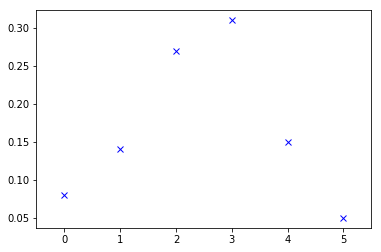

In [6]:
plt.plot(x_i, probs, "xb")
plt.xlim([-0.5, 5.5])
plt.show()

In [19]:
n=5
p0=0.6
k = np.arange(0, 6)
binomial = stats.binom.pmf(k, n, p0)
binomial

array([0.01024, 0.0768 , 0.2304 , 0.3456 , 0.2592 , 0.07776])

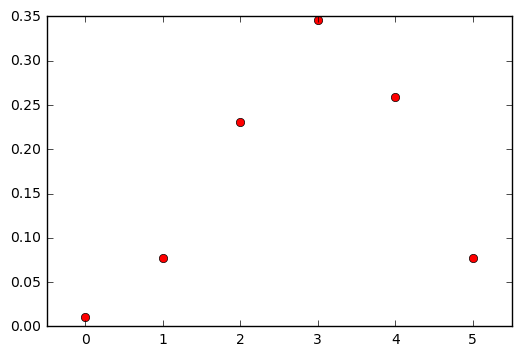

In [20]:
plt.plot(x_i, binomial, "or")
plt.xlim([-0.5, 5.5])
plt.show()

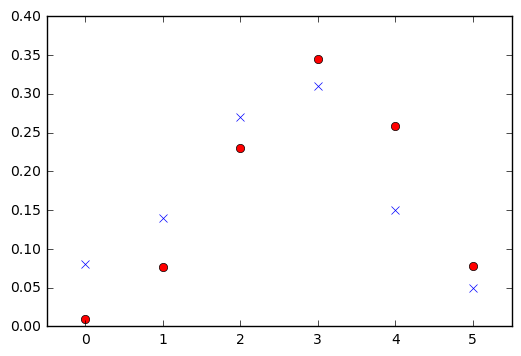

In [21]:
plt.plot(x_i, binomial, "or")
plt.plot(x_i, probs, "xb")
plt.xlim([-0.5, 5.5])
plt.ylim([0., 0.4])
plt.show()

In [25]:
c = np.max(p0/binomial)
Q = binomial / (np.array(p0)*c)

Q

array([0.00029127, 0.00218453, 0.0065536 , 0.0098304 , 0.0073728 ,
       0.00221184])

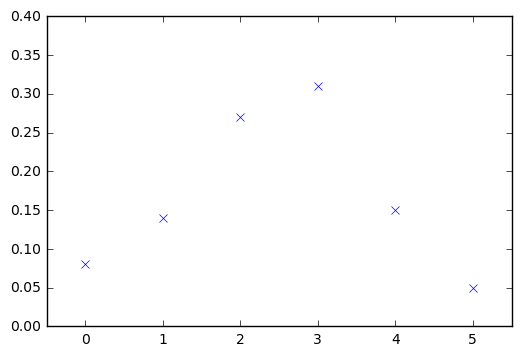

In [26]:
binom_n = binomial*c

plt.plot(x_i, binom_n, "or")
plt.plot(x_i, probs, "xb")
plt.xlim([-0.5, 5.5])
plt.ylim([0., 0.4])
plt.show()

In [27]:
Q

array([0.00029127, 0.00218453, 0.0065536 , 0.0098304 , 0.0073728 ,
       0.00221184])

In [29]:
def simula(M, q):
    
    # parametros de la binomial:
    n = 5
    p0 = 0.6
    
    X = []
    k = 0

    while k<M:

        # 1. sortear un numero entre 0 y 5
        r = stats.binom.rvs(n, p0, size=1)[0]                
        u = random.random()
        
        print r, q[r], u
        if u<q[r]:
            X.append(r)
            k = k+1
            print "accepted"
            
    return X        

In [30]:
p1 = [0.8, 0.1, 0.01, 0.04, 0.05, 0.00]

M = 1000
X = simula(M, p1)

1 0.1 0.401248559624
3 0.04 0.403491793167
4 0.05 0.608632303333
3 0.04 0.699741089298
3 0.04 0.525123258546
2 0.01 0.144179617174
2 0.01 0.909577629167
3 0.04 0.343954049845
4 0.05 0.566158780738
5 0.0 0.164150655602
5 0.0 0.615865794138
5 0.0 0.206547993389
4 0.05 0.874874761123
3 0.04 0.134116989594
2 0.01 0.893080947979
1 0.1 0.523394213916
4 0.05 0.0990130462092
3 0.04 0.089896120386
4 0.05 0.409947829626
3 0.04 0.313073844833
3 0.04 0.363729345021
3 0.04 0.818636880833
3 0.04 0.0590646907367
3 0.04 0.766687052962
3 0.04 0.0528323032238
2 0.01 0.643583077175
2 0.01 0.708803430146
3 0.04 0.842970069025
4 0.05 0.967814110827
3 0.04 0.115357231409
3 0.04 0.738736503614
3 0.04 0.570122732095
3 0.04 0.116097601129
3 0.04 0.0572822633748
3 0.04 0.431239265574
2 0.01 0.449422252533
3 0.04 0.108685897018
4 0.05 0.900074599209
3 0.04 0.584467902272
4 0.05 0.121953988346
2 0.01 0.853537943901
4 0.05 0.887530736457
4 0.05 0.650943383202
3 0.04 0.0393386574837
accepted
2 0.01 0.268186767067
4

1 0.1 0.127185747332
3 0.04 0.50629601653
4 0.05 0.510265914434
2 0.01 0.971291413143
1 0.1 0.459034489032
3 0.04 0.626245948039
3 0.04 0.675373135862
4 0.05 0.943437243566
4 0.05 0.711590207091
4 0.05 0.176464862864
2 0.01 0.818130911601
1 0.1 0.646769418751
3 0.04 0.781839639517
3 0.04 0.687169222699
3 0.04 0.0799827854372
2 0.01 0.730694366334
5 0.0 0.91310548793
3 0.04 0.280706258405
3 0.04 0.882558553014
1 0.1 0.175419369329
3 0.04 0.197325399928
3 0.04 0.887958193122
3 0.04 0.984261368012
4 0.05 0.661480221729
2 0.01 0.539840613629
3 0.04 0.942585410871
0 0.8 0.469876538743
accepted
3 0.04 0.852648183623
3 0.04 0.557823813755
1 0.1 0.736632763236
2 0.01 0.458467870461
2 0.01 0.773273295804
2 0.01 0.938137573339
2 0.01 0.749677424821
5 0.0 0.304402417852
3 0.04 0.522105883108
1 0.1 0.0467975049032
accepted
2 0.01 0.382185771802
3 0.04 0.967828846653
1 0.1 0.680078751218
2 0.01 0.433075968986
1 0.1 0.443255773428
3 0.04 0.420624408315
3 0.04 0.551983480482
3 0.04 0.396047107337
3 0

3 0.04 0.828947558349
4 0.05 0.991627760257
4 0.05 0.283747869343
3 0.04 0.0308628863619
accepted
1 0.1 0.77920159065
3 0.04 0.323866260368
3 0.04 0.626330869299
5 0.0 0.261276705955
3 0.04 0.290817081624
1 0.1 0.41852600624
5 0.0 0.357474757975
3 0.04 0.685488320804
3 0.04 0.147889625595
4 0.05 0.952577246686
3 0.04 0.67275893838
3 0.04 0.417257144584
4 0.05 0.987290013218
1 0.1 0.407701806863
2 0.01 0.939836654182
2 0.01 0.993442539801
3 0.04 0.687957738001
4 0.05 0.921499642418
4 0.05 0.378312998151
3 0.04 0.367997027827
5 0.0 0.0791930643469
3 0.04 0.953339035341
4 0.05 0.167645568326
3 0.04 0.369577691696
3 0.04 0.45835227088
3 0.04 0.644543023091
2 0.01 0.627479870719
3 0.04 0.59341327486
5 0.0 0.829978951765
3 0.04 0.463922353383
2 0.01 0.318311512654
3 0.04 0.911213266197
4 0.05 0.536398751109
1 0.1 0.01221506012
accepted
2 0.01 0.320672161072
2 0.01 0.0956804986806
4 0.05 0.426850040216
2 0.01 0.963134585705
3 0.04 0.333978670972
3 0.04 0.985242812857
3 0.04 0.940138505243
3 0

2 0.01 0.303234654437
3 0.04 0.156360206694
4 0.05 0.71081867937
3 0.04 0.0279317471844
accepted
3 0.04 0.734339494196
3 0.04 0.275037939676
1 0.1 0.243412826972
2 0.01 0.769649211888
3 0.04 0.461272599816
3 0.04 0.673825028086
0 0.8 0.357152086708
accepted
3 0.04 0.766791882617
2 0.01 0.842779379339
4 0.05 0.0726315291582
2 0.01 0.165961323171
3 0.04 0.0112998193311
accepted
3 0.04 0.493882276578
3 0.04 0.959332131849
5 0.0 0.810963767283
2 0.01 0.0562140939011
3 0.04 0.124848950888
2 0.01 0.04970922778
5 0.0 0.50769586475
3 0.04 0.384375664776
4 0.05 0.786612925716
3 0.04 0.20501084397
5 0.0 0.219292480345
3 0.04 0.929464772336
5 0.0 0.928081518103
5 0.0 0.890327775385
2 0.01 0.50182468202
3 0.04 0.952893527987
2 0.01 0.168496112708
3 0.04 0.188321135403
1 0.1 0.649814371935
3 0.04 0.721497144762
4 0.05 0.633829784328
2 0.01 0.435956871009
4 0.05 0.0209159199211
accepted
5 0.0 0.097485604829
3 0.04 0.0917975809322
3 0.04 0.255839936313
3 0.04 0.961337002551
3 0.04 0.911223002377
4 0.

2 0.01 0.0719268873078
2 0.01 0.315935660006
4 0.05 0.376799441382
2 0.01 0.726498304685
2 0.01 0.111828810614
2 0.01 0.483107334054
1 0.1 0.86423771934
1 0.1 0.593153451362
4 0.05 0.777342841575
5 0.0 0.488165371963
4 0.05 0.787417481305
3 0.04 0.286886215044
3 0.04 0.930221668572
4 0.05 0.226598465264
4 0.05 0.969480450415
2 0.01 0.932039002399
3 0.04 0.151394885974
3 0.04 0.427401672197
2 0.01 0.527529593581
5 0.0 0.820353982894
2 0.01 0.111943469855
2 0.01 0.771295966439
2 0.01 0.195147927841
2 0.01 0.831752425387
2 0.01 0.197411995146
3 0.04 0.287203492717
3 0.04 0.124953742662
2 0.01 0.983942542472
3 0.04 0.803974378363
3 0.04 0.552949194234
2 0.01 0.539887367923
4 0.05 0.393180462025
1 0.1 0.190159523255
3 0.04 0.181575354415
4 0.05 0.772631795363
1 0.1 0.800073957277
3 0.04 0.0280195436205
accepted
3 0.04 0.915829805494
4 0.05 0.363081615935
3 0.04 0.100874696402
4 0.05 0.102735922542
5 0.0 0.734460158296
2 0.01 0.222901464155
3 0.04 0.532593016463
4 0.05 0.747143038002
3 0.04 

3 0.04 0.800122283971
4 0.05 0.79011124424
5 0.0 0.839240533818
3 0.04 0.0522996518664
2 0.01 0.922919926255
3 0.04 0.852848714177
3 0.04 0.648050739112
3 0.04 0.0520317913318
3 0.04 0.623754676782
2 0.01 0.379478958528
2 0.01 0.892946644515
4 0.05 0.967801561706
3 0.04 0.767083337033
2 0.01 0.206577112325
3 0.04 0.465819785442
1 0.1 0.276305474772
1 0.1 0.372966489477
4 0.05 0.852878810234
1 0.1 0.32965049425
4 0.05 0.348291634639
4 0.05 0.950856825152
4 0.05 0.349619989887
1 0.1 0.84382197817
2 0.01 0.301573889874
3 0.04 0.312333516292
2 0.01 0.976873553245
2 0.01 0.28484643602
3 0.04 0.565116799725
0 0.8 0.610337737006
accepted
2 0.01 0.683647880679
5 0.0 0.260797492778
5 0.0 0.100441680407
4 0.05 0.566775308628
3 0.04 0.394539879864
5 0.0 0.124031968833
2 0.01 0.242711350612
4 0.05 0.323767799971
2 0.01 0.0561951690909
2 0.01 0.679201256265
3 0.04 0.125271665346
3 0.04 0.221935211175
2 0.01 0.684742079396
4 0.05 0.835267453415
2 0.01 0.947959568884
4 0.05 0.440492855004
3 0.04 0.71

2 0.01 0.788356228219
2 0.01 0.108489972037
3 0.04 0.568486124613
2 0.01 0.14876843173
4 0.05 0.770738200246
3 0.04 0.517211764384
3 0.04 0.764872209983
2 0.01 0.406930549904
2 0.01 0.0921678180953
4 0.05 0.0974439673353
2 0.01 0.362572344229
1 0.1 0.882304302455
5 0.0 0.210061260855
5 0.0 0.207243249876
3 0.04 0.378498577892
3 0.04 0.0669600570929
5 0.0 0.212009741458
4 0.05 0.101274940575
5 0.0 0.656219581051
4 0.05 0.993150388171
4 0.05 0.617855279376
4 0.05 0.936704275245
4 0.05 0.90258846354
3 0.04 0.611333872032
4 0.05 0.074849428028
2 0.01 0.814288631346
3 0.04 0.692265570397
4 0.05 0.446856197562
3 0.04 0.116588916196
4 0.05 0.375320075562
2 0.01 0.782809421621
5 0.0 0.980233685936
1 0.1 0.283925563995
4 0.05 0.810724252094
5 0.0 0.408751217486
2 0.01 0.516220775336
5 0.0 0.0161541319309
3 0.04 0.319851367035
4 0.05 0.412149539853
2 0.01 0.539464927715
3 0.04 0.980448209277
3 0.04 0.803697204743
2 0.01 0.699294975827
4 0.05 0.310964166966
2 0.01 0.270552803126
4 0.05 0.72212221

3 0.04 0.816786029688
2 0.01 0.423489689394
1 0.1 0.44986180312
4 0.05 0.868598208958
3 0.04 0.950897944028
2 0.01 0.222968644176
4 0.05 0.262096702826
3 0.04 0.797897003825
3 0.04 0.117455902286
3 0.04 0.292447817364
2 0.01 0.556164233657
4 0.05 0.247779895912
3 0.04 0.985341923397
4 0.05 0.646908087386
1 0.1 0.929593243786
1 0.1 0.0301928133602
accepted
4 0.05 0.0483599981625
accepted
3 0.04 0.808585820194
4 0.05 0.3938454845
1 0.1 0.962661918263
2 0.01 0.720790662202
3 0.04 0.0944439799704
3 0.04 0.833390539595
4 0.05 0.441787600475
3 0.04 0.692110415296
2 0.01 0.305652357532
4 0.05 0.442853698699
3 0.04 0.194122192687
4 0.05 0.00825576268018
accepted
3 0.04 0.377022430789
3 0.04 0.0664561546699
2 0.01 0.853967330371
2 0.01 0.390684045155
5 0.0 0.806625574431
4 0.05 0.370332901437
3 0.04 0.208138249492
2 0.01 0.162160882216
4 0.05 0.88766205453
3 0.04 0.11028928194
2 0.01 0.973308780201
5 0.0 0.0900505887319
4 0.05 0.938819865946
5 0.0 0.529504884483
4 0.05 0.547855980865
4 0.05 0.3

3 0.04 0.666023075884
4 0.05 0.251352512895
2 0.01 0.116330877516
2 0.01 0.309393142408
2 0.01 0.0852740868431
4 0.05 0.0995197021192
3 0.04 0.437802655862
4 0.05 0.226498074451
4 0.05 0.878040557634
5 0.0 0.375657929321
2 0.01 0.286953169417
4 0.05 0.120265912021
3 0.04 0.788633683074
1 0.1 0.846614156514
4 0.05 0.714645496979
3 0.04 0.52765354092
4 0.05 0.811329094305
3 0.04 0.579530816783
2 0.01 0.687387894244
4 0.05 0.160742758091
3 0.04 0.16005737176
2 0.01 0.40846453453
3 0.04 0.875626811241
2 0.01 0.555092894417
3 0.04 0.647859907878
2 0.01 0.587510280958
3 0.04 0.973927193403
3 0.04 0.577358460804
4 0.05 0.459851799166
3 0.04 0.729915039969
3 0.04 0.828771038929
3 0.04 0.674770598458
4 0.05 0.157482078474
4 0.05 0.564743083931
2 0.01 0.320404386916
4 0.05 0.0600087509522
2 0.01 0.0946443016587
3 0.04 0.556737299923
3 0.04 0.643039265915
1 0.1 0.96616744574
5 0.0 0.1539181627
3 0.04 0.667948635253
2 0.01 0.58227172529
3 0.04 0.658385158735
5 0.0 0.100432158143
4 0.05 0.652801376

4 0.05 0.933307001577
3 0.04 0.309453335372
4 0.05 0.369104093127
4 0.05 0.0217738275146
accepted
3 0.04 0.049225573658
1 0.1 0.695574350024
1 0.1 0.544900659326
4 0.05 0.996859020191
3 0.04 0.910248339971
5 0.0 0.89146147196
1 0.1 0.160649714171
5 0.0 0.197807256504
3 0.04 0.356299869105
4 0.05 0.675902754816
4 0.05 0.639380843627
2 0.01 0.427521946996
1 0.1 0.521196678312
3 0.04 0.0707565258834
3 0.04 0.654338002888
4 0.05 0.110450961827
2 0.01 0.0691615596693
3 0.04 0.984123573856
3 0.04 0.996323236673
3 0.04 0.628301262087
2 0.01 0.618116511358
3 0.04 0.100501897135
3 0.04 0.102902172761
3 0.04 0.202359494791
2 0.01 0.834425205631
3 0.04 0.107201622345
4 0.05 0.841757110606
1 0.1 0.673150855966
4 0.05 0.704776431495
3 0.04 0.40615738236
5 0.0 0.473796342067
4 0.05 0.458032685294
4 0.05 0.116857260071
1 0.1 0.0681805225369
accepted
3 0.04 0.937433043619
2 0.01 0.230274336957
3 0.04 0.769115665918
2 0.01 0.666849017567
3 0.04 0.369459738257
4 0.05 0.0481602959747
accepted
3 0.04 0.51

4 0.05 0.254880303777
3 0.04 0.865902258556
2 0.01 0.364589738645
3 0.04 0.85745171941
5 0.0 0.511877379049
2 0.01 0.847503536868
3 0.04 0.161120819861
1 0.1 0.689965042123
2 0.01 0.420125006249
2 0.01 0.572493804248
4 0.05 0.248436288868
3 0.04 0.653764065718
3 0.04 0.987175914017
4 0.05 0.666018593232
2 0.01 0.183439030216
2 0.01 0.713579158877
4 0.05 0.30632402323
1 0.1 0.710233311101
2 0.01 0.847035132076
4 0.05 0.578150852147
3 0.04 0.561361529701
2 0.01 0.357653641196
3 0.04 0.305035521337
3 0.04 0.771536375607
3 0.04 0.0823899997451
3 0.04 0.984660044482
3 0.04 0.677734528192
3 0.04 0.222304372031
4 0.05 0.0903297352083
4 0.05 0.035464697145
accepted
1 0.1 0.962327789797
5 0.0 0.564552688773
5 0.0 0.334039316827
4 0.05 0.828031032659
4 0.05 0.625950444776
2 0.01 0.484955022709
4 0.05 0.140440609003
4 0.05 0.90744552634
2 0.01 0.358742338325
3 0.04 0.527244855818
2 0.01 0.365479297948
2 0.01 0.610902446399
3 0.04 0.532582452971
5 0.0 0.297690108942
3 0.04 0.0280001970911
accepted

3 0.04 0.075028918787
3 0.04 0.434163876257
4 0.05 0.112370590966
4 0.05 0.896173572732
3 0.04 0.884550960204
2 0.01 0.948003458471
2 0.01 0.828981826748
2 0.01 0.643222846824
5 0.0 0.941003134371
3 0.04 0.601311788944
4 0.05 0.613544533653
3 0.04 0.688332410438
2 0.01 0.244241519979
4 0.05 0.89108475357
4 0.05 0.273203299494
2 0.01 0.0937205786378
1 0.1 0.963072248186
4 0.05 0.855404709332
5 0.0 0.771100169978
4 0.05 0.278821606679
2 0.01 0.265487834322
4 0.05 0.063928672828
2 0.01 0.628278110379
2 0.01 0.757454942367
2 0.01 0.936296171955
4 0.05 0.803487261619
4 0.05 0.72216049294
3 0.04 0.0804248408907
4 0.05 0.552213825427
3 0.04 0.983695085468
3 0.04 0.186840816731
3 0.04 0.175154881083
3 0.04 0.67367022813
3 0.04 0.972145128415
3 0.04 0.248044605309
3 0.04 0.0127915071233
accepted
4 0.05 0.896863338925
2 0.01 0.718415203622
3 0.04 0.55368428905
4 0.05 0.636997903141
3 0.04 0.49835101017
3 0.04 0.76780426576
3 0.04 0.529005773801
4 0.05 0.362839032819
2 0.01 0.738510495658
3 0.04 

1 0.1 0.0356845716418
accepted
3 0.04 0.185752976191
4 0.05 0.809408897933
3 0.04 0.324600589839
1 0.1 0.440723830596
3 0.04 0.0167344329134
accepted
4 0.05 0.680159943882
3 0.04 0.329463229995
3 0.04 0.165433034422
2 0.01 0.569682463635
4 0.05 0.844093969308
4 0.05 0.185898674131
3 0.04 0.823563337855
3 0.04 0.163292666568
3 0.04 0.0573914471306
3 0.04 0.71613252318
2 0.01 0.185200656007
4 0.05 0.362328406277
2 0.01 0.285717121877
3 0.04 0.856808101813
1 0.1 0.613746861808
2 0.01 0.835941126525
4 0.05 0.273181149581
2 0.01 0.218544316046
2 0.01 0.794811534128
4 0.05 0.32933545938
3 0.04 0.025056550326
accepted
3 0.04 0.800888941631
3 0.04 0.998712433605
2 0.01 0.262827388512
3 0.04 0.560589320962
2 0.01 0.352419241447
2 0.01 0.619901570028
3 0.04 0.992545121879
3 0.04 0.381904525864
4 0.05 0.555956893194
5 0.0 0.245943680058
4 0.05 0.759359014294
3 0.04 0.361750318962
4 0.05 0.113895228948
2 0.01 0.518654926956
1 0.1 0.0168762382124
accepted
3 0.04 0.580622655522
4 0.05 0.274811363161

0 0.8 0.0527053299654
accepted
4 0.05 0.387377634801
2 0.01 0.635468521226
3 0.04 0.228606039574
3 0.04 0.8623660706
3 0.04 0.416040648632
0 0.8 0.249193528165
accepted
4 0.05 0.828553802516
3 0.04 0.20554939753
3 0.04 0.316351943837
4 0.05 0.331201249966
4 0.05 0.108388504161
1 0.1 0.974874608778
3 0.04 0.751906103699
4 0.05 0.0214077963772
accepted
2 0.01 0.148249391139
5 0.0 0.197966214354
3 0.04 0.90453981206
2 0.01 0.306979375477
4 0.05 0.81565811341
3 0.04 0.821315263585
2 0.01 0.858294098294
2 0.01 0.664204315839
2 0.01 0.126282897736
4 0.05 0.131721400758
2 0.01 0.459719633895
3 0.04 0.798279629635
3 0.04 0.86019594042
3 0.04 0.621405500389
3 0.04 0.946135336249
4 0.05 0.309503019985
3 0.04 0.66311134191
1 0.1 0.182433330195
2 0.01 0.0667009976635
3 0.04 0.446381623377
3 0.04 0.913757900253
3 0.04 0.737395459368
3 0.04 0.89791261676
3 0.04 0.723597994878
1 0.1 0.541141181037
5 0.0 0.98704379937
5 0.0 0.00184752747347
1 0.1 0.0943331326627
accepted
4 0.05 0.14634237835
2 0.01 0.

3 0.04 0.461656495981
4 0.05 0.0725106315472
3 0.04 0.672318629127
2 0.01 0.837197512401
4 0.05 0.595479178451
3 0.04 0.263845677741
4 0.05 0.940146671332
5 0.0 0.282804553691
3 0.04 0.743434690356
5 0.0 0.988755917656
3 0.04 0.980459047743
4 0.05 0.994039870929
4 0.05 0.805726261984
3 0.04 0.281807612095
5 0.0 0.630023584153
4 0.05 0.405558242207
4 0.05 0.780468956109
2 0.01 0.650746027364
3 0.04 0.70138194772
5 0.0 0.969435910883
3 0.04 0.863631929291
3 0.04 0.355479147577
4 0.05 0.714126211972
4 0.05 0.882587284801
4 0.05 0.153592445303
3 0.04 0.978281060609
3 0.04 0.141095696999
5 0.0 0.892731995729
4 0.05 0.0556573326624
3 0.04 0.280078970764
2 0.01 0.0342835814886
5 0.0 0.738310653977
3 0.04 0.48545255446
5 0.0 0.0196168370587
2 0.01 0.0973414447013
1 0.1 0.726024424697
2 0.01 0.897566128392
0 0.8 0.0166211283795
accepted
3 0.04 0.875316191501
1 0.1 0.851571916924
2 0.01 0.456312483545
4 0.05 0.917483839571
2 0.01 0.516387805918
2 0.01 0.049580796643
2 0.01 0.638861192802
3 0.04 

2 0.01 0.493960312849
5 0.0 0.0787970604867
5 0.0 0.390395681858
3 0.04 0.75455485081
3 0.04 0.447817695622
2 0.01 0.0308305971324
4 0.05 0.8108163569
4 0.05 0.753099317885
3 0.04 0.0535256920838
2 0.01 0.0108611870531
2 0.01 0.502183952977
2 0.01 0.938160943131
1 0.1 0.30257754958
3 0.04 0.929690041371
3 0.04 0.752350405703
3 0.04 0.758193489758
4 0.05 0.292974811171
3 0.04 0.859232214431
4 0.05 0.228124809128
3 0.04 0.357475664577
4 0.05 0.799697276688
5 0.0 0.180303923917
3 0.04 0.618642512453
3 0.04 0.694763684593
4 0.05 0.344718245751
3 0.04 0.364268018009
3 0.04 0.654791014392
5 0.0 0.714597699908
3 0.04 0.437810208174
2 0.01 0.899056905968
2 0.01 0.511329866869
1 0.1 0.53972392077
4 0.05 0.822055922973
2 0.01 0.447184213275
4 0.05 0.375819117571
1 0.1 0.381364947717
4 0.05 0.56428387198
2 0.01 0.428651701268
4 0.05 0.242804845506
4 0.05 0.258588261173
4 0.05 0.968262609123
2 0.01 0.0359434271133
1 0.1 0.386518070326
2 0.01 0.274656432165
4 0.05 0.82665623642
3 0.04 0.17584542002

3 0.04 0.151695725617
4 0.05 0.840044858971
4 0.05 0.606113885285
2 0.01 0.0594364670761
4 0.05 0.611085521303
3 0.04 0.67130364547
1 0.1 0.588671973967
3 0.04 0.699898903888
2 0.01 0.0673911935407
2 0.01 0.718123423454
1 0.1 0.312680331025
5 0.0 0.639133692998
4 0.05 0.0623170291896
1 0.1 0.626961042113
4 0.05 0.812013775296
2 0.01 0.810513679333
1 0.1 0.648836532607
3 0.04 0.737815202298
1 0.1 0.119330157504
2 0.01 0.312240914688
5 0.0 0.408315934042
3 0.04 0.972446696265
5 0.0 0.137772211993
4 0.05 0.869375767803
3 0.04 0.0701510237828
4 0.05 0.160810471391
0 0.8 0.999774040111
3 0.04 0.643609450491
4 0.05 0.429489927457
2 0.01 0.815253290215
2 0.01 0.916817122187
5 0.0 0.10973991215
3 0.04 0.136616792233
3 0.04 0.794751059143
0 0.8 0.133340507049
accepted
3 0.04 0.539291932839
1 0.1 0.80870039908
2 0.01 0.10239500968
2 0.01 0.314365618996
3 0.04 0.256886183639
4 0.05 0.053231635058
4 0.05 0.136718499599
4 0.05 0.378399717496
2 0.01 0.769803173887
2 0.01 0.980081981019
3 0.04 0.5565

3 0.04 0.32317142644
3 0.04 0.319348994425
4 0.05 0.364186891191
4 0.05 0.258102825171
1 0.1 0.0114892991171
accepted
4 0.05 0.474275899264
3 0.04 0.576110417221
3 0.04 0.0341780110809
accepted
1 0.1 0.0501283709028
accepted
2 0.01 0.299667619548
2 0.01 0.546504683283
3 0.04 0.216163327579
4 0.05 0.649629417434
3 0.04 0.978152832553
5 0.0 0.22223069974
2 0.01 0.17812909879
3 0.04 0.151227335106
2 0.01 0.733231939332
4 0.05 0.96096738519
5 0.0 0.888710521673
3 0.04 0.206418115033
4 0.05 0.851209585729
5 0.0 0.363921603002
4 0.05 0.808545627057
5 0.0 0.994361491697
3 0.04 0.321627765129
3 0.04 0.125677564938
2 0.01 0.379718327803
1 0.1 0.772021119807
3 0.04 0.227709232278
4 0.05 0.555018312202
1 0.1 0.106886969349
2 0.01 0.129615610885
3 0.04 0.929754938269
1 0.1 0.764540210351
3 0.04 0.84793944475
4 0.05 0.895465209849
4 0.05 0.960352985189
2 0.01 0.539671008446
3 0.04 0.996370521067
0 0.8 0.0636845079587
accepted
3 0.04 0.533760070571
2 0.01 0.22599839957
2 0.01 0.298915233439
4 0.05 0

3 0.04 0.331796051597
3 0.04 0.144617641375
1 0.1 0.211017478353
1 0.1 0.22600486791
2 0.01 0.546952565292
3 0.04 0.0880776946311
2 0.01 0.552441934916
4 0.05 0.300429858314
5 0.0 0.449002664305
3 0.04 0.398072828863
2 0.01 0.290242794127
5 0.0 0.159210277147
2 0.01 0.0464163487848
3 0.04 0.905909468673
3 0.04 0.614863720496
3 0.04 0.17520002908
2 0.01 0.568779711288
4 0.05 0.879529608463
5 0.0 0.175174170801
3 0.04 0.816987130096
5 0.0 0.579789773348
2 0.01 0.479146676524
4 0.05 0.470610514058
3 0.04 0.394905959963
3 0.04 0.273675061904
5 0.0 0.035671613584
3 0.04 0.135513899645
3 0.04 0.960835473792
3 0.04 0.611272612004
3 0.04 0.771894120168
2 0.01 0.627169480615
4 0.05 0.302030467102
4 0.05 0.750871937581
3 0.04 0.728673010192
3 0.04 0.0542750306547
5 0.0 0.779909131369
4 0.05 0.157532914206
3 0.04 0.379356857882
4 0.05 0.422110274331
1 0.1 0.602388957733
3 0.04 0.236010316678
4 0.05 0.170374479315
3 0.04 0.410711870328
4 0.05 0.190125771017
5 0.0 0.54657336255
2 0.01 0.35861463474

4 0.05 0.378432307347
5 0.0 0.683412467004
1 0.1 0.802642212157
4 0.05 0.805826934638
1 0.1 0.316111148153
2 0.01 0.0095478973381
accepted
3 0.04 0.828893899874
2 0.01 0.334101854751
2 0.01 0.848099637493
4 0.05 0.134629250198
3 0.04 0.122593092344
3 0.04 0.694697954852
1 0.1 0.46232325663
3 0.04 0.79639835413
2 0.01 0.403176843413
5 0.0 0.2654708296
2 0.01 0.20491188607
4 0.05 0.412203997287
3 0.04 0.389528769529
2 0.01 0.656919789983
1 0.1 0.516485490284
3 0.04 0.723280029759
3 0.04 0.237403004122
1 0.1 0.625745184617
3 0.04 0.254601911439
1 0.1 0.412522195689
4 0.05 0.425755205758
3 0.04 0.339519620837
3 0.04 0.323813238867
5 0.0 0.16005051409
3 0.04 0.159198089172
3 0.04 0.0466625109194
4 0.05 0.158044928446
4 0.05 0.21175422166
4 0.05 0.629555910351
4 0.05 0.688335022499
4 0.05 0.592477289808
2 0.01 0.158068043952
1 0.1 0.242183550828
3 0.04 0.835452393159
3 0.04 0.614991594125
2 0.01 0.673833007624
3 0.04 0.505578414973
4 0.05 0.800954397727
4 0.05 0.808628099919
4 0.05 0.3294967

3 0.04 0.0869233457034
2 0.01 0.277285181611
2 0.01 0.223728385632
2 0.01 0.931763591938
3 0.04 0.0354966101117
accepted
2 0.01 0.781651639071
0 0.8 0.184659223214
accepted
4 0.05 0.651393099035
4 0.05 0.428635057847
1 0.1 0.940402127171
2 0.01 0.829001410103
3 0.04 0.298047659743
3 0.04 0.0558797331666
4 0.05 0.718250424558
3 0.04 0.00621250098614
accepted
5 0.0 0.853474042325
3 0.04 0.725441305525
3 0.04 0.619584660634
5 0.0 0.729705958597
2 0.01 0.0719196575774
2 0.01 0.136445286319
3 0.04 0.668544268794
3 0.04 0.801842713512
2 0.01 0.696991804493
2 0.01 0.590750646678
4 0.05 0.328867533593
2 0.01 0.594379078971
4 0.05 0.555902520226
3 0.04 0.504684263584
2 0.01 0.845365520582
5 0.0 0.0771419699219
4 0.05 0.517179794617
2 0.01 0.60877596628
4 0.05 0.0229931425409
accepted
3 0.04 0.674979892627
2 0.01 0.184942005211
3 0.04 0.895462288953
2 0.01 0.948750403122
2 0.01 0.553530079358
3 0.04 0.451439245155
2 0.01 0.96434460956
4 0.05 0.195495687594
3 0.04 0.650077318888
4 0.05 0.30049754

4 0.05 0.524301536227
5 0.0 0.625569070646
4 0.05 0.458415011678
4 0.05 0.882477966163
5 0.0 0.000807485835983
3 0.04 0.142964983641
4 0.05 0.040310020397
accepted
3 0.04 0.563607868959
3 0.04 0.6819485172
2 0.01 0.899716795786
1 0.1 0.149759117911
2 0.01 0.307718373235
2 0.01 0.922135963748
3 0.04 0.715385035843
2 0.01 0.417922391098
3 0.04 0.961566618031
3 0.04 0.759485647102
2 0.01 0.427816268119
4 0.05 0.179845008986
3 0.04 0.050597353551
5 0.0 0.747616453499
2 0.01 0.0835147415378
3 0.04 0.265147499754
3 0.04 0.591778471942
2 0.01 0.577463515819
4 0.05 0.152527461498
4 0.05 0.334562671355
4 0.05 0.141838797087
4 0.05 0.0852989049122
4 0.05 0.703032339586
4 0.05 0.283360803084
3 0.04 0.587515381522
4 0.05 0.237954097022
4 0.05 0.850871486588
2 0.01 0.826786704548
3 0.04 0.580429018785
2 0.01 0.265086198335
4 0.05 0.60548443042
2 0.01 0.626966732532
3 0.04 0.603789461078
3 0.04 0.813596868482
4 0.05 0.628724978013
3 0.04 0.58962500775
3 0.04 0.363880700307
3 0.04 0.0387293294
accept

4 0.05 0.0658618057639
4 0.05 0.547303792608
4 0.05 0.77168250318
4 0.05 0.474101794778
4 0.05 0.0438280945896
accepted
2 0.01 0.780801496351
3 0.04 0.153996219804
4 0.05 0.0566947328052
2 0.01 0.965097032703
2 0.01 0.58824772991
3 0.04 0.893985234295
3 0.04 0.676999741047
1 0.1 0.988041382753
0 0.8 0.441958825938
accepted
4 0.05 0.963165393679
0 0.8 0.533763636497
accepted
2 0.01 0.230300273492
4 0.05 0.0942200218152
4 0.05 0.474313291458
1 0.1 0.348429532722
5 0.0 0.070318687313
4 0.05 0.680590166908
4 0.05 0.459210404445
2 0.01 0.245567358644
3 0.04 0.765200852521
3 0.04 0.310157058692
3 0.04 0.297810084717
2 0.01 0.838212222426
3 0.04 0.203516778761
3 0.04 0.477274996928
4 0.05 0.894377447153
4 0.05 0.590131085017
3 0.04 0.0434650529058
2 0.01 0.978518987335
3 0.04 0.385261017937
3 0.04 0.0315686001138
accepted
2 0.01 0.421834518258
4 0.05 0.215049195216
4 0.05 0.183340622351
4 0.05 0.854649972043
3 0.04 0.0731983723025
2 0.01 0.511379505937
2 0.01 0.151048946829
2 0.01 0.312004112

3 0.04 0.714777657427
2 0.01 0.94385875675
5 0.0 0.158734966271
4 0.05 0.0703367714684
5 0.0 0.986889951336
3 0.04 0.938734037497
5 0.0 0.510847736771
3 0.04 0.783786972675
3 0.04 0.0942621983535
5 0.0 0.344165967836
3 0.04 0.546714907623
3 0.04 0.768850907679
3 0.04 0.785007902319
2 0.01 0.817409675427
2 0.01 0.645146707369
4 0.05 0.424060492656
2 0.01 0.531248636207
4 0.05 0.10925440124
3 0.04 0.81987894347
3 0.04 0.459441948492
4 0.05 0.254691798785
3 0.04 0.938089147972
3 0.04 0.434685535163
4 0.05 0.487276458342
3 0.04 0.0360616460321
accepted
2 0.01 0.917526906138
3 0.04 0.712036575023
3 0.04 0.875071561614
4 0.05 0.905740619711
5 0.0 0.611056477091
4 0.05 0.2721978205
2 0.01 0.64362794706
3 0.04 0.0860902509113
3 0.04 0.260389754843
4 0.05 0.0266052535549
accepted
1 0.1 0.381679692548
4 0.05 0.591813875745
3 0.04 0.975095953805
4 0.05 0.504014219249
1 0.1 0.487634423226
3 0.04 0.447847632257
3 0.04 0.844929763029
3 0.04 0.201209558243
3 0.04 0.25716226149
3 0.04 0.895206661951
2

4 0.05 0.699841398943
3 0.04 0.345718398448
4 0.05 0.222060727011
3 0.04 0.508744939618
3 0.04 0.591753484426
4 0.05 0.26227944574
5 0.0 0.758003010526
2 0.01 0.0775796354537
2 0.01 0.224502113835
3 0.04 0.578812375938
4 0.05 0.852063603785
4 0.05 0.806039626507
4 0.05 0.000168660427157
accepted
3 0.04 0.498104050105
2 0.01 0.0231022732504
5 0.0 0.809676995748
2 0.01 0.957295755532
4 0.05 0.843620304098
5 0.0 0.442272043353
1 0.1 0.932354379909
3 0.04 0.546807640371
4 0.05 0.34342709913
2 0.01 0.564734344866
2 0.01 0.729285421931
2 0.01 0.345729044704
5 0.0 0.59624784457
4 0.05 0.192337241915
3 0.04 0.00966117066302
accepted
3 0.04 0.413308081984
1 0.1 0.136723823288
3 0.04 0.339559855728
3 0.04 0.565265257792
2 0.01 0.0154659120098
4 0.05 0.447151190933
4 0.05 0.699603348905
5 0.0 0.396095769663
5 0.0 0.339257483146
2 0.01 0.529869711749
4 0.05 0.590942044798
3 0.04 0.0327881611095
accepted
3 0.04 0.771388576365
3 0.04 0.752767273529
3 0.04 0.944356941665
4 0.05 0.94236898565
4 0.05 0

2 0.01 0.767091718088
2 0.01 0.308838520812
1 0.1 0.705616549401
3 0.04 0.96522675195
4 0.05 0.490182610037
4 0.05 0.682790009251
4 0.05 0.911560679416
4 0.05 0.0352523274362
accepted
4 0.05 0.028720543165
accepted
2 0.01 0.0841837605184
2 0.01 0.300332115143
4 0.05 0.381325667356
1 0.1 0.0521232837199
accepted
1 0.1 0.594422747314
4 0.05 0.262348854738
4 0.05 0.460525811332
3 0.04 0.144564470317
3 0.04 0.605049106389
2 0.01 0.403924222097
3 0.04 0.308403919284
2 0.01 0.921979461649
4 0.05 0.220863742727
1 0.1 0.652894661757
3 0.04 0.291718813722
3 0.04 0.219769594995
0 0.8 0.273562051974
accepted
2 0.01 0.0455577743241
3 0.04 0.810002379877
4 0.05 0.0069896976188
accepted
3 0.04 0.799398473942
4 0.05 0.8109878659
4 0.05 0.172573324006
2 0.01 0.388912875563
3 0.04 0.335388961058
3 0.04 0.854554648924
2 0.01 0.795714212683
3 0.04 0.54470835766
2 0.01 0.0444167035566
3 0.04 0.133457477673
3 0.04 0.330573664879
2 0.01 0.578525973612
3 0.04 0.786727921054
3 0.04 0.619126709774
3 0.04 0.034

3 0.04 0.727508306559
1 0.1 0.999703220803
5 0.0 0.976764815892
4 0.05 0.96538150149
3 0.04 0.0524005573944
2 0.01 0.0779105154976
2 0.01 0.879028185961
3 0.04 0.784147515006
5 0.0 0.133080747732
4 0.05 0.367354132566
3 0.04 0.729645933976
4 0.05 0.164083163553
3 0.04 0.618631034278
2 0.01 0.852506371874
2 0.01 0.968986630488
3 0.04 0.309644418897
3 0.04 0.533777271326
3 0.04 0.85435061904
3 0.04 0.365303743987
3 0.04 0.733066305128
2 0.01 0.432900833331
2 0.01 0.813941928843
3 0.04 0.152443590575
2 0.01 0.55438745475
5 0.0 0.573671802771
3 0.04 0.318559602799
5 0.0 0.309239266033
4 0.05 0.587451035264
3 0.04 0.330988531668
5 0.0 0.151138399593
3 0.04 0.661493216195
4 0.05 0.0913338399712
4 0.05 0.691286069453
3 0.04 0.537207204618
4 0.05 0.868819881755
2 0.01 0.986152144775
4 0.05 0.224478147267
0 0.8 0.290622577744
accepted
3 0.04 0.150875476828
2 0.01 0.0418216228515
4 0.05 0.198022615368
4 0.05 0.262013728651
4 0.05 0.393145201632
4 0.05 0.369082011596
4 0.05 0.241124700364
2 0.01 

2 0.01 0.0555473949902
4 0.05 0.0955375367125
3 0.04 0.981865406648
1 0.1 0.332415109662
3 0.04 0.141530125578
4 0.05 0.996004191593
2 0.01 0.02849229485
3 0.04 0.0361239074066
accepted
5 0.0 0.562717998854
4 0.05 0.849492924119
3 0.04 0.888580237277
4 0.05 0.27998659804
2 0.01 0.155048253592
2 0.01 0.736328364257
2 0.01 0.531568808177
4 0.05 0.115432873492
1 0.1 0.836566679134
0 0.8 0.521571339854
accepted
4 0.05 0.796329882524
1 0.1 0.605687589241
2 0.01 0.915171188801
4 0.05 0.39998858547
3 0.04 0.446183880907
3 0.04 0.658661272635
2 0.01 0.184459085508
2 0.01 0.659695290456
1 0.1 0.107806655017
2 0.01 0.758097938888
3 0.04 0.671385977875
3 0.04 0.350712288163
2 0.01 0.497073430127
3 0.04 0.836598322116
5 0.0 0.809269652997
4 0.05 0.859379221547
4 0.05 0.0186865110545
accepted
2 0.01 0.706040556518
3 0.04 0.554950333431
2 0.01 0.542313188491
3 0.04 0.955252144228
4 0.05 0.586603224871
3 0.04 0.849961430665
2 0.01 0.258241018775
4 0.05 0.720518907636
3 0.04 0.20698139011
3 0.04 0.637

2 0.01 0.703528676604
3 0.04 0.989677970187
3 0.04 0.728916098728
3 0.04 0.118069464483
3 0.04 0.418684071047
4 0.05 0.117200600555
2 0.01 0.638601432896
4 0.05 0.0201508147447
accepted
2 0.01 0.557376957333
3 0.04 0.915850728319
3 0.04 0.0343524779555
accepted
3 0.04 0.0490878063799
2 0.01 0.521387832957
4 0.05 0.850225553433
4 0.05 0.537049574092
2 0.01 0.185184734835
3 0.04 0.712637570451
2 0.01 0.726582614432
5 0.0 0.729535803579
2 0.01 0.118809075753
3 0.04 0.677756590361
3 0.04 0.234412726392
2 0.01 0.387674227569
4 0.05 0.839838984844
3 0.04 0.915645646723
1 0.1 0.752959224239
3 0.04 0.773181773326
3 0.04 0.861260816022
0 0.8 0.550521190154
accepted
2 0.01 0.633424709196
4 0.05 0.424054557313
4 0.05 0.337987488019
2 0.01 0.375059247596
4 0.05 0.259134568905
3 0.04 0.0997455238197
3 0.04 0.66440842765
3 0.04 0.469815689528
4 0.05 0.0480651495367
accepted
2 0.01 0.409084251551
3 0.04 0.953905396077
2 0.01 0.657896108145
5 0.0 0.0817733466212
3 0.04 0.735572466955
3 0.04 0.01131854

3 0.04 0.514087755956
4 0.05 0.965386291622
2 0.01 0.40452321381
2 0.01 0.118524010238
3 0.04 0.704975470425
3 0.04 0.607325126898
3 0.04 0.0212525865686
accepted
3 0.04 0.0422810378462
3 0.04 0.170766213548
3 0.04 0.766303911925
4 0.05 0.700870244226
3 0.04 0.841060298856
4 0.05 0.72112552083
3 0.04 0.624425329409
3 0.04 0.307209944654
3 0.04 0.284430562701
5 0.0 0.45869425575
3 0.04 0.387836844713
5 0.0 0.119962210217
2 0.01 0.734696634072
4 0.05 0.0809353363341
3 0.04 0.598669760771
2 0.01 0.494312980642
4 0.05 0.232032308178
3 0.04 0.846347934569
3 0.04 0.663520157236
2 0.01 0.344941764849
3 0.04 0.770074771277
1 0.1 0.961916981437
2 0.01 0.718159329299
3 0.04 0.920359509002
2 0.01 0.218902365107
4 0.05 0.076061782309
2 0.01 0.198696150177
3 0.04 0.305386265833
4 0.05 0.863921715605
4 0.05 0.898781025748
4 0.05 0.21649666781
3 0.04 0.362554738417
1 0.1 0.0666614655381
accepted
3 0.04 0.152230179357
2 0.01 0.881102243301
2 0.01 0.388408540605
4 0.05 0.100264898227
3 0.04 0.667317139

2 0.01 0.766390047228
5 0.0 0.297968052293
2 0.01 0.739985817316
2 0.01 0.970369882526
1 0.1 0.997101297793
2 0.01 0.401715170713
3 0.04 0.214975763481
1 0.1 0.503166323745
3 0.04 0.524015193153
2 0.01 0.499187344041
2 0.01 0.48426399457
2 0.01 0.086917577343
2 0.01 0.875557090824
3 0.04 0.862728162231
4 0.05 0.111839027597
5 0.0 0.0420770704152
3 0.04 0.0906799048761
2 0.01 0.126879252475
4 0.05 0.958999694459
4 0.05 0.395241342112
2 0.01 0.821488156391
3 0.04 0.530388365006
3 0.04 0.457896338587
4 0.05 0.286688247591
1 0.1 0.452296271608
1 0.1 0.477248864092
5 0.0 0.0276548910167
2 0.01 0.623305538969
3 0.04 0.18286849499
3 0.04 0.178935591189
0 0.8 0.0728414581357
accepted
2 0.01 0.827828537063
4 0.05 0.0971200595513
5 0.0 0.625131670972
3 0.04 0.699556171252
4 0.05 0.232975143747
4 0.05 0.52266242733
2 0.01 0.311827599516
2 0.01 0.293906705741
1 0.1 0.402850241638
3 0.04 0.774796044934
3 0.04 0.526072649861
4 0.05 0.262227018902
3 0.04 0.0513901712193
5 0.0 0.941282797789
4 0.05 0.

2 0.01 0.688502652911
4 0.05 0.753999551097
2 0.01 0.993360507657
3 0.04 0.83331108344
4 0.05 0.479731051857
4 0.05 0.981032848953
3 0.04 0.986730781061
2 0.01 0.577889936379
5 0.0 0.154297934123
3 0.04 0.94468810548
1 0.1 0.36928614026
3 0.04 0.238711817728
4 0.05 0.560606388215
4 0.05 0.0586801963028
4 0.05 0.690096687465
4 0.05 0.96330271492
3 0.04 0.297506528868
4 0.05 0.217437707454
2 0.01 0.521094129536
2 0.01 0.600300530498
3 0.04 0.15414560342
2 0.01 0.189542978065
3 0.04 0.695405174371
4 0.05 0.413066497603
2 0.01 0.10236926965
4 0.05 0.497562265226
2 0.01 0.670964292765
4 0.05 0.885801103399
3 0.04 0.420471299339
2 0.01 0.30699802822
2 0.01 0.485274650595
3 0.04 0.231150433254
3 0.04 0.594529638587
1 0.1 0.294832426683
4 0.05 0.33829560997
3 0.04 0.250295061531
2 0.01 0.308139449556
1 0.1 0.184652479986
4 0.05 0.395976533751
4 0.05 0.241310709008
5 0.0 0.543790348854
4 0.05 0.871478285861
4 0.05 0.592295743241
3 0.04 0.295103828483
4 0.05 0.795100470894
3 0.04 0.509866348233


4 0.05 0.751132012483
3 0.04 0.0354411009713
accepted
1 0.1 0.214118889487
3 0.04 0.242658863054
4 0.05 0.222097139107
4 0.05 0.410994691124
3 0.04 0.71007311692
3 0.04 0.406819403185
2 0.01 0.241435558701
3 0.04 0.264112889444
3 0.04 0.282218081701
3 0.04 0.350846538831
1 0.1 0.964292081551
4 0.05 0.681872227953
3 0.04 0.106884474842
2 0.01 0.636184635153
2 0.01 0.345474837299
3 0.04 0.663785083732
2 0.01 0.635313813247
3 0.04 0.289939702009
3 0.04 0.210132391769
3 0.04 0.0140471241079
accepted
3 0.04 0.672693754304
4 0.05 0.100780024981
3 0.04 0.517370449554
2 0.01 0.225780472045
4 0.05 0.0563000252867
2 0.01 0.467722529355
4 0.05 0.243797284504
3 0.04 0.559085039915
3 0.04 0.728498684798
3 0.04 0.822312786458
4 0.05 0.78881437464
5 0.0 0.62656509304
3 0.04 0.863609986291
4 0.05 0.135605003161
2 0.01 0.136524988952
2 0.01 0.779225026961
1 0.1 0.438653746941
1 0.1 0.63657369197
5 0.0 0.121551954561
4 0.05 0.636187766083
3 0.04 0.615856361341
3 0.04 0.945568713803
3 0.04 0.337873010107

3 0.04 0.414038196636
3 0.04 0.750954935635
3 0.04 0.270083395291
2 0.01 0.586076136841
5 0.0 0.658780806122
3 0.04 0.0999779950538
3 0.04 0.69460935952
2 0.01 0.63277090197
3 0.04 0.444420797291
2 0.01 0.570530766702
2 0.01 0.717443138349
2 0.01 0.853857707962
3 0.04 0.249713256179
3 0.04 0.353304854687
4 0.05 0.405812612755
2 0.01 0.924991387147
3 0.04 0.201415698868
3 0.04 0.891654299829
2 0.01 0.0464222016469
2 0.01 0.703157957383
4 0.05 0.51422928488
5 0.0 0.174301134814
2 0.01 0.536932162248
3 0.04 0.291540047574
3 0.04 0.134069196382
3 0.04 0.207591514937
2 0.01 0.25876341043
2 0.01 0.36638105464
3 0.04 0.00254776485635
accepted
3 0.04 0.142328476673
1 0.1 0.846133279847
3 0.04 0.51657331633
2 0.01 0.897660836538
1 0.1 0.193759513394
2 0.01 0.254677346216
2 0.01 0.901861117252
3 0.04 0.787343801667
3 0.04 0.340687948106
2 0.01 0.158134292534
3 0.04 0.482279984658
4 0.05 0.0728785163456
4 0.05 0.83915370531
1 0.1 0.609622692099
3 0.04 0.836327307782
4 0.05 0.200310988276
5 0.0 0.

2 0.01 0.244586057258
3 0.04 0.336165034115
2 0.01 0.167897181704
2 0.01 0.214943979088
3 0.04 0.110106498041
4 0.05 0.187353977848
4 0.05 0.361800484624
4 0.05 0.356061698742
2 0.01 0.646736778377
5 0.0 0.610722640621
3 0.04 0.518414248703
5 0.0 0.905841785263
1 0.1 0.0418052213618
accepted
3 0.04 0.0558591816343
4 0.05 0.162522726371
2 0.01 0.262006133276
1 0.1 0.44485583908
3 0.04 0.782700283393
4 0.05 0.0691941433133
2 0.01 0.968195260032
3 0.04 0.602507018599
1 0.1 0.589095318592
3 0.04 0.107185323803
5 0.0 0.0987958377306
3 0.04 0.878487952433
2 0.01 0.5697903687
3 0.04 0.505235877231
5 0.0 0.938116168476
4 0.05 0.789386700926
4 0.05 0.81748221684
3 0.04 0.58973267959
3 0.04 0.717166059712
3 0.04 0.493496928091
5 0.0 0.148322136489
4 0.05 0.478050553299
3 0.04 0.381130485875
1 0.1 0.0542263717351
accepted
3 0.04 0.317684076213
1 0.1 0.356536153748
2 0.01 0.131019220994
2 0.01 0.0394355506722
4 0.05 0.0948281124498
4 0.05 0.370286180718
4 0.05 0.417668725069
3 0.04 0.323917184221


4 0.05 0.265516673473
2 0.01 0.0531053789417
1 0.1 0.262513174902
2 0.01 0.927197281246
4 0.05 0.792060689872
3 0.04 0.662794620566
4 0.05 0.18615820795
4 0.05 0.0483002621896
accepted
1 0.1 0.278999071255
3 0.04 0.536378911539
3 0.04 0.636774983911
3 0.04 0.0723079693528
4 0.05 0.540234178227
4 0.05 0.445751991527
4 0.05 0.414276873394
4 0.05 0.116789595648
3 0.04 0.665762603971
3 0.04 0.849397867793
3 0.04 0.881488275001
4 0.05 0.687626460783
3 0.04 0.895777931709
3 0.04 0.342581467753
1 0.1 0.244527812936
1 0.1 0.635209906132
1 0.1 0.518313648187
3 0.04 0.18961793661
4 0.05 0.707747500489
4 0.05 0.92709246449
3 0.04 0.617777100863
4 0.05 0.720215265395
2 0.01 0.504440060218
5 0.0 0.0732978426221
4 0.05 0.257117212983
3 0.04 0.649769029008
4 0.05 0.558276140305
4 0.05 0.269697033521
4 0.05 0.796689449223
2 0.01 0.580217735448
5 0.0 0.243440612725
3 0.04 0.601188746547
3 0.04 0.85413474684
3 0.04 0.749322859564
3 0.04 0.202727288753
4 0.05 0.0910728990308
2 0.01 0.283163501741
3 0.04 

5 0.0 0.239140750406
3 0.04 0.941822881095
4 0.05 0.749345220386
1 0.1 0.706179365795
2 0.01 0.92532854815
5 0.0 0.535323369457
1 0.1 0.491106157124
5 0.0 0.911989753489
3 0.04 0.121090144176
3 0.04 0.468222823598
4 0.05 0.41176563349
1 0.1 0.707924933764
1 0.1 0.0517051312359
accepted
4 0.05 0.616682300129
4 0.05 0.819706870805
3 0.04 0.957133035991
2 0.01 0.259263217061
1 0.1 0.946058678947
3 0.04 0.741345094821
3 0.04 0.15873277399
1 0.1 0.244794918401
2 0.01 0.919933239751
3 0.04 0.818732894273
2 0.01 0.687252133561
2 0.01 0.658612529711
3 0.04 0.319917514115
2 0.01 0.317333446571
5 0.0 0.241934141052
3 0.04 0.39175177037
3 0.04 0.688240242227
5 0.0 0.250488608942
4 0.05 0.265401321954
3 0.04 0.0277037210163
accepted
2 0.01 0.6309190227
4 0.05 0.912131894595
3 0.04 0.771928395599
0 0.8 0.816494805756
1 0.1 0.948601742943
2 0.01 0.578958174787
1 0.1 0.695706468441
2 0.01 0.292966460962
3 0.04 0.872418832627
1 0.1 0.628090017771
4 0.05 0.666653050868
5 0.0 0.793656427264
1 0.1 0.2923

3 0.04 0.439304644662
4 0.05 0.767718949709
2 0.01 0.966979658204
3 0.04 0.1566174237
2 0.01 0.482921200647
3 0.04 0.587036294741
2 0.01 0.458553318849
4 0.05 0.794162977928
2 0.01 0.206941510706
4 0.05 0.462293072598
1 0.1 0.526790058552
2 0.01 0.208796390621
4 0.05 0.352434134557
2 0.01 0.962630418512
3 0.04 0.334834602569
5 0.0 0.767668325427
4 0.05 0.294488309019
3 0.04 0.249943916788
4 0.05 0.4191320405
2 0.01 0.442872631688
4 0.05 0.748468089995
4 0.05 0.375187469756
2 0.01 0.132481337375
4 0.05 0.926662460471
4 0.05 0.933147460146
1 0.1 0.450990656694
4 0.05 0.496452178824
4 0.05 0.522795376542
1 0.1 0.0886288765935
accepted
3 0.04 0.558451192181
3 0.04 0.774070451463
3 0.04 0.17975471283
2 0.01 0.353867683844
4 0.05 0.855795593141
4 0.05 0.0490202227232
accepted
3 0.04 0.912879810402
5 0.0 0.757851977547
4 0.05 0.160052674752
3 0.04 0.694453990479
2 0.01 0.533309365341
3 0.04 0.980607125817
2 0.01 0.843906291525
2 0.01 0.0481466299204
3 0.04 0.889437371323
2 0.01 0.823636090437

3 0.04 0.0281645789662
accepted
4 0.05 0.824097334566
4 0.05 0.11382434911
4 0.05 0.695994280129
2 0.01 0.406860791977
1 0.1 0.836447065808
4 0.05 0.00409007768629
accepted
3 0.04 0.622858775088
3 0.04 0.559877839678
2 0.01 0.602476555515
2 0.01 0.562947345849
2 0.01 0.250485392791
4 0.05 0.999942486309
3 0.04 0.874687812445
4 0.05 0.942511594747
5 0.0 0.815217811466
3 0.04 0.243709881444
4 0.05 0.915238127564
2 0.01 0.196990558725
3 0.04 0.738909460772
2 0.01 0.848863616907
4 0.05 0.41328958419
3 0.04 0.937744046786
5 0.0 0.663220964267
3 0.04 0.473673416633
0 0.8 0.429803438443
accepted
5 0.0 0.859214666997
4 0.05 0.891759271473
2 0.01 0.388759245845
2 0.01 0.866803177789
4 0.05 0.295110117904
3 0.04 0.104857346343
4 0.05 0.527311581335
2 0.01 0.257776622315
5 0.0 0.975137241382
2 0.01 0.638942965548
2 0.01 0.803806841433
1 0.1 0.296967182813
5 0.0 0.0053895739462
1 0.1 0.644792561798
4 0.05 0.199200648403
3 0.04 0.186508025713
4 0.05 0.0884681398733
1 0.1 0.720257870257
2 0.01 0.855

1 0.1 0.944296113965
3 0.04 0.0918135968393
2 0.01 0.104590475506
3 0.04 0.482002515722
4 0.05 0.97830881964
2 0.01 0.424660735088
2 0.01 0.908944347765
4 0.05 0.220382466267
2 0.01 0.773409685351
4 0.05 0.100660680463
3 0.04 0.597957962075
1 0.1 0.581361807472
1 0.1 0.672053872096
2 0.01 0.0111334788417
1 0.1 0.701113153276
3 0.04 0.419566099362
5 0.0 0.0967635301497
2 0.01 0.260755062088
4 0.05 0.130157092723
2 0.01 0.149659140194
3 0.04 0.974913851771
4 0.05 0.102000529374
2 0.01 0.241862371652
2 0.01 0.583764071357
1 0.1 0.960126635509
4 0.05 0.829442642084
3 0.04 0.939292984126
2 0.01 0.352051727963
2 0.01 0.138515675993
4 0.05 0.720485493025
2 0.01 0.390829688544
2 0.01 0.152673789171
2 0.01 0.290191499867
4 0.05 0.715429475902
5 0.0 0.705015641134
2 0.01 0.215275163442
1 0.1 0.653166233066
3 0.04 0.347964275058
4 0.05 0.329234785465
2 0.01 0.578059104697
3 0.04 0.278324187462
0 0.8 0.415558718993
accepted
1 0.1 0.359778230682
3 0.04 0.0826176863148
2 0.01 0.431488734439
4 0.05 0

1 0.1 0.364105113371
2 0.01 0.459966183891
1 0.1 0.742524019563
4 0.05 0.827870401537
3 0.04 0.221948298343
2 0.01 0.447053926796
2 0.01 0.0668955917436
3 0.04 0.554731896107
3 0.04 0.474235996686
3 0.04 0.988379186502
2 0.01 0.724331070446
1 0.1 0.167535549102
2 0.01 0.332546522238
5 0.0 0.953880944621
4 0.05 0.160250087888
3 0.04 0.879923997327
2 0.01 0.541992847694
3 0.04 0.0803169907269
3 0.04 0.203929245539
4 0.05 0.600872996567
1 0.1 0.842277781606
3 0.04 0.206106657763
0 0.8 0.750315445099
accepted
3 0.04 0.912452251886
2 0.01 0.213523613392
3 0.04 0.197200230563
3 0.04 0.624612297194
4 0.05 0.46723018723
4 0.05 0.16726114178
4 0.05 0.489817835512
4 0.05 0.292572532066
3 0.04 0.133730594062
4 0.05 0.971896449572
3 0.04 0.754791916086
2 0.01 0.823291584683
3 0.04 0.65327027674
1 0.1 0.496893928233
2 0.01 0.725543854559
2 0.01 0.427167327828
3 0.04 0.960352827451
2 0.01 0.53997740293
3 0.04 0.283822586496
2 0.01 0.611633274401
3 0.04 0.909509327198
1 0.1 0.440455575824
3 0.04 0.29

4 0.05 0.147194866191
3 0.04 0.662207085496
3 0.04 0.359047904273
4 0.05 0.996008077848
3 0.04 0.149596799821
4 0.05 0.768731393947
3 0.04 0.138061852367
3 0.04 0.883032324884
2 0.01 0.990574774936
1 0.1 0.844020502658
3 0.04 0.553353780178
4 0.05 0.0200738894382
accepted
2 0.01 0.404769015939
4 0.05 0.814819446617
2 0.01 0.43743165099
5 0.0 0.0377007740993
4 0.05 0.322528284618
3 0.04 0.770274664569
3 0.04 0.24274974182
4 0.05 0.258282915264
4 0.05 0.725657019106
3 0.04 0.0257273037038
accepted
3 0.04 0.425640166155
4 0.05 0.129060567775
3 0.04 0.969956004503
2 0.01 0.732998118454
3 0.04 0.850444006033
2 0.01 0.0222905157407
3 0.04 0.433040326839
4 0.05 0.657666609062
3 0.04 0.135653120816
2 0.01 0.152229898653
2 0.01 0.343026731129
2 0.01 0.63126841869
2 0.01 0.401796954245
3 0.04 0.031417129684
accepted
4 0.05 0.192680386606
2 0.01 0.347568170767
3 0.04 0.5721548017
3 0.04 0.802249293082
3 0.04 0.843688869983
3 0.04 0.316316137597
4 0.05 0.300026863991
2 0.01 0.704529869807
3 0.04 0

1 0.1 0.502233293145
3 0.04 0.658562680735
0 0.8 0.880657802163
3 0.04 0.566668235891
5 0.0 0.764549565565
4 0.05 0.415541419378
3 0.04 0.450346362279
3 0.04 0.0796876101557
2 0.01 0.263465103685
2 0.01 0.937603674709
4 0.05 0.149349057141
4 0.05 0.117732190147
4 0.05 0.48245913884
4 0.05 0.540112340579
3 0.04 0.740019481005
3 0.04 0.668403565932
5 0.0 0.75726461543
1 0.1 0.779851400908
3 0.04 0.00665136363532
accepted
4 0.05 0.0941871627435
1 0.1 0.244346198743
5 0.0 0.297224268652
3 0.04 0.661911102825
5 0.0 0.331767516366
4 0.05 0.600523693964
4 0.05 0.361266445761
2 0.01 0.886265611589
5 0.0 0.0768664140895
4 0.05 0.359174046702
3 0.04 0.687149063044
3 0.04 0.81482874845
3 0.04 0.619628578581
4 0.05 0.417570628436
3 0.04 0.425107856251
1 0.1 0.897015401683
4 0.05 0.629999866082
1 0.1 0.73116728738
4 0.05 0.389889633282
4 0.05 0.688285917264
3 0.04 0.377039690167
4 0.05 0.965895223261
2 0.01 0.071766540232
1 0.1 0.0455669461717
accepted
1 0.1 0.210757154099
2 0.01 0.95269246188
2 0.

3 0.04 0.182161561609
2 0.01 0.441474387669
3 0.04 0.842463133193
3 0.04 0.61081288422
4 0.05 0.865484038713
5 0.0 0.473559680256
2 0.01 0.978379937939
3 0.04 0.0916020964055
5 0.0 0.281052280594
3 0.04 0.949167690058
2 0.01 0.741381306442
5 0.0 0.92673019855
4 0.05 0.498764198968
3 0.04 0.465749611064
2 0.01 0.227064486822
2 0.01 0.415938011515
4 0.05 0.0621507935008
2 0.01 0.224801494343
2 0.01 0.517866216674
3 0.04 0.42808344012
3 0.04 0.749445365783
3 0.04 0.388911738865
3 0.04 0.92598601994
5 0.0 0.322096265343
3 0.04 0.485147525013
5 0.0 0.558589429858
2 0.01 0.755293327323
3 0.04 0.00348190881697
accepted
4 0.05 0.0179526925188
accepted
3 0.04 0.896011214389
3 0.04 0.522502516839
4 0.05 0.562756029335
4 0.05 0.72930880479
2 0.01 0.760650511734
1 0.1 0.750166494472
3 0.04 0.484936208752
3 0.04 0.164918228985
2 0.01 0.345517026328
2 0.01 0.922958060729
4 0.05 0.298984090052
0 0.8 0.287052687975
accepted
4 0.05 0.531445790544
4 0.05 0.637577775953
3 0.04 0.572705293851
3 0.04 0.718

3 0.04 0.939606762385
4 0.05 0.691031079403
3 0.04 0.944997828421
2 0.01 0.757822150876
3 0.04 0.0583673639054
3 0.04 0.501864938901
3 0.04 0.346911414091
3 0.04 0.964622196303
5 0.0 0.341868326415
5 0.0 0.236540179838
4 0.05 0.449855044229
4 0.05 0.547727055108
1 0.1 0.300943239239
2 0.01 0.266527863946
2 0.01 0.914953781112
4 0.05 0.455606871957
2 0.01 0.230945742454
4 0.05 0.8218647562
4 0.05 0.133171264227
2 0.01 0.294459197914
2 0.01 0.770647044743
4 0.05 0.950006861808
4 0.05 0.369822314685
4 0.05 0.846227661779
4 0.05 0.0150293621437
accepted
2 0.01 0.984188989041
2 0.01 0.271328676504
3 0.04 0.389875656233
3 0.04 0.0993982135259
3 0.04 0.519547437066
4 0.05 0.914077305745
2 0.01 0.187025549685
2 0.01 0.103294495394
1 0.1 0.733847053797
2 0.01 0.535379923012
2 0.01 0.163169474586
4 0.05 0.10108558176
1 0.1 0.569371429225
3 0.04 0.946486977933
3 0.04 0.227474618527
4 0.05 0.0551592490122
4 0.05 0.282889944114
2 0.01 0.933256958957
4 0.05 0.434318041927
3 0.04 0.738987414094
4 0.0

4 0.05 0.95223059379
4 0.05 0.553153808643
3 0.04 0.182737817184
3 0.04 0.514140576523
4 0.05 0.288231920628
2 0.01 0.160469538313
4 0.05 0.0159943861622
accepted
2 0.01 0.545130502977
4 0.05 0.34319114113
4 0.05 0.869017160576
3 0.04 0.812726606088
3 0.04 0.878633096192
4 0.05 0.780990966238
2 0.01 0.404292590707
3 0.04 0.696737001298
2 0.01 0.391004163425
4 0.05 0.796526839108
2 0.01 0.556468039455
4 0.05 0.212892128809
3 0.04 0.762292004155
5 0.0 0.0163112106205
2 0.01 0.168136506451
4 0.05 0.722715035212
3 0.04 0.33178458725
1 0.1 0.658684897208
1 0.1 0.852124320197
4 0.05 0.784064122145
1 0.1 0.464155793177
3 0.04 0.537998901906
4 0.05 0.598766284098
1 0.1 0.901288621118
3 0.04 0.138382923878
2 0.01 0.304286647931
3 0.04 0.306987517062
3 0.04 0.968946827964
2 0.01 0.156146606628
3 0.04 0.745936661172
2 0.01 0.843979545573
3 0.04 0.746484791482
1 0.1 0.767725333068
4 0.05 0.359869483437
2 0.01 0.770646877125
3 0.04 0.593716120598
3 0.04 0.945110838728
3 0.04 0.193682311734
2 0.01 0

4 0.05 0.293153508115
3 0.04 0.518496791601
3 0.04 0.682458732478
2 0.01 0.73972357514
3 0.04 0.297440993343
2 0.01 0.156810114928
2 0.01 0.104173288577
2 0.01 0.944400011684
3 0.04 0.152126667371
5 0.0 0.607109755845
3 0.04 0.856204764151
1 0.1 0.146960778798
2 0.01 0.345195706123
2 0.01 0.68954457311
3 0.04 0.206685286859
4 0.05 0.21210467713
5 0.0 0.00978758789407
2 0.01 0.669555024513
2 0.01 0.397491875728
2 0.01 0.782533157286
3 0.04 0.87800920056
5 0.0 0.75698266847
5 0.0 0.137490232403
4 0.05 0.15420864991
2 0.01 0.0940361526376
3 0.04 0.697050025273
2 0.01 0.997591880403
3 0.04 0.61700784616
2 0.01 0.241010729134
3 0.04 0.747902520408
2 0.01 0.4705904228
3 0.04 0.225367317142
2 0.01 0.722868372893
1 0.1 0.915398463406
4 0.05 0.700944509875
4 0.05 0.639618285277
3 0.04 0.082024352544
3 0.04 0.6076374617
5 0.0 0.567214699951
3 0.04 0.0339041184403
accepted
2 0.01 0.913489167224
3 0.04 0.887974742004
4 0.05 0.833038289324
4 0.05 0.350943423758
2 0.01 0.0175957603479
3 0.04 0.46020

1 0.1 0.564774980035
3 0.04 0.394308008372
3 0.04 0.691479656056
3 0.04 0.159420622263
3 0.04 0.233258646429
3 0.04 0.923794604426
2 0.01 0.490579898942
4 0.05 0.278339008377
3 0.04 0.929298035636
4 0.05 0.562227782607
2 0.01 0.810570579928
4 0.05 0.633444477328
2 0.01 0.715608169305
3 0.04 0.329108208102
4 0.05 0.47926347412
2 0.01 0.691436833919
2 0.01 0.6785626505
4 0.05 0.138070004586
3 0.04 0.571920503781
2 0.01 0.566879620766
3 0.04 0.792326974917
2 0.01 0.570349680394
4 0.05 0.948637245024
3 0.04 0.513462465048
4 0.05 0.521446626058
3 0.04 0.928446510783
3 0.04 0.476767200005
4 0.05 0.867876858042
4 0.05 0.76995649965
3 0.04 0.406765586082
2 0.01 0.933947957372
3 0.04 0.534199387598
4 0.05 0.0700145563191
5 0.0 0.190673560017
3 0.04 0.0894583075172
2 0.01 0.814089783238
0 0.8 0.398624679812
accepted
3 0.04 0.675519231138
4 0.05 0.442581297963
3 0.04 0.315011039214
3 0.04 0.226847757118
4 0.05 0.2851514155
3 0.04 0.770545989293
2 0.01 0.322487084076
3 0.04 0.303391721266
3 0.04 0

4 0.05 0.684997390602
0 0.8 0.153950729313
accepted
3 0.04 0.546051385446
2 0.01 0.0846681529317
3 0.04 0.685801998196
2 0.01 0.736475567479
2 0.01 0.308535797588
4 0.05 0.00356734772663
accepted
5 0.0 0.146806714241
4 0.05 0.255222798207
3 0.04 0.0533633035471
1 0.1 0.0211663291235
accepted
3 0.04 0.298468817044
3 0.04 0.84549589119
4 0.05 0.117920097107
3 0.04 0.151897309212
4 0.05 0.127326993419
1 0.1 0.786656369378
3 0.04 0.730599584381
3 0.04 0.0579623625812
1 0.1 0.195087195984
2 0.01 0.606953253219
4 0.05 0.771857452193
4 0.05 0.864494488945
3 0.04 0.290363153277
2 0.01 0.610808772435
3 0.04 0.360759172231
3 0.04 0.306435865492
3 0.04 0.776120823265
5 0.0 0.913893986394
5 0.0 0.263462157551
3 0.04 0.609923929906
3 0.04 0.523547439462
2 0.01 0.634521770865
3 0.04 0.484668234955
1 0.1 0.0872154978154
accepted
3 0.04 0.627047214545
3 0.04 0.371994732153
1 0.1 0.143003187489
1 0.1 0.946593405371
3 0.04 0.978922584609
4 0.05 0.0111008704881
accepted
3 0.04 0.486779329442
4 0.05 0.730

1 0.1 0.616894420683
2 0.01 0.582211180541
4 0.05 0.662716778774
3 0.04 0.273180202308
4 0.05 0.747069389286
2 0.01 0.256557388644
2 0.01 0.325545210001
0 0.8 0.647278392625
accepted
4 0.05 0.483666277854
3 0.04 0.443773165696
3 0.04 0.882216683205
5 0.0 0.0625294794029
3 0.04 0.404147177452
3 0.04 0.344382279898
2 0.01 0.479595466179
2 0.01 0.0794880064745
4 0.05 0.310854471248
5 0.0 0.238859703599
2 0.01 0.77270671224
1 0.1 0.961542213843
3 0.04 0.875154038195
4 0.05 0.999274329762
2 0.01 0.362583543859
2 0.01 0.561376220173
2 0.01 0.631901825397
4 0.05 0.278802340062
2 0.01 0.931364098395
2 0.01 0.27825769086
1 0.1 0.101600310648
4 0.05 0.694827092843
3 0.04 0.805965843986
2 0.01 0.508920955435
3 0.04 0.951424742917
4 0.05 0.71323645131
4 0.05 0.0733480345659
1 0.1 0.61062017419
3 0.04 0.742635119181
3 0.04 0.659512907473
4 0.05 0.813226186535
4 0.05 0.732430769929
1 0.1 0.656347177224
1 0.1 0.811713660964
3 0.04 0.0342970564343
accepted
4 0.05 0.102322148345
1 0.1 0.846834983584
2 

4 0.05 0.403540666169
3 0.04 0.725598919637
4 0.05 0.0150436040019
accepted
3 0.04 0.15886323857
3 0.04 0.966929572877
4 0.05 0.898578363315
2 0.01 0.114604336106
2 0.01 0.970443072846
3 0.04 0.827030732608
4 0.05 0.606999408241
3 0.04 0.513108591902
3 0.04 0.634218753571
2 0.01 0.362750313636
3 0.04 0.576661567766
3 0.04 0.0350484578213
accepted
4 0.05 0.955230415404
3 0.04 0.47369253914
3 0.04 0.520591993108
3 0.04 0.828814130205
4 0.05 0.86845795423
4 0.05 0.879409002248
2 0.01 0.445335484775
2 0.01 0.204258472438
2 0.01 0.304290416278
3 0.04 0.915116142718
4 0.05 0.903116660353
3 0.04 0.0921094351902
3 0.04 0.157185398542
2 0.01 0.114618558218
3 0.04 0.970992651147
3 0.04 0.00787465931782
accepted
5 0.0 0.271491345171
2 0.01 0.259708354094
3 0.04 0.907937781509
5 0.0 0.191221687888
2 0.01 0.558758888534
3 0.04 0.0569275429142
4 0.05 0.180209423048
3 0.04 0.465281074288
3 0.04 0.388798217227
3 0.04 0.630368262857
3 0.04 0.932652312773
4 0.05 0.690886045933
2 0.01 0.482492426944
2 0.

2 0.01 0.806434699275
3 0.04 0.428187842122
3 0.04 0.166854574753
1 0.1 0.138934379975
4 0.05 0.10602281329
3 0.04 0.852899487868
4 0.05 0.83962922031
2 0.01 0.113482939092
2 0.01 0.360083355598
3 0.04 0.532938299024
4 0.05 0.435068615636
4 0.05 0.101026120351
3 0.04 0.986920742585
3 0.04 0.612830684714
3 0.04 0.0514108609538
4 0.05 0.764336159616
1 0.1 0.724392356313
3 0.04 0.0787157471433
3 0.04 0.597989154191
3 0.04 0.651799719311
4 0.05 0.400758104175
3 0.04 0.680812893497
2 0.01 0.143268275919
4 0.05 0.248096786875
2 0.01 0.0401390826905
2 0.01 0.806093742241
1 0.1 0.779680252646
3 0.04 0.905701664177
2 0.01 0.887338269376
5 0.0 0.0291600554495
4 0.05 0.0419634034332
accepted
1 0.1 0.577381558793
4 0.05 0.246743333048
3 0.04 0.715995984817
2 0.01 0.93990148917
2 0.01 0.67341791732
2 0.01 0.657272492549
2 0.01 0.594373918318
3 0.04 0.747875117793
4 0.05 0.376172298617
3 0.04 0.646186061254
3 0.04 0.330974096346
5 0.0 0.405858517641
4 0.05 0.540028351831
4 0.05 0.894766307404
3 0.04

5 0.0 0.513682609004
3 0.04 0.10752334128
3 0.04 0.633323610524
5 0.0 0.570189655156
3 0.04 0.0241081758307
accepted
4 0.05 0.522701802962
3 0.04 0.0341164219572
accepted
3 0.04 0.876573101076
2 0.01 0.929516436439
5 0.0 0.289000452741
3 0.04 0.230287110455
3 0.04 0.471123562355
4 0.05 0.810340395178
3 0.04 0.229751509242
1 0.1 0.0254698724664
accepted
5 0.0 0.444684285702
3 0.04 0.230025544819
3 0.04 0.517836052099
2 0.01 0.961859506328
2 0.01 0.967324868195
3 0.04 0.416417416099
2 0.01 0.163876946631
1 0.1 0.602885504482
3 0.04 0.18450285767
1 0.1 0.864521095822
4 0.05 0.851296959069
2 0.01 0.427197579781
2 0.01 0.814706034655
3 0.04 0.243670415395
3 0.04 0.854469184952
3 0.04 0.913124051449
4 0.05 0.0775748636218
3 0.04 0.431227173984
3 0.04 0.717167744733
2 0.01 0.261838402562
0 0.8 0.0183335959947
accepted
3 0.04 0.390208527456
3 0.04 0.0419378708552
3 0.04 0.632805779426
3 0.04 0.829507131736
3 0.04 0.188521210472
4 0.05 0.989775608588
3 0.04 0.686597263131
4 0.05 0.505925214796


2 0.01 0.55962763742
3 0.04 0.555756775392
3 0.04 0.594481536381
4 0.05 0.736026212797
1 0.1 0.059799578379
accepted
4 0.05 0.80363038776
2 0.01 0.868903095257
2 0.01 0.865840056386
4 0.05 0.883299060698
1 0.1 0.179459009024
4 0.05 0.605148282243
1 0.1 0.0165250870357
accepted
4 0.05 0.195697560556
3 0.04 0.803294105558
1 0.1 0.655683756228
2 0.01 0.35547719784
2 0.01 0.86214730149
4 0.05 0.978153046927
3 0.04 0.567975980755
3 0.04 0.178605206608
4 0.05 0.32664838875
4 0.05 0.540105599552
2 0.01 0.847434068132
5 0.0 0.967960161491
3 0.04 0.833341228998
2 0.01 0.171971439948
4 0.05 0.396167325665
2 0.01 0.0415984592287
3 0.04 0.395157176399
3 0.04 0.166679466545
4 0.05 0.641782778718
2 0.01 0.0772431061719
3 0.04 0.40469231903
3 0.04 0.483410516805
2 0.01 0.683035732476
4 0.05 0.38917932362
4 0.05 0.212626063191
3 0.04 0.480772221644
3 0.04 0.192760753167
4 0.05 0.697893342808
1 0.1 0.201313712523
2 0.01 0.417592136674
4 0.05 0.959332493388
3 0.04 0.0203734382274
accepted
1 0.1 0.514683

2 0.01 0.542581918202
4 0.05 0.85718269748
3 0.04 0.130252969948
4 0.05 0.440500508524
2 0.01 0.108068100241
2 0.01 0.409387844162
2 0.01 0.228022639118
4 0.05 0.915582815967
3 0.04 0.767247741297
3 0.04 0.0964260869076
5 0.0 0.579543320561
2 0.01 0.966049758806
3 0.04 0.934465874584
2 0.01 0.0673799632658
4 0.05 0.450125783403
2 0.01 0.624749420524
2 0.01 0.06392683902
2 0.01 0.394915166183
3 0.04 0.839245567054
4 0.05 0.717357752252
4 0.05 0.127668038123
1 0.1 0.584426704441
4 0.05 0.514354981781
2 0.01 0.371108573932
0 0.8 0.156903091241
accepted
3 0.04 0.840456756158
4 0.05 0.539007433631
3 0.04 0.01121873439
accepted
5 0.0 0.327492018686
2 0.01 0.905182048449
2 0.01 0.910428959596
2 0.01 0.339018519767
4 0.05 0.670423394081
4 0.05 0.961825540154
2 0.01 0.902921156086
4 0.05 0.663683414211
3 0.04 0.282659995363
3 0.04 0.352141559674
3 0.04 0.878785112264
4 0.05 0.0800486690114
4 0.05 0.137191517007
3 0.04 0.0118251080913
accepted
2 0.01 0.476523573438
3 0.04 0.968525585558
1 0.1 0.

2 0.01 0.484584306039
3 0.04 0.506467026076
5 0.0 0.201089571232
4 0.05 0.909866050723
5 0.0 0.860650213254
4 0.05 0.010183941616
accepted
2 0.01 0.917971843098
3 0.04 0.0281581086882
accepted
2 0.01 0.30549985707
3 0.04 0.621386092828
4 0.05 0.934825576588
3 0.04 0.553817098543
3 0.04 0.376580363377
1 0.1 0.658019419733
2 0.01 0.524243347075
2 0.01 0.451490611743
4 0.05 0.0310339294026
accepted
4 0.05 0.195669456141
3 0.04 0.911665414878
3 0.04 0.486077182887
5 0.0 0.450919990221
3 0.04 0.0404615402183
4 0.05 0.613728193762
2 0.01 0.5807961191
4 0.05 0.269798555606
2 0.01 0.860029779576
3 0.04 0.137130470149
2 0.01 0.990198296175
5 0.0 0.80701608681
3 0.04 0.731002597444
5 0.0 0.98017678489
3 0.04 0.920769040669
1 0.1 0.851386821689
1 0.1 0.34359014551
5 0.0 0.146749709742
4 0.05 0.497394301671
4 0.05 0.0636074851426
3 0.04 0.712212380584
4 0.05 0.497834975902
2 0.01 0.472335973124
4 0.05 0.361979329784
3 0.04 0.32893761139
4 0.05 0.356393427326
3 0.04 0.854436709707
4 0.05 0.00411776

3 0.04 0.324578473425
2 0.01 0.269972872566
2 0.01 0.913551595347
2 0.01 0.416104662534
3 0.04 0.859263982688
4 0.05 0.0748312233972
3 0.04 0.3353162504
3 0.04 0.927438734129
2 0.01 0.762504101395
5 0.0 0.257384155326
0 0.8 0.516563777051
accepted
3 0.04 0.208102682371
3 0.04 0.49412101949
3 0.04 0.353899732799
1 0.1 0.29045732118
2 0.01 0.824614150261
2 0.01 0.174187753811
3 0.04 0.320323793927
2 0.01 0.851186417764
4 0.05 0.357354047769
3 0.04 0.669974263017
3 0.04 0.827615069424
4 0.05 0.796715278813
4 0.05 0.221312440286
3 0.04 0.24898131531
0 0.8 0.81304320688
3 0.04 0.0375110568684
accepted
4 0.05 0.00163326670762
accepted
3 0.04 0.432239344057
0 0.8 0.467888845491
accepted
5 0.0 0.0597269889331
3 0.04 0.609175879817
2 0.01 0.80376939306
3 0.04 0.698918652189
2 0.01 0.756601821948
2 0.01 0.419691792872
3 0.04 0.561855923911
3 0.04 0.176780443393
2 0.01 0.458817317805
3 0.04 0.514693424828
4 0.05 0.497534284848
4 0.05 0.197207594171
5 0.0 0.898825102543
3 0.04 0.823054699871
2 0.0

5 0.0 0.537332112556
3 0.04 0.0812189549539
3 0.04 0.964214359034
2 0.01 0.130494648748
2 0.01 0.266023745068
2 0.01 0.482962484294
2 0.01 0.271011819925
5 0.0 0.862813577538
5 0.0 0.90224431243
3 0.04 0.209520836919
4 0.05 0.654773003816
2 0.01 0.557809202209
5 0.0 0.0158873498355
2 0.01 0.346409663335
3 0.04 0.754474779203
2 0.01 0.640784516634
3 0.04 0.318981194637
2 0.01 0.0323357839484
4 0.05 0.613025472057
2 0.01 0.577940945791
2 0.01 0.648614338099
4 0.05 0.390175057509
3 0.04 0.923062917514
1 0.1 0.599238517831
2 0.01 0.823153369769
3 0.04 0.311376754866
3 0.04 0.260241202681
1 0.1 0.104535690534
4 0.05 0.0916993688545
4 0.05 0.986601312701
2 0.01 0.215631817028
4 0.05 0.912372674587
2 0.01 0.815043108166
2 0.01 0.656334109117
4 0.05 0.720742245288
2 0.01 0.363855730499
4 0.05 0.774146330684
3 0.04 0.161135760019
3 0.04 0.147291419278
1 0.1 0.150455006948
0 0.8 0.76995497108
accepted
4 0.05 0.66032865966
3 0.04 0.896786665795
2 0.01 0.877481731661
4 0.05 0.30216777391
4 0.05 0.

2 0.01 0.0927369132884
3 0.04 0.27761933195
3 0.04 0.462475896553
4 0.05 0.504394353205
3 0.04 0.26502010842
3 0.04 0.545838095168
2 0.01 0.285901547684
3 0.04 0.0449169668894
2 0.01 0.718667531191
2 0.01 0.360178522376
1 0.1 0.491812411567
3 0.04 0.210086064646
3 0.04 0.193244328072
2 0.01 0.585040147186
3 0.04 0.374169299817
2 0.01 0.919761321295
4 0.05 0.539817594188
4 0.05 0.748309475414
4 0.05 0.743979622723
3 0.04 0.583839252334
2 0.01 0.454212052168
3 0.04 0.984582369973
4 0.05 0.911154872577
3 0.04 0.345561345777
3 0.04 0.358609539905
3 0.04 0.391056617731
3 0.04 0.967148086243
3 0.04 0.204750687994
3 0.04 0.69065738176
2 0.01 0.404021446209
3 0.04 0.356141026477
3 0.04 0.775123077666
5 0.0 0.511463612619
4 0.05 0.276657975511
3 0.04 0.103668067315
3 0.04 0.816487271095
3 0.04 0.8832192037
2 0.01 0.447517504256
3 0.04 0.82988713559
4 0.05 0.510769125909
2 0.01 0.90209384296
2 0.01 0.102667560474
2 0.01 0.493806201932
4 0.05 0.216133357847
1 0.1 0.494794520921
2 0.01 0.561263575

3 0.04 0.927888575549
4 0.05 0.779863320166
3 0.04 0.622863651983
3 0.04 0.406051381233
2 0.01 0.821666446184
3 0.04 0.890799390897
1 0.1 0.409149006627
4 0.05 0.423669310127
5 0.0 0.118715684784
2 0.01 0.493771450318
3 0.04 0.270866745802
4 0.05 0.55122110396
4 0.05 0.962561042735
4 0.05 0.707477519633
4 0.05 0.0635035502712
2 0.01 0.56589273315
3 0.04 0.732357497309
4 0.05 0.818593325189
1 0.1 0.307007565062
3 0.04 0.128018064676
5 0.0 0.64060212282
2 0.01 0.979140481001
4 0.05 0.483662154323
2 0.01 0.950893017931
3 0.04 0.696671143155
2 0.01 0.316292048589
2 0.01 0.386862099326
1 0.1 0.732107255679
2 0.01 0.450702797885
2 0.01 0.800311174042
2 0.01 0.709347617042
2 0.01 0.103181199574
3 0.04 0.292609341409
5 0.0 0.724986549986
3 0.04 0.839579005777
5 0.0 0.32326660587
3 0.04 0.356416226138
1 0.1 0.52714255716
4 0.05 0.196817432466
3 0.04 0.817150790989
4 0.05 0.417478324695
3 0.04 0.410770952624
3 0.04 0.290512401532
2 0.01 0.469761137965
2 0.01 0.767213255835
3 0.04 0.669638016051


5 0.0 0.197899213105
4 0.05 0.863119190215
4 0.05 0.546941365809
2 0.01 0.602996265532
2 0.01 0.8412310542
3 0.04 0.75216739492
2 0.01 0.935841876435
2 0.01 0.861800003887
1 0.1 0.691348033325
3 0.04 0.828706381366
4 0.05 0.682448919718
2 0.01 0.753469292801
2 0.01 0.583154396425
3 0.04 0.483302544475
4 0.05 0.993235815047
2 0.01 0.410108872665
4 0.05 0.505478438491
1 0.1 0.500714309309
5 0.0 0.744228089823
3 0.04 0.258624074536
2 0.01 0.187729361503
3 0.04 0.877789338225
0 0.8 0.606668279109
accepted
4 0.05 0.46123572046
4 0.05 0.773172500554
4 0.05 0.354562249262
3 0.04 0.15363956244
2 0.01 0.937234403053
2 0.01 0.657502853303
2 0.01 0.536972398404
3 0.04 0.690768279622
4 0.05 0.767616433953
4 0.05 0.543912305974
0 0.8 0.785367655031
accepted
3 0.04 0.59368251578
4 0.05 0.28894721611
4 0.05 0.471597785627
4 0.05 0.490660871754
3 0.04 0.425313527639
3 0.04 0.193853670172
4 0.05 0.423912451698
5 0.0 0.124368391096
2 0.01 0.60451677278
4 0.05 0.316420793001
3 0.04 0.0601362579204
3 0.04

2 0.01 0.136217498096
3 0.04 0.734450000418
1 0.1 0.932924936142
1 0.1 0.636549428028
2 0.01 0.614158410129
3 0.04 0.493916164702
2 0.01 0.600279358883
2 0.01 0.717277205707
2 0.01 0.70366669997
2 0.01 0.490075180997
3 0.04 0.827341847343
4 0.05 0.736849426539
2 0.01 0.969863441603
3 0.04 0.201557696117
3 0.04 0.569461450907
2 0.01 0.71240257306
3 0.04 0.72777771662
3 0.04 0.670475992873
2 0.01 0.973606230018
3 0.04 0.762384876056
2 0.01 0.943111667158
4 0.05 0.257073066156
4 0.05 0.647727684154
3 0.04 0.931693548848
2 0.01 0.603851333109
1 0.1 0.883906283791
3 0.04 0.293224376956
4 0.05 0.49858061586
2 0.01 0.161029923862
3 0.04 0.446007298419
3 0.04 0.450222643605
3 0.04 0.944968885217
4 0.05 0.77620304365
5 0.0 0.76420937128
3 0.04 0.664386284676
4 0.05 0.403797448141
3 0.04 0.676596797849
4 0.05 0.819276411257
4 0.05 0.139551744654
4 0.05 0.0915425343204
3 0.04 0.618312936143
4 0.05 0.989338594135
1 0.1 0.849726749885
4 0.05 0.178594951137
3 0.04 0.769676323709
2 0.01 0.27210182722

4 0.05 0.250552134994
4 0.05 0.209428136542
4 0.05 0.296853454126
2 0.01 0.147138056869
4 0.05 0.710910389967
3 0.04 0.697887582708
1 0.1 0.130978274638
5 0.0 0.947921215138
3 0.04 0.468693539738
2 0.01 0.503955798577
4 0.05 0.536567635565
0 0.8 0.847208823416
3 0.04 0.0854376826042
3 0.04 0.369973123603
5 0.0 0.460864902965
3 0.04 0.23841844541
3 0.04 0.516852536832
2 0.01 0.845613964975
4 0.05 0.766306182957
3 0.04 0.92072928045
4 0.05 0.594360442426
5 0.0 0.115017742228
4 0.05 0.526857163625
3 0.04 0.0547408123862
1 0.1 0.549467550786
3 0.04 0.691305647649
1 0.1 0.214552458484
4 0.05 0.825256827104
3 0.04 0.121157540599
5 0.0 0.130448925577
4 0.05 0.0924267524258
4 0.05 0.0147920937552
accepted
2 0.01 0.406613775244
4 0.05 0.045799578528
accepted
1 0.1 0.247420409966
3 0.04 0.220182927916
3 0.04 0.871583372362
2 0.01 0.701570890165
3 0.04 0.585131038706
3 0.04 0.615279179131
3 0.04 0.992631589783
4 0.05 0.16090855028
3 0.04 0.297046355733
3 0.04 0.920372937143
3 0.04 0.877183255552


3 0.04 0.537424614626
4 0.05 0.873623374236
2 0.01 0.136522862996
2 0.01 0.204241160894
4 0.05 0.623500199237
3 0.04 0.219826368668
4 0.05 0.609129926346
5 0.0 0.687049531757
4 0.05 0.35522039843
2 0.01 0.562913666225
2 0.01 0.228252023515
4 0.05 0.930996954121
2 0.01 0.458177411457
3 0.04 0.864980044328
4 0.05 0.918608261078
3 0.04 0.0530056927518
5 0.0 0.445730642314
3 0.04 0.324007432777
4 0.05 0.564144418751
3 0.04 0.278861158879
4 0.05 0.976665233565
4 0.05 0.814985338948
2 0.01 0.78625293342
2 0.01 0.979574593394
3 0.04 0.381117488777
3 0.04 0.333026485773
2 0.01 0.91710263527
2 0.01 0.601405649424
3 0.04 0.027590692807
accepted
4 0.05 0.876590782818
4 0.05 0.524535943723
3 0.04 0.116360700844
3 0.04 0.0305330133677
accepted
2 0.01 0.064515308965
3 0.04 0.764102396415
1 0.1 0.881570265304
4 0.05 0.454190439292
3 0.04 0.000451483447378
accepted
3 0.04 0.683459701435
5 0.0 0.0854660668134
3 0.04 0.827932799112
3 0.04 0.0734070139733
1 0.1 0.764748484103
2 0.01 0.678409012282
3 0.04

3 0.04 0.965866424675
3 0.04 0.558931351675
3 0.04 0.716076126458
3 0.04 0.420575156164
2 0.01 0.864393207895
3 0.04 0.589454703605
3 0.04 0.103465968122
4 0.05 0.407612683843
2 0.01 0.49293779112
3 0.04 0.721198797082
4 0.05 0.00233911954409
accepted
2 0.01 0.522135500271
2 0.01 0.982319537875
2 0.01 0.802499752595
3 0.04 0.728753666331
4 0.05 0.604404681318
2 0.01 0.579247917834
4 0.05 0.189154329045
3 0.04 0.865644252961
1 0.1 0.755605490973
4 0.05 0.420595050333
3 0.04 0.680065053019
3 0.04 0.447666680059
2 0.01 0.505219483866
2 0.01 0.0751668921084
2 0.01 0.767172517999
1 0.1 0.159761270096
4 0.05 0.50062484853
3 0.04 0.866079727725
1 0.1 0.642661140565
2 0.01 0.506232597843
2 0.01 0.208561912418
2 0.01 0.265573759153
3 0.04 0.636087112151
3 0.04 0.464590111204
3 0.04 0.116424327902
3 0.04 0.0534129501801
2 0.01 0.807321905072
4 0.05 0.658997197965
4 0.05 0.373412035875
5 0.0 0.260854441339
3 0.04 0.883558628899
3 0.04 0.11344325912
3 0.04 0.867367781514
2 0.01 0.742559185619
3 0.

3 0.04 0.838766218013
1 0.1 0.7653208847
3 0.04 0.0370092752002
accepted
3 0.04 0.417840610412
2 0.01 0.355222082411
3 0.04 0.653959683318
3 0.04 0.730085933269
3 0.04 0.0774479147799
3 0.04 0.676988558344
3 0.04 0.242491355083
4 0.05 0.0956252780469
3 0.04 0.268401322603
4 0.05 0.808864681659
3 0.04 0.390577083728
2 0.01 0.079961141717
3 0.04 0.410824498112
2 0.01 0.464382152866
1 0.1 0.472435153779
3 0.04 0.382900997294
2 0.01 0.552540237266
4 0.05 0.173318135476
4 0.05 0.741490831624
3 0.04 0.597238492479
4 0.05 0.489968489565
4 0.05 0.91963956684
3 0.04 0.299168803932
1 0.1 0.15193197671
4 0.05 0.264744271594
3 0.04 0.235485415237
2 0.01 0.298988703662
3 0.04 0.239773821725
2 0.01 0.637546110524
3 0.04 0.317750738807
3 0.04 0.849590665651
3 0.04 0.839212239049
4 0.05 0.646024910214
1 0.1 0.11051372135
3 0.04 0.0765865437168
4 0.05 0.387014536803
2 0.01 0.357608545967
4 0.05 0.53818898774
3 0.04 0.130406290605
5 0.0 0.0164099547191
3 0.04 0.236582086012
4 0.05 0.0986212710508
3 0.04

4 0.05 0.21973781932
1 0.1 0.420306916757
3 0.04 0.270380966606
0 0.8 0.162010168125
accepted
3 0.04 0.962834418953
2 0.01 0.887192620338
1 0.1 0.253601973654
4 0.05 0.798092144204
3 0.04 0.94303369441
3 0.04 0.471906073148
3 0.04 0.57199451245
3 0.04 0.0719272481217
3 0.04 0.952098139904
3 0.04 0.774776201805
2 0.01 0.222205246485
2 0.01 0.831693938617
4 0.05 0.177347501106
4 0.05 0.489803351746
4 0.05 0.892975560066
3 0.04 0.861040602898
3 0.04 0.481933948337
3 0.04 0.861543503096
1 0.1 0.723946643453
4 0.05 0.558806702892
2 0.01 0.513817711791
1 0.1 0.318427066455
0 0.8 0.252699517213
accepted
3 0.04 0.526719254456
4 0.05 0.34458477246
4 0.05 0.362122886344
5 0.0 0.669586522665
5 0.0 0.548571325301
2 0.01 0.803837816842
2 0.01 0.275750632436
3 0.04 0.903173228308
3 0.04 0.668867130816
5 0.0 0.559975103793
4 0.05 0.5591787614
3 0.04 0.245365103931
3 0.04 0.0863314740099
4 0.05 0.893402061113
4 0.05 0.204373600451
3 0.04 0.498356088701
3 0.04 0.197700785576
1 0.1 0.892982844808
5 0.0 

3 0.04 0.0222382307718
accepted
4 0.05 0.700777217046
3 0.04 0.572546492204
4 0.05 0.406343493211
1 0.1 0.266272915514
5 0.0 0.92410389708
4 0.05 0.982310556897
5 0.0 0.0121972455063
3 0.04 0.799621037324
3 0.04 0.011966138007
accepted
5 0.0 0.038789203298
3 0.04 0.430942662552
3 0.04 0.345484020769
2 0.01 0.0539090511236
5 0.0 0.22319809945
3 0.04 0.248444594375
2 0.01 0.129082849278
2 0.01 0.0829265980181
3 0.04 0.96841067406
3 0.04 0.238762357174
4 0.05 0.286862757822
4 0.05 0.471979973822
4 0.05 0.0856441601974
4 0.05 0.356992842271
3 0.04 0.0848540168503
1 0.1 0.0983062082688
accepted
4 0.05 0.979564889133
1 0.1 0.775391343417
3 0.04 0.875267287295
3 0.04 0.531142967596
2 0.01 0.268475920341
3 0.04 0.484253889295
5 0.0 0.664727120435
2 0.01 0.778505633261
4 0.05 0.0735903974394
4 0.05 0.527887163733
3 0.04 0.428448179866
3 0.04 0.822909769324
1 0.1 0.95429653886
2 0.01 0.711411971024
3 0.04 0.622962156705
2 0.01 0.485133289569
3 0.04 0.587831725188
2 0.01 0.769903490101
1 0.1 0.78

1 0.1 0.0350732682548
accepted
2 0.01 0.0463071496734
3 0.04 0.000346675921393
accepted
1 0.1 0.217266431234
3 0.04 0.0879925552302
4 0.05 0.493369492892
5 0.0 0.0852766034643
3 0.04 0.388588274132
2 0.01 0.816094031143
3 0.04 0.131017440419
3 0.04 0.554449537252
1 0.1 0.419499076753
2 0.01 0.724253185211
3 0.04 0.325128655136
3 0.04 0.297909916802
3 0.04 0.213665962083
5 0.0 0.107620223822
4 0.05 0.920914973344
4 0.05 0.571589626783
3 0.04 0.278389638711
3 0.04 0.200397820946
0 0.8 0.469724046445
accepted
4 0.05 0.357324720248
2 0.01 0.0428790977797
3 0.04 0.630603195917
4 0.05 0.104821930995
4 0.05 0.287366448845
3 0.04 0.181881943783
4 0.05 0.589741169791
1 0.1 0.679172621415
2 0.01 0.129232251202
3 0.04 0.130429500876
2 0.01 0.0180530746898
4 0.05 0.609973315409
4 0.05 0.147869495585
2 0.01 0.542322116781
2 0.01 0.720345384168
1 0.1 0.274570487212
4 0.05 0.139725841459
3 0.04 0.390481540342
5 0.0 0.74310651987
1 0.1 0.53990537619
4 0.05 0.850046573131
1 0.1 0.176638755592
3 0.04 0.

5 0.0 0.694441167861
1 0.1 0.973139326701
2 0.01 0.434131247601
3 0.04 0.359230467369
2 0.01 0.132822487976
2 0.01 0.612695067174
2 0.01 0.28525876511
2 0.01 0.491483197521
4 0.05 0.956588705949
4 0.05 0.370618539958
3 0.04 0.286709354971
2 0.01 0.289540243419
2 0.01 0.777171127463
4 0.05 0.336392528474
4 0.05 0.78297233548
4 0.05 0.748131661032
1 0.1 0.232544401127
1 0.1 0.768826117988
5 0.0 0.970528327727
3 0.04 0.449155750334
1 0.1 0.266193682655
3 0.04 0.0517164198714
2 0.01 0.74075463395
3 0.04 0.904138784149
3 0.04 0.337039019504
2 0.01 0.300121680501
4 0.05 0.305827389766
3 0.04 0.71308227742
5 0.0 0.139274919026
2 0.01 0.629601139249
1 0.1 0.747620774422
3 0.04 0.536524994518
4 0.05 0.441587796102
3 0.04 0.0394511663721
accepted
1 0.1 0.55464070244
3 0.04 0.554799500052
4 0.05 0.943730176295
3 0.04 0.1448534499
3 0.04 0.860676097336
0 0.8 0.665993275611
accepted
2 0.01 0.475173578689
3 0.04 0.364958628573
1 0.1 0.751060897406
1 0.1 0.00963731097287
accepted
3 0.04 0.78048545932

4 0.05 0.676867719011
2 0.01 0.224068002132
3 0.04 0.754555827525
2 0.01 0.820858391377
3 0.04 0.524348627776
3 0.04 0.0931348379805
4 0.05 0.269406036235
3 0.04 0.0820155220971
2 0.01 0.279986165178
4 0.05 0.476487832156
4 0.05 0.678111050134
4 0.05 0.139430088608
3 0.04 0.104214210201
3 0.04 0.499539220732
3 0.04 0.949081994955
4 0.05 0.103292837328
2 0.01 0.188366387126
3 0.04 0.508938370281
4 0.05 0.0641177912383
5 0.0 0.291086729545
4 0.05 0.791847391355
2 0.01 0.211987932263
2 0.01 0.726831992047
3 0.04 0.820675378374
4 0.05 0.577267150395
1 0.1 0.36768312236
2 0.01 0.561025146988
2 0.01 0.00442675990394
accepted
3 0.04 0.249360328915
2 0.01 0.807082467922
3 0.04 0.873217108971
4 0.05 0.748474858456
4 0.05 0.905594132931
3 0.04 0.918098769891
4 0.05 0.132047904221
4 0.05 0.0102465777426
accepted
3 0.04 0.663697759458
4 0.05 0.56828294873
2 0.01 0.278593944675
5 0.0 0.270079725377
4 0.05 0.285799664734
5 0.0 0.627432162667
3 0.04 0.774636074738
2 0.01 0.301741404893
3 0.04 0.98044

accepted
2 0.01 0.040554211318
4 0.05 0.184171422524
4 0.05 0.631121352605
4 0.05 0.262030166812
5 0.0 0.0265789472341
2 0.01 0.244743402131
4 0.05 0.761793897532
1 0.1 0.261547177819
1 0.1 0.683460828774
5 0.0 0.726274761804
4 0.05 0.971528318808
3 0.04 0.458614304235
3 0.04 0.903600040333
4 0.05 0.932762421134
3 0.04 0.717055273376
4 0.05 0.543207868717
3 0.04 0.836368304427
4 0.05 0.957115442127
2 0.01 0.881434429917
5 0.0 0.579156096014
4 0.05 0.891626757583
3 0.04 0.670625535251
3 0.04 0.991242134102
4 0.05 0.39226997609
4 0.05 0.837471682744
3 0.04 0.774432201518
2 0.01 0.723017669059
2 0.01 0.439283154578
2 0.01 0.900817618299
2 0.01 0.23306489544
5 0.0 0.518631444239
2 0.01 0.996370159326
1 0.1 0.319568926165
2 0.01 0.782387347678
1 0.1 0.335460705796
4 0.05 0.377977137798
3 0.04 0.920468234326
4 0.05 0.531594235498
3 0.04 0.0332384717626
accepted
3 0.04 0.912964303078
3 0.04 0.130482734152
3 0.04 0.512743637513
3 0.04 0.765713129114
3 0.04 0.95668584422
3 0.04 0.826968395591
4

5 0.0 0.67918461593
2 0.01 0.0467497866653
3 0.04 0.390855081383
3 0.04 0.130126207261
5 0.0 0.125987404504
3 0.04 0.686472877779
3 0.04 0.237067934861
3 0.04 0.0526346331757
4 0.05 0.560156863128
2 0.01 0.669914441681
5 0.0 0.342354148142
3 0.04 0.139418625832
3 0.04 0.521429370081
3 0.04 0.547959563337
3 0.04 0.242844862532
5 0.0 0.739618931316
2 0.01 0.868676927176
3 0.04 0.774166531143
3 0.04 0.377245352377
5 0.0 0.574175133972
4 0.05 0.721960676647
4 0.05 0.452298540217
3 0.04 0.209408880656
3 0.04 0.463663024902
1 0.1 0.365885031697
4 0.05 0.9266889391
4 0.05 0.522727284001
3 0.04 0.563582314903
4 0.05 0.566353411322
3 0.04 0.347778373688
3 0.04 0.394969989101
3 0.04 0.675318898088
3 0.04 0.465492519891
1 0.1 0.651022938813
2 0.01 0.568114917354
3 0.04 0.0999807757314
3 0.04 0.339752998104
3 0.04 0.782465776103
5 0.0 0.269097026234
5 0.0 0.945515871525
2 0.01 0.991153538416
3 0.04 0.929429711643
1 0.1 0.964018508502
4 0.05 0.826102402856
4 0.05 0.404868790955
2 0.01 0.15623728025

3 0.04 0.655627987781
3 0.04 0.0934618221856
3 0.04 0.178217049517
2 0.01 0.543568596847
4 0.05 0.527258043524
3 0.04 0.362402223668
2 0.01 0.559496677214
4 0.05 0.585738988888
3 0.04 0.396768118226
2 0.01 0.234779144475
4 0.05 0.205944907592
3 0.04 0.594644499933
3 0.04 0.393359867989
3 0.04 0.125401752838
2 0.01 0.856259248672
4 0.05 0.656167190943
2 0.01 0.0549412827082
2 0.01 0.0870129960496
3 0.04 0.865076606565
3 0.04 0.472467129699
3 0.04 0.657535328072
4 0.05 0.63776039787
5 0.0 0.381434933223
4 0.05 0.282082668618
1 0.1 0.258886732504
4 0.05 0.0851992265026
4 0.05 0.904673629935
1 0.1 0.197054115263
3 0.04 0.445088858176
4 0.05 0.070704822928
2 0.01 0.501253841495
2 0.01 0.667023447815
2 0.01 0.926925057952
2 0.01 0.546464268514
3 0.04 0.978347770002
3 0.04 0.849746813156
2 0.01 0.00394289225558
accepted
2 0.01 0.886383144636
2 0.01 0.940970974757
5 0.0 0.608303819943
3 0.04 0.563064473478
1 0.1 0.131492350723
2 0.01 0.794986893929
3 0.04 0.940864472455
4 0.05 0.243538086179
3

1 0.1 0.422662423112
2 0.01 0.357791095162
2 0.01 0.260005844763
4 0.05 0.746280943581
4 0.05 0.147997271948
3 0.04 0.71682418006
2 0.01 0.55645272193
5 0.0 0.212211965137
2 0.01 0.523972441028
5 0.0 0.386200681888
5 0.0 0.986944523842
1 0.1 0.441927231643
3 0.04 0.77935477921
2 0.01 0.00378292727285
accepted
4 0.05 0.742357577176
2 0.01 0.244176198191
4 0.05 0.603543048737
2 0.01 0.877962204195
3 0.04 0.92526177376
4 0.05 0.561875347445
1 0.1 0.649387543967
4 0.05 0.289187974601
2 0.01 0.839335979711
3 0.04 0.574552005007
3 0.04 0.0774631196644
3 0.04 0.244664730577
3 0.04 0.163110889571
2 0.01 0.161936019523
3 0.04 0.703360962798
2 0.01 0.103221531056
4 0.05 0.451316972671
4 0.05 0.622125646106
3 0.04 0.0829087610917
4 0.05 0.752260928794
2 0.01 0.133316764036
4 0.05 0.0969673314535
4 0.05 0.842641073128
2 0.01 0.254765412151
1 0.1 0.155516047902
3 0.04 0.988838681973
4 0.05 0.392341357733
5 0.0 0.74198112038
3 0.04 0.515559490827
2 0.01 0.49491882688
3 0.04 0.732137347679
3 0.04 0.9

2 0.01 0.0240187540007
4 0.05 0.657563507897
2 0.01 0.350884294925
2 0.01 0.444118403701
2 0.01 0.0121228675716
4 0.05 0.491141066342
1 0.1 0.760564370948
5 0.0 0.145924079985
2 0.01 0.22998896697
0 0.8 0.990730942746
3 0.04 0.577982115182
3 0.04 0.666239227716
2 0.01 0.907746532325
3 0.04 0.911932586662
3 0.04 0.994996249938
3 0.04 0.379430040533
2 0.01 0.795624477563
5 0.0 0.514157169489
2 0.01 0.657604656162
4 0.05 0.877982430276
5 0.0 0.821578204234
2 0.01 0.400230622498
1 0.1 0.277128970889
4 0.05 0.539972016273
2 0.01 0.131586246436
2 0.01 0.0946510026846
4 0.05 0.91072052064
5 0.0 0.589223149688
3 0.04 0.34439666457
4 0.05 0.288915034723
2 0.01 0.672810609249
3 0.04 0.487261796941
2 0.01 0.864043875122
2 0.01 0.670068414918
3 0.04 0.270993896854
2 0.01 0.502987171903
3 0.04 0.963332343364
4 0.05 0.0356229927103
accepted
4 0.05 0.729912648003
3 0.04 0.858385332347
4 0.05 0.169021454872
2 0.01 0.020205066285
2 0.01 0.450102144773
3 0.04 0.525556125478
4 0.05 0.824721574428
3 0.04 

3 0.04 0.834383740691
4 0.05 0.773530787076
2 0.01 0.597680890248
4 0.05 0.637601511806
2 0.01 0.717988705463
5 0.0 0.00649908038342
5 0.0 0.107628738187
4 0.05 0.361101418823
3 0.04 0.845239764636
5 0.0 0.124099797488
2 0.01 0.213154689212
1 0.1 0.0500780811919
accepted
5 0.0 0.767233701226
2 0.01 0.209968815277
3 0.04 0.886881458554
3 0.04 0.594551914805
5 0.0 0.90777332467
5 0.0 0.300503324816
3 0.04 0.441684716312
4 0.05 0.247096083846
1 0.1 0.568870131121
4 0.05 0.278666179626
3 0.04 0.0469179810236
2 0.01 0.697930346548
4 0.05 0.325395395508
2 0.01 0.56621107263
2 0.01 0.223828989716
2 0.01 0.495765211187
3 0.04 0.803438191104
4 0.05 0.101792990349
1 0.1 0.866556992103
4 0.05 0.603390143272
3 0.04 0.122947974756
2 0.01 0.289047947883
2 0.01 0.139925258614
2 0.01 0.00559120368627
accepted
4 0.05 0.525672104461
4 0.05 0.372273461943
2 0.01 0.0493533102672
4 0.05 0.410308778385
5 0.0 0.684044967565
1 0.1 0.328310388849
3 0.04 0.0103800283874
accepted
2 0.01 0.9780405201
3 0.04 0.457

3 0.04 0.515494417237
2 0.01 0.10750927739
4 0.05 0.103308258999
2 0.01 0.449498589365
4 0.05 0.453814266201
3 0.04 0.887219715613
2 0.01 0.116103319425
4 0.05 0.931343984399
2 0.01 0.970780679439
2 0.01 0.466941562507
3 0.04 0.0707438414038
2 0.01 0.0256117801752
4 0.05 0.845109998978
3 0.04 0.657485873917
2 0.01 0.269031618638
4 0.05 0.816090743271
3 0.04 0.189261983744
2 0.01 0.577460060246
4 0.05 0.73495916332
3 0.04 0.570777476334
1 0.1 0.55677626522
4 0.05 0.469515978398
2 0.01 0.202729954196
4 0.05 0.613630845555
2 0.01 0.109800077009
4 0.05 0.988716953063
3 0.04 0.875204286674
4 0.05 0.076334750927
4 0.05 0.767693190529
2 0.01 0.258445054745
3 0.04 0.385636785689
4 0.05 0.0974681668302
1 0.1 0.717304715148
3 0.04 0.508562242344
5 0.0 0.345439992904
5 0.0 0.136553318067
5 0.0 0.0520042155726
1 0.1 0.943928447313
3 0.04 0.998174555943
3 0.04 0.751089101076
2 0.01 0.745480871345
2 0.01 0.647068204964
2 0.01 0.888933930957
3 0.04 0.0356656078989
accepted
2 0.01 0.75356669576
4 0.05

3 0.04 0.546492755718
4 0.05 0.8478799155
3 0.04 0.0639078251303
4 0.05 0.451208597837
4 0.05 0.0578156575583
2 0.01 0.0923559388153
2 0.01 0.544260997155
2 0.01 0.890563740258
4 0.05 0.821282787077
3 0.04 0.50098752656
4 0.05 0.443281281361
2 0.01 0.411462787439
3 0.04 0.0811560102878
4 0.05 0.29598328292
4 0.05 0.24015433708
4 0.05 0.805119407207
4 0.05 0.816764168035
3 0.04 0.591889231345
3 0.04 0.268251619465
4 0.05 0.023424098396
accepted
4 0.05 0.00947268838373
accepted
4 0.05 0.994708611038
3 0.04 0.872784799883
3 0.04 0.726747590067
2 0.01 0.74431724864
4 0.05 0.615445432588
2 0.01 0.970970155325
4 0.05 0.481027167836
3 0.04 0.09265634639
5 0.0 0.0438681247426
4 0.05 0.880279354952
2 0.01 0.442382151927
3 0.04 0.241553233643
2 0.01 0.0513002522869
3 0.04 0.174647631583
3 0.04 0.609523798924
2 0.01 0.16291110729
5 0.0 0.871062851863
3 0.04 0.780070112393
3 0.04 0.00292586111003
accepted
4 0.05 0.430361494843
4 0.05 0.0879059550201
3 0.04 0.00346724285081
accepted
3 0.04 0.968967

4 0.05 0.013828891461
accepted
3 0.04 0.644657735978
5 0.0 0.293130116981
3 0.04 0.667393716273
4 0.05 0.180921408031
4 0.05 0.0292625876155
accepted
4 0.05 0.360499284767
3 0.04 0.511089383461
3 0.04 0.96762275464
3 0.04 0.913506820813
4 0.05 0.640169182989
4 0.05 0.318236981332
5 0.0 0.345234382788
3 0.04 0.866214885054
3 0.04 0.534387093999
4 0.05 0.238526123691
3 0.04 0.794916059429
4 0.05 0.263327390074
5 0.0 0.62412070269
4 0.05 0.916751546719
2 0.01 0.356938471165
2 0.01 0.322046823041
4 0.05 0.815893683327
4 0.05 0.260405214
4 0.05 0.867268025633
2 0.01 0.221069280245
4 0.05 0.596870659243
2 0.01 0.73119436508
3 0.04 0.852217712946
2 0.01 0.0829693157048
4 0.05 0.868360371455
4 0.05 0.930316514838
2 0.01 0.27354793852
2 0.01 0.716936472218
4 0.05 0.230039225444
2 0.01 0.00722522274962
accepted
0 0.8 0.641113161104
accepted
2 0.01 0.710547021256
2 0.01 0.0392178019685
3 0.04 0.367706735445
2 0.01 0.268082331093
3 0.04 0.279497463592
2 0.01 0.319167222521
4 0.05 0.744679890595
4 

2 0.01 0.767475613099
1 0.1 0.389437877879
1 0.1 0.533595259658
3 0.04 0.0837655051303
4 0.05 0.15418734917
3 0.04 0.275055699674
1 0.1 0.754412718767
4 0.05 0.405578751815
3 0.04 0.758976170805
4 0.05 0.326409498124
4 0.05 0.0435142153807
accepted
3 0.04 0.114138183921
3 0.04 0.550409375598
4 0.05 0.018518775554
accepted
4 0.05 0.532676226911
3 0.04 0.377314153028
1 0.1 0.991018597641
3 0.04 0.938069998861
4 0.05 0.0331162598873
accepted
4 0.05 0.769796513195
4 0.05 0.530225264362
3 0.04 0.622641728276
2 0.01 0.901825672178
4 0.05 0.429621198065
3 0.04 0.124834406505
3 0.04 0.662571488263
2 0.01 0.262491965645
3 0.04 0.85375589831
4 0.05 0.132930326735
4 0.05 0.135572940928
2 0.01 0.127716348588
2 0.01 0.127104867432
5 0.0 0.0232787493025
3 0.04 0.329967218321
4 0.05 0.666418779406
1 0.1 0.268174476829
3 0.04 0.88280298781
5 0.0 0.89621945171
1 0.1 0.736477910406
4 0.05 0.479579198264
4 0.05 0.463386723798
2 0.01 0.44238490189
5 0.0 0.357045136561
4 0.05 0.504677183665
5 0.0 0.6494080

5 0.0 0.395897369758
1 0.1 0.388761518639
1 0.1 0.754959887701
2 0.01 0.0719226682386
2 0.01 0.467732661045
3 0.04 0.454802135269
4 0.05 0.874462646242
1 0.1 0.902081133679
5 0.0 0.174042614964
4 0.05 0.372900136552
3 0.04 0.828909005217
1 0.1 0.678746708886
3 0.04 0.0343780959591
accepted
2 0.01 0.600084168114
4 0.05 0.958236517848
4 0.05 0.704027104838
1 0.1 0.76583858184
4 0.05 0.0422031506562
accepted
4 0.05 0.106179992185
4 0.05 0.3780198581
3 0.04 0.925339141824
4 0.05 0.0986299279091
3 0.04 0.989383554405
1 0.1 0.267809433669
4 0.05 0.582675878817
3 0.04 0.222521792275
3 0.04 0.450412710662
3 0.04 0.796912297641
3 0.04 0.314738381519
2 0.01 0.901050650135
3 0.04 0.961868352064
4 0.05 0.353858688168
1 0.1 0.498997835785
4 0.05 0.077114357275
4 0.05 0.324254048524
3 0.04 0.426499074375
3 0.04 0.306881167908
3 0.04 0.850864472358
3 0.04 0.806821948475
3 0.04 0.936540516831
3 0.04 0.38715529505
1 0.1 0.68986749966
5 0.0 0.0873635801737
3 0.04 0.88957626812
2 0.01 0.733025827587
2 0.

2 0.01 0.661287026055
3 0.04 0.348942521144
3 0.04 0.492489635679
3 0.04 0.381871222279
2 0.01 0.681390825637
3 0.04 0.776195732646
3 0.04 0.751011576084
3 0.04 0.447401679635
3 0.04 0.742937565065
4 0.05 0.330256423147
3 0.04 0.152405035982
2 0.01 0.189763273752
2 0.01 0.26409538533
4 0.05 0.31332522198
3 0.04 0.504514446227
3 0.04 0.832927320626
2 0.01 0.218076955763
3 0.04 0.258547242073
3 0.04 0.720746968352
3 0.04 0.658011672193
5 0.0 0.378119870012
2 0.01 0.353448996963
1 0.1 0.702871708734
4 0.05 0.605033163605
3 0.04 0.368012176653
4 0.05 0.303713265186
4 0.05 0.661819013548
3 0.04 0.528380020695
2 0.01 0.804329953851
5 0.0 0.529260496861
3 0.04 0.0895763342611
3 0.04 0.239852368984
2 0.01 0.0721337521519
3 0.04 0.0554042991846
3 0.04 0.671401300603
4 0.05 0.872337502066
5 0.0 0.930916298245
2 0.01 0.542154361977
5 0.0 0.645037411159
2 0.01 0.0928048338584
3 0.04 0.104740698731
4 0.05 0.135335873341
2 0.01 0.825693305836
2 0.01 0.515562898264
2 0.01 0.74212278158
3 0.04 0.38582

4 0.05 0.293301166882
4 0.05 0.356920985771
2 0.01 0.754929565677
1 0.1 0.0907158168909
accepted
4 0.05 0.233556289267
2 0.01 0.958045962198
3 0.04 0.751857264954
4 0.05 0.503269243028
3 0.04 0.740776506701
4 0.05 0.712147134959
4 0.05 0.429245167309
3 0.04 0.970338539238
3 0.04 0.89339809668
4 0.05 0.622290408105
0 0.8 0.506279065753
accepted
4 0.05 0.242471960523
3 0.04 0.458413786002
3 0.04 0.459095150569
3 0.04 0.486037967629
4 0.05 0.736088846088
2 0.01 0.178397891765
4 0.05 0.850646208579
4 0.05 0.535152333523
4 0.05 0.569987979578
4 0.05 0.430563381126
4 0.05 0.0773703686229
1 0.1 0.455199911631
3 0.04 0.887383393151
2 0.01 0.482450053338
3 0.04 0.948271334633
4 0.05 0.968148804194
4 0.05 0.249658353898
0 0.8 0.334446819426
accepted
5 0.0 0.718199421009
3 0.04 0.102108918694
3 0.04 0.356646303406
3 0.04 0.232341861843
2 0.01 0.002992402549
accepted
2 0.01 0.979698422728
2 0.01 0.973481699319
3 0.04 0.973728728338
3 0.04 0.806183421768
5 0.0 0.738896465745
2 0.01 0.250761196871
4

1 0.1 0.435636745088
3 0.04 0.0622700131178
2 0.01 0.210234687608
3 0.04 0.485826939128
2 0.01 0.282448498724
3 0.04 0.884477946603
4 0.05 0.492290713863
3 0.04 0.209707553843
3 0.04 0.085403085175
3 0.04 0.67269846848
3 0.04 0.0198759962195
accepted
1 0.1 0.688821482043
3 0.04 0.960581974407
3 0.04 0.253054680904
0 0.8 0.0978553553115
accepted
0 0.8 0.83609656307
3 0.04 0.416386322027
5 0.0 0.293332476497
3 0.04 0.419872544841
4 0.05 0.65516232614
1 0.1 0.335888232877
4 0.05 0.137695071658
2 0.01 0.173643398226
2 0.01 0.333545522849
2 0.01 0.690017056162
3 0.04 0.385207254889
2 0.01 0.0981581424439
3 0.04 0.410800522984
4 0.05 0.750228171535
3 0.04 0.761882175827
4 0.05 0.558414653814
2 0.01 0.502021045206
3 0.04 0.280616942205
3 0.04 0.808519686722
3 0.04 0.936634011983
3 0.04 0.997619726286
3 0.04 0.201573657995
5 0.0 0.994622968402
5 0.0 0.61488626341
4 0.05 0.917067590771
4 0.05 0.607587997371
2 0.01 0.767855042399
5 0.0 0.165399102564
3 0.04 0.207595938099
4 0.05 0.315886207475
1

2 0.01 0.909636448155
4 0.05 0.100656038937
4 0.05 0.748569490702
3 0.04 0.451358901584
4 0.05 0.964621269737
4 0.05 0.780072080565
2 0.01 0.0906081962497
3 0.04 0.779959282436
3 0.04 0.0526541201767
3 0.04 0.241893026194
4 0.05 0.88662512544
2 0.01 0.777589433506
4 0.05 0.0839373739308
3 0.04 0.859176102507
3 0.04 0.719299531679
4 0.05 0.803755415681
2 0.01 0.215377752315
4 0.05 0.431305915624
1 0.1 0.876411324999
2 0.01 0.571129751672
1 0.1 0.0869210197654
accepted
3 0.04 0.641554147172
2 0.01 0.00113970419249
accepted
4 0.05 0.436416661941
4 0.05 0.528943049561
5 0.0 0.542577091941
1 0.1 0.368567172666
2 0.01 0.035830899696
3 0.04 0.285173704503
3 0.04 0.130286960356
4 0.05 0.711982094565
4 0.05 0.112565326695
3 0.04 0.89791130729
4 0.05 0.703886436449
4 0.05 0.623295833226
4 0.05 0.844929911543
1 0.1 0.75118244379
3 0.04 0.413001992898
5 0.0 0.252481281805
5 0.0 0.393977197412
5 0.0 0.319408991397
4 0.05 0.500098355321
3 0.04 0.300521520531
2 0.01 0.983290030415
3 0.04 0.5912374883

2 0.01 0.96002319277
2 0.01 0.0912369687264
4 0.05 0.361810328874
2 0.01 0.034171227113
2 0.01 0.79756237129
5 0.0 0.241092114642
3 0.04 0.792970226077
4 0.05 0.417240974837
1 0.1 0.949213942623
3 0.04 0.376427359856
4 0.05 0.418414151982
1 0.1 0.923300453035
5 0.0 0.864707310875
1 0.1 0.738010755112
4 0.05 0.416745013989
3 0.04 0.202886565992
4 0.05 0.945099519812
5 0.0 0.298806894676
5 0.0 0.649727837842
2 0.01 0.134134052848
2 0.01 0.905666910455
2 0.01 0.00247625207435
accepted
1 0.1 0.413671291774
1 0.1 0.231335313742
3 0.04 0.592242072708
2 0.01 0.0154118451019
3 0.04 0.176384752235
3 0.04 0.773456107086
4 0.05 0.250371950157
1 0.1 0.250205426371
2 0.01 0.152019327039
3 0.04 0.0684473681538
3 0.04 0.102300845257
2 0.01 0.887340159372
3 0.04 0.0765639291611
1 0.1 0.382529914497
4 0.05 0.172167581629
3 0.04 0.485298959446
2 0.01 0.934523549001
3 0.04 0.365605072272
5 0.0 0.313218595689
2 0.01 0.356583656648
3 0.04 0.938446044323
2 0.01 0.297279240868
3 0.04 0.298572789939
3 0.04 0.

2 0.01 0.729181124539
4 0.05 0.0829556462058
5 0.0 0.0494443149893
2 0.01 0.41474431936
4 0.05 0.1988224821
4 0.05 0.0827108966636
0 0.8 0.715057429905
accepted
3 0.04 0.324192530973
3 0.04 0.570343420318
2 0.01 0.738546733985
2 0.01 0.694563267105
2 0.01 0.460682205146
3 0.04 0.357714425948
5 0.0 0.133256219781
1 0.1 0.392965233731
1 0.1 0.758973558668
3 0.04 0.821297376543
4 0.05 0.614919493015
2 0.01 0.398943038111
3 0.04 0.645702414958
2 0.01 0.244265369873
4 0.05 0.751638142337
3 0.04 0.713027722767
4 0.05 0.766058220104
3 0.04 0.25126958756
4 0.05 0.657243928693
2 0.01 0.130454288277
3 0.04 0.386278044954
2 0.01 0.198401672056
5 0.0 0.611229523098
4 0.05 0.186770933057
4 0.05 0.464109487658
3 0.04 0.272734458448
3 0.04 0.897782119251
2 0.01 0.571663010081
3 0.04 0.548966262035
2 0.01 0.466164803139
4 0.05 0.459175063909
3 0.04 0.337907919227
2 0.01 0.277112292838
3 0.04 0.517137408041
3 0.04 0.608748200519
3 0.04 0.229676857634
2 0.01 0.677593348203
4 0.05 0.285876698829
3 0.04 0

5 0.0 0.443015390657
4 0.05 0.884942321977
3 0.04 0.257768886397
3 0.04 0.195536533137
4 0.05 0.937066437044
1 0.1 0.576744488893
3 0.04 0.361753614462
5 0.0 0.722579210419
3 0.04 0.282499048802
4 0.05 0.695092660222
4 0.05 0.322009564237
3 0.04 0.84140530405
2 0.01 0.213283376233
4 0.05 0.282169845927
3 0.04 0.345698108178
3 0.04 0.132603388508
4 0.05 0.282089173804
4 0.05 0.831747993331
4 0.05 0.121932164049
2 0.01 0.081716017373
3 0.04 0.465199033082
4 0.05 0.383649610727
3 0.04 0.989436751592
3 0.04 0.00454780985427
accepted
4 0.05 0.266430306676
3 0.04 0.0765445314078
4 0.05 0.653915144389
2 0.01 0.80193585155
3 0.04 0.654595431138
2 0.01 0.160307221917
1 0.1 0.538730176989
3 0.04 0.853253620522
2 0.01 0.168378290932
2 0.01 0.932874476459
4 0.05 0.737357387801
3 0.04 0.20489375275
2 0.01 0.415692452286
3 0.04 0.292361067999
4 0.05 0.888433097437
4 0.05 0.764106008387
3 0.04 0.180953752588
1 0.1 0.0302187784247
accepted
3 0.04 0.104371453443
4 0.05 0.977176718922
3 0.04 0.806915734

3 0.04 0.653268497972
5 0.0 0.997083219894
3 0.04 0.983842963193
2 0.01 0.472866420261
3 0.04 0.801501777489
1 0.1 0.804970990367
4 0.05 0.864890076489
2 0.01 0.0931601080214
3 0.04 0.577624863599
3 0.04 0.177548261041
4 0.05 0.604166672552
1 0.1 0.697753506187
3 0.04 0.192987196828
3 0.04 0.991870443267
4 0.05 0.282870316353
3 0.04 0.347112087481
3 0.04 0.667050169001
4 0.05 0.67903886085
4 0.05 0.333426805304
4 0.05 0.621744290065
1 0.1 0.858602738576
3 0.04 0.904858053641
3 0.04 0.808277346082
2 0.01 0.656899587015
2 0.01 0.516648597685
2 0.01 0.826721190629
2 0.01 0.107838594124
3 0.04 0.291451561492
3 0.04 0.00120380482168
accepted
2 0.01 0.227338844622
3 0.04 0.226182209727
1 0.1 0.398325155313
3 0.04 0.292531157477
3 0.04 0.838219915329
3 0.04 0.124467142931
3 0.04 0.127784614863
3 0.04 0.742913303248
3 0.04 0.547136889331
3 0.04 0.202124501506
3 0.04 0.987360970722
4 0.05 0.640926251893
3 0.04 0.509011924016
2 0.01 0.833729432827
3 0.04 0.419823639917
3 0.04 0.0214816547491
acc

4 0.05 0.214322363785
5 0.0 0.976753356818
4 0.05 0.998739076367
3 0.04 0.874763577671
4 0.05 0.301382162569
1 0.1 0.065283080986
accepted
3 0.04 0.362827219704
3 0.04 0.00727514984722
accepted
5 0.0 0.566076364154
3 0.04 0.469314824069
1 0.1 0.686668441016
3 0.04 0.955041079554
1 0.1 0.986926693832
2 0.01 0.205916229297
4 0.05 0.437547565478
4 0.05 0.630450946053
3 0.04 0.206067128618
5 0.0 0.858652078473
3 0.04 0.145060163282
3 0.04 0.128147124846
5 0.0 0.0348970225386
3 0.04 0.191994873539
3 0.04 0.259066319199
5 0.0 0.0186727277611
3 0.04 0.0995819110462
4 0.05 0.985387734636
3 0.04 0.937406108202
3 0.04 0.62700214038
3 0.04 0.573623744807
3 0.04 0.353326950534
4 0.05 0.48587386089
4 0.05 0.647964354758
2 0.01 0.932405878352
5 0.0 0.297971885028
3 0.04 0.103201449027
2 0.01 0.84407327075
4 0.05 0.480627936714
3 0.04 0.912653964767
4 0.05 0.385413593557
4 0.05 0.0946329898399
4 0.05 0.3909859123
3 0.04 0.454439133597
1 0.1 0.266506067953
4 0.05 0.530893149614
4 0.05 0.162738640128
3

4 0.05 0.942494186736
2 0.01 0.087390527757
1 0.1 0.671643841437
0 0.8 0.673053329742
accepted
3 0.04 0.228941964388
4 0.05 0.233025638196
3 0.04 0.446902232265
4 0.05 0.535685032129
2 0.01 0.946620610552
3 0.04 0.68051520765
2 0.01 0.0383440509575
3 0.04 0.678237676357
2 0.01 0.245329323913
3 0.04 0.323248416498
5 0.0 0.430721866923
3 0.04 0.156199346556
3 0.04 0.208953767669
4 0.05 0.621534334003
3 0.04 0.47742259158
3 0.04 0.0458238427621
3 0.04 0.021635695126
accepted
2 0.01 0.993875721967
4 0.05 0.507059326477
1 0.1 0.600902120802
3 0.04 0.154944020335
2 0.01 0.954718668557
3 0.04 0.55714393235
2 0.01 0.766650318915
4 0.05 0.0586159769129
5 0.0 0.93845365793
3 0.04 0.540850889799
4 0.05 0.561367925449
4 0.05 0.948524878042
3 0.04 0.335000848991
3 0.04 0.218370292751
5 0.0 0.543558816032
2 0.01 0.957203341062
3 0.04 0.921182354111
3 0.04 0.766637844591
4 0.05 0.510646665614
3 0.04 0.95741928858
4 0.05 0.26807908776
3 0.04 0.933289585957
4 0.05 0.278491187539
2 0.01 0.436395689876
4

5 0.0 0.75912727626
3 0.04 0.102196090205
2 0.01 0.10217553776
5 0.0 0.219015066808
1 0.1 0.95244742037
5 0.0 0.0951451295298
2 0.01 0.682619764466
2 0.01 0.986814518055
2 0.01 0.234418189147
1 0.1 0.867727965808
2 0.01 0.493060726838
3 0.04 0.47918053925
3 0.04 0.887812969814
2 0.01 0.25530242907
3 0.04 0.983975325291
3 0.04 0.510088608517
3 0.04 0.695760180259
3 0.04 0.138717327635
3 0.04 0.459308091049
3 0.04 0.735497887873
3 0.04 0.213834857947
4 0.05 0.346478134001
3 0.04 0.506183372463
4 0.05 0.300461457242
3 0.04 0.624173876908
2 0.01 0.292108090614
3 0.04 0.283898583173
4 0.05 0.316944668052
3 0.04 0.58946654974
1 0.1 0.371272002027
3 0.04 0.0314041775875
accepted
2 0.01 0.124340302073
3 0.04 0.89022842959
1 0.1 0.577154732835
4 0.05 0.253563426159
4 0.05 0.783937395899
2 0.01 0.318918280436
5 0.0 0.807559154111
4 0.05 0.629816770122
2 0.01 0.444533392895
4 0.05 0.925890489513
3 0.04 0.702868394275
3 0.04 0.677805418049
3 0.04 0.599063567284
3 0.04 0.148788188599
3 0.04 0.84247

3 0.04 0.652167284942
3 0.04 0.652999366747
5 0.0 0.568200886969
2 0.01 0.779279380803
3 0.04 0.822827818156
2 0.01 0.112554667466
2 0.01 0.518672237463
2 0.01 0.663238188774
3 0.04 0.50632330419
4 0.05 0.22638187246
3 0.04 0.188871958746
3 0.04 0.264928655825
5 0.0 0.369526013749
4 0.05 0.699544781004
4 0.05 0.916864240415
3 0.04 0.469755094974
2 0.01 0.794268338814
4 0.05 0.729198051855
2 0.01 0.348305306942
4 0.05 0.723588843709
2 0.01 0.129198768178
4 0.05 0.929953900827
3 0.04 0.342672208965
4 0.05 0.10494230293
5 0.0 0.103505315336
2 0.01 0.934179865211
3 0.04 0.738542030065
4 0.05 0.91771705267
3 0.04 0.984228444133
4 0.05 0.873698061833
1 0.1 0.306639828391
3 0.04 0.62350994634
5 0.0 0.618594427618
4 0.05 0.197698114827
4 0.05 0.783677585639
4 0.05 0.211083348753
5 0.0 0.859836041733
3 0.04 0.974088434269
3 0.04 0.200716440193
3 0.04 0.361296590704
3 0.04 0.841486489201
3 0.04 0.849617901346
2 0.01 0.753518614891
4 0.05 0.756716605769
3 0.04 0.835079532212
2 0.01 0.585261015014

3 0.04 0.00128596932295
accepted
2 0.01 0.231839092821
4 0.05 0.380109424072
3 0.04 0.460994694727
3 0.04 0.272074058515
4 0.05 0.795116895978
4 0.05 0.504697321856
4 0.05 0.971425485774
4 0.05 0.0875737448997
3 0.04 0.00123402732037
accepted
2 0.01 0.258567164549
2 0.01 0.926275048616
4 0.05 0.902373929105
3 0.04 0.457314880077
3 0.04 0.438264892502
3 0.04 0.351594691472
2 0.01 0.753005937103
3 0.04 0.750189707085
3 0.04 0.196086596096
4 0.05 0.702493683818
4 0.05 0.232778423885
3 0.04 0.369405100755
2 0.01 0.569931049457
4 0.05 0.811150942822
4 0.05 0.219924757162
3 0.04 0.787462849885
3 0.04 0.494663385739
3 0.04 0.123217998581
5 0.0 0.857002401795
2 0.01 0.430675608834
4 0.05 0.395299914528
3 0.04 0.612388782547
5 0.0 0.644019329002
3 0.04 0.0445414967459
3 0.04 0.846966655828
2 0.01 0.0838950496291
1 0.1 0.973028734009
1 0.1 0.186508253528
4 0.05 0.0270650675285
accepted
2 0.01 0.42242356135
2 0.01 0.719368000456
4 0.05 0.695453669195
2 0.01 0.90316986611
3 0.04 0.152478437239
0 0

1 0.1 0.262035903253
2 0.01 0.520370912573
4 0.05 0.722819843613
4 0.05 0.535444519995
3 0.04 0.00451999825534
accepted
2 0.01 0.305390491328
3 0.04 0.187254078359
4 0.05 0.75853572615
3 0.04 0.803734939774
2 0.01 0.0916671108357
0 0.8 0.497963673278
accepted
1 0.1 0.214259831854
4 0.05 0.621021526435
5 0.0 0.989726274005
3 0.04 0.241395242492
3 0.04 0.0764445317999
3 0.04 0.735121382581
2 0.01 0.0259733105838
1 0.1 0.885736802779
3 0.04 0.0484009467146
4 0.05 0.923010821839
3 0.04 0.727108535834
2 0.01 0.83808902485
2 0.01 0.358574771397
3 0.04 0.400328673436
2 0.01 0.745684379324
2 0.01 0.323522231966
1 0.1 0.633135846019
3 0.04 0.633158693165
4 0.05 0.477889847814
4 0.05 0.826307931789
3 0.04 0.00170807789552
accepted
2 0.01 0.360999338004
3 0.04 0.31532013777
5 0.0 0.0565100228238
4 0.05 0.922813599131
3 0.04 0.88776091347
1 0.1 0.583616010059
2 0.01 0.830314080508
3 0.04 0.795834496894
2 0.01 0.878528785304
3 0.04 0.667504778642
4 0.05 0.0499774231615
accepted
3 0.04 0.14321408150

5 0.0 0.214428265395
5 0.0 0.136496879968
3 0.04 0.528625881386
3 0.04 0.831701111096
4 0.05 0.948432166922
3 0.04 0.35713436329
3 0.04 0.537958608377
0 0.8 0.776397217574
accepted
1 0.1 0.622516833725
2 0.01 0.053617190878
2 0.01 0.73138739348
2 0.01 0.753433312306
4 0.05 0.939228888737
2 0.01 0.10865623692
2 0.01 0.989465217508
4 0.05 0.391246807181
2 0.01 0.501422001781
3 0.04 0.00340344388046
accepted
5 0.0 0.888027968081
4 0.05 0.457702045029
2 0.01 0.696393285641
2 0.01 0.401059914306
4 0.05 0.310334463338
2 0.01 0.777150249169
3 0.04 0.184827301113
2 0.01 0.535291516395
2 0.01 0.181319902118
2 0.01 0.603167064079
2 0.01 0.681709711327
2 0.01 0.922098160888
2 0.01 0.418792843899
1 0.1 0.847998500889
4 0.05 0.62522924124
4 0.05 0.579648870256
4 0.05 0.0101078690944
accepted
3 0.04 0.047167644223
5 0.0 0.755524523911
5 0.0 0.982724157474
3 0.04 0.0366308600964
accepted
4 0.05 0.242579300513
4 0.05 0.229159820424
2 0.01 0.1058217064
5 0.0 0.682185843215
4 0.05 0.108969523739
4 0.05 

4 0.05 0.299927160422
2 0.01 0.327982902931
3 0.04 0.994163999376
5 0.0 0.104248757095
3 0.04 0.158997217674
1 0.1 0.126147029976
2 0.01 0.635021991043
2 0.01 0.984611726066
2 0.01 0.317666921057
2 0.01 0.512619314262
3 0.04 0.498989974224
3 0.04 0.990760111448
2 0.01 0.222782589168
2 0.01 0.344035273464
4 0.05 0.430996945314
2 0.01 0.770687930543
3 0.04 0.777419340832
2 0.01 0.923073037872
4 0.05 0.875217063983
5 0.0 0.0548877961392
2 0.01 0.232396113113
5 0.0 0.951374104729
5 0.0 0.477352156248
4 0.05 0.162071707084
2 0.01 0.530108455401
3 0.04 0.953803168205
3 0.04 0.588900597255
3 0.04 0.625395679986
1 0.1 0.736911875253
4 0.05 0.63786945122
1 0.1 0.533232610489
3 0.04 0.721607455732
4 0.05 0.793133715324
4 0.05 0.589885114553
4 0.05 0.462190471131
1 0.1 0.687908023237
3 0.04 0.332408901612
3 0.04 0.153324785735
2 0.01 0.865634097148
3 0.04 0.0274380479038
accepted
2 0.01 0.106488577702
3 0.04 0.862331524411
3 0.04 0.589698153994
3 0.04 0.466506108642
3 0.04 0.623294401692
2 0.01 0

5 0.0 0.148640380154
3 0.04 0.675786666021
3 0.04 0.867289797209
4 0.05 0.125268222417
3 0.04 0.248964754819
3 0.04 0.595218303757
2 0.01 0.333977291852
4 0.05 0.369230622719
3 0.04 0.270635304248
4 0.05 0.306352578027
1 0.1 0.189775174635
4 0.05 0.287181416974
4 0.05 0.231859327829
3 0.04 0.960298383899
2 0.01 0.281669105964
3 0.04 0.846784670979
3 0.04 0.786302558453
4 0.05 0.00476948527809
accepted
3 0.04 0.662174945597
0 0.8 0.503977640004
accepted
5 0.0 0.608776105901
3 0.04 0.117993898643
4 0.05 0.963160622529
4 0.05 0.508628202623
4 0.05 0.480430504218
2 0.01 0.829241306313
5 0.0 0.842764223096
1 0.1 0.410838983265
1 0.1 0.393659189801
3 0.04 0.292032321213
5 0.0 0.438415952277
3 0.04 0.927395089987
1 0.1 0.522259267511
5 0.0 0.0958598789993
4 0.05 0.721619397827
3 0.04 0.317097439191
2 0.01 0.706372132498
3 0.04 0.237105020382
3 0.04 0.205490926721
2 0.01 0.286917945368
2 0.01 0.859225996841
2 0.01 0.957845772506
2 0.01 0.698423255895
1 0.1 0.319493766254
4 0.05 0.123606724231


3 0.04 0.453639136387
3 0.04 0.588542013905
0 0.8 0.193575588129
accepted
3 0.04 0.68647943091
4 0.05 0.479157907398
3 0.04 0.271277564886
4 0.05 0.484548799691
2 0.01 0.945143879992
1 0.1 0.261397913551
3 0.04 0.937753966866
4 0.05 0.722179153405
1 0.1 0.99075409591
3 0.04 0.163547319033
4 0.05 0.63830020075
3 0.04 0.999244731659
4 0.05 0.573588937894
4 0.05 0.438590813233
2 0.01 0.90613977748
2 0.01 0.367479189367
5 0.0 0.804795343834
3 0.04 0.072876771643
5 0.0 0.103131982415
2 0.01 0.47265782686
3 0.04 0.855186687973
4 0.05 0.00311635054992
accepted
3 0.04 0.37741762108
4 0.05 0.336985687531
5 0.0 0.98612134393
3 0.04 0.801689727133
3 0.04 0.234408334729
3 0.04 0.893410097521
3 0.04 0.0560935754068
3 0.04 0.564194515524
2 0.01 0.835580534417
4 0.05 0.813382617649
4 0.05 0.363095749148
4 0.05 0.720942206701
2 0.01 0.0168552462673
3 0.04 0.278148916529
1 0.1 0.10186986712
2 0.01 0.153582863413
3 0.04 0.729035502931
5 0.0 0.553973449244
4 0.05 0.600060848965
2 0.01 0.901074423994
4 0.

4 0.05 0.208629493462
3 0.04 0.744304615496
2 0.01 0.484538541357
4 0.05 0.375047619607
4 0.05 0.325392721518
2 0.01 0.695357758235
3 0.04 0.761247799735
3 0.04 0.830864634258
4 0.05 0.824341324826
3 0.04 0.739071632858
4 0.05 0.522963171633
4 0.05 0.575286737796
4 0.05 0.114190217159
4 0.05 0.383633905203
2 0.01 0.141759842898
3 0.04 0.472975547093
3 0.04 0.968526566167
3 0.04 0.168317182484
3 0.04 0.806201664612
3 0.04 0.0693062748687
2 0.01 0.965849273753
1 0.1 0.967606935518
2 0.01 0.840857607237
4 0.05 0.958247575912
2 0.01 0.644802827896
2 0.01 0.386600724235
3 0.04 0.583059756186
4 0.05 0.866204581114
4 0.05 0.355531078335
1 0.1 0.859272149259
3 0.04 0.621866531526
4 0.05 0.479400557899
3 0.04 0.960287355838
3 0.04 0.844374089144
4 0.05 0.700053610397
3 0.04 0.311400305735
4 0.05 0.00165556228555
accepted
3 0.04 0.218179204236
3 0.04 0.216961517275
2 0.01 0.524665423847
4 0.05 0.351350919013
4 0.05 0.726295459911
3 0.04 0.152079414751
2 0.01 0.868410603594
1 0.1 0.950200208649
2

4 0.05 0.76823345051
5 0.0 0.171693777245
4 0.05 0.0877879578561
4 0.05 0.847422938391
2 0.01 0.430166185038
4 0.05 0.352182000461
4 0.05 0.451599612967
4 0.05 0.866274286283
2 0.01 0.747817717613
4 0.05 0.0756942292513
3 0.04 0.574844521582
2 0.01 0.380123150311
2 0.01 0.681271684532
5 0.0 0.767296831403
2 0.01 0.488051481722
3 0.04 0.178608023608
5 0.0 0.82051922752
4 0.05 0.594075444699
2 0.01 0.591867110607
4 0.05 0.419323882331
2 0.01 0.392388778452
2 0.01 0.0779314442618
4 0.05 0.54456192714
3 0.04 0.419336953276
4 0.05 0.378092898051
3 0.04 0.471129920775
4 0.05 0.160605700549
3 0.04 0.953803937555
3 0.04 0.0654585060887
4 0.05 0.180633087355
3 0.04 0.836128353833
4 0.05 0.0302672675947
accepted
3 0.04 0.820274261794
3 0.04 0.127493906315
4 0.05 0.827361285272
2 0.01 0.591492921828
2 0.01 0.224766506939
4 0.05 0.0617678580439
3 0.04 0.748535949009
2 0.01 0.273591904471
2 0.01 0.639418141711
3 0.04 0.59642986701
2 0.01 0.918756651008
2 0.01 0.613472638598
4 0.05 0.141447615919
2 

4 0.05 0.380397213634
2 0.01 0.522062950438
4 0.05 0.22308663166
3 0.04 0.37751758409
3 0.04 0.763863831659
5 0.0 0.247482737829
2 0.01 0.683901564638
3 0.04 0.672602431012
3 0.04 0.194099577001
3 0.04 0.602246922217
3 0.04 0.230968859815
2 0.01 0.363521346325
1 0.1 0.367308785057
3 0.04 0.431713215737
1 0.1 0.988350078278
4 0.05 0.941939919926
3 0.04 0.0404599713273
2 0.01 0.69727132545
3 0.04 0.315410972857
4 0.05 0.778153267592
3 0.04 0.517675349611
4 0.05 0.761668142493
3 0.04 0.361222302946
5 0.0 0.0928682106195
4 0.05 0.365598454918
2 0.01 0.913453170271
2 0.01 0.1211291955
3 0.04 0.301474629117
4 0.05 0.498188762247
3 0.04 0.0780450348181
3 0.04 0.859329788599
4 0.05 0.162075308975
3 0.04 0.71452867339
5 0.0 0.17450128711
3 0.04 0.750257515628
3 0.04 0.226950075303
2 0.01 0.855878491296
3 0.04 0.236999916542
5 0.0 0.438590946052
2 0.01 0.6538042462
4 0.05 0.374207027237
2 0.01 0.944121490224
4 0.05 0.0364012299976
accepted
3 0.04 0.622501747302
3 0.04 0.201841392302
4 0.05 0.422

3 0.04 0.526110423342
3 0.04 0.703461745858
4 0.05 0.24844939054
4 0.05 0.423056490772
2 0.01 0.910167766397
2 0.01 0.332034517442
2 0.01 0.942717941789
4 0.05 0.584839717658
4 0.05 0.694452537585
3 0.04 0.0931779927189
3 0.04 0.0114923398744
accepted
3 0.04 0.766238730537
3 0.04 0.184691527795
5 0.0 0.635649114103
2 0.01 0.353475569557
1 0.1 0.709314634783
3 0.04 0.947788367808
4 0.05 0.0738936855881
2 0.01 0.229009844733
2 0.01 0.96746170454
2 0.01 0.898899966722
5 0.0 0.439460857905
4 0.05 0.403614250497
1 0.1 0.689517559812
5 0.0 0.802821041535
3 0.04 0.662771009777
3 0.04 0.690003350591
4 0.05 0.497735686749
3 0.04 0.765323011709
3 0.04 0.273358726882
3 0.04 0.296190328485
3 0.04 0.507375516595
5 0.0 0.678464077964
5 0.0 0.285362784957
4 0.05 0.431176393087
2 0.01 0.639913989061
2 0.01 0.556496817206
1 0.1 0.106219817066
5 0.0 0.674599655403
3 0.04 0.448731980873
2 0.01 0.799948553735
4 0.05 0.960482511549
4 0.05 0.478401454222
4 0.05 0.483341607209
3 0.04 0.06595573164
3 0.04 0.9

2 0.01 0.146819425988
3 0.04 0.0850401035337
4 0.05 0.825568841332
5 0.0 0.122999181016
4 0.05 0.366363874627
3 0.04 0.109503154043
3 0.04 0.432401148281
3 0.04 0.434018363944
3 0.04 0.292265432682
3 0.04 0.86114357516
4 0.05 0.859992820027
2 0.01 0.409627333144
4 0.05 0.373104729898
4 0.05 0.295528424738
4 0.05 0.845367195644
3 0.04 0.931348119861
3 0.04 0.163245088088
5 0.0 0.427451184051
4 0.05 0.597409179281
2 0.01 0.78541250076
4 0.05 0.16346448013
3 0.04 0.741949465015
4 0.05 0.820693336868
4 0.05 0.347084296794
2 0.01 0.406949440345
3 0.04 0.945884530973
4 0.05 0.781421124481
3 0.04 0.875443362523
4 0.05 0.0675940280534
4 0.05 0.529174607652
4 0.05 0.445415157404
4 0.05 0.175317446735
2 0.01 0.658014867987
4 0.05 0.360237080124
2 0.01 0.892278036942
4 0.05 0.239956388054
3 0.04 0.026461907579
accepted
2 0.01 0.709986972426
5 0.0 0.535113837346
3 0.04 0.692149640828
4 0.05 0.910433740041
3 0.04 0.02236349181
accepted
3 0.04 0.511450683862
2 0.01 0.0587673299314
4 0.05 0.564377533

4 0.05 0.587362776539
3 0.04 0.68581440169
4 0.05 0.154329500902
3 0.04 0.29739921708
3 0.04 0.958611896976
2 0.01 0.839294958746
3 0.04 0.172938596433
1 0.1 0.15532659631
3 0.04 0.946034498281
3 0.04 0.462955486845
1 0.1 0.47729488391
3 0.04 0.834743594676
2 0.01 0.932913727338
2 0.01 0.714747080158
3 0.04 0.81932950234
3 0.04 0.811371513062
3 0.04 0.30349211766
3 0.04 0.266492471551
4 0.05 0.352116548467
1 0.1 0.723425858564
0 0.8 0.731802355038
accepted
3 0.04 0.207077333776
4 0.05 0.423200995398
3 0.04 0.492113757507
4 0.05 0.855705692715
1 0.1 0.97535272439
1 0.1 0.606444592583
3 0.04 0.282286649724
2 0.01 0.644901424859
3 0.04 0.171385803143
2 0.01 0.364453690417
2 0.01 0.584392116722
2 0.01 0.443208177005
1 0.1 0.45301508695
4 0.05 0.317923305595
3 0.04 0.855231247906
1 0.1 0.464264511127
3 0.04 0.0245474051508
accepted
2 0.01 0.778729836617
2 0.01 0.130075899596
3 0.04 0.016619359434
accepted
3 0.04 0.527863775451
3 0.04 0.154031124211
5 0.0 0.318386199372
3 0.04 0.832428642325

3 0.04 0.566289104459
4 0.05 0.227084225956
2 0.01 0.869581084055
4 0.05 0.110461244401
2 0.01 0.972841312055
2 0.01 0.926262786347
4 0.05 0.683977220263
3 0.04 0.552650359691
3 0.04 0.256534377837
5 0.0 0.516460331323
4 0.05 0.899324016855
4 0.05 0.995647546639
3 0.04 0.124919366132
3 0.04 0.986109243625
4 0.05 0.482778724272
2 0.01 0.0282675836261
4 0.05 0.691083085526
4 0.05 0.0444183760236
accepted
3 0.04 0.65376764671
5 0.0 0.516034293312
4 0.05 0.0477416081189
accepted
3 0.04 0.717258244682
3 0.04 0.340014883331
4 0.05 0.0832031652914
3 0.04 0.987164116192
2 0.01 0.728726738361
3 0.04 0.464500102786
3 0.04 0.0378863416984
accepted
2 0.01 0.792297186871
3 0.04 0.218898268785
1 0.1 0.139413228822
3 0.04 0.604182443157
5 0.0 0.0160733803014
5 0.0 0.0414482541829
2 0.01 0.335388555804
4 0.05 0.998761761898
3 0.04 0.724845720976
3 0.04 0.981610954164
4 0.05 0.349516759633
2 0.01 0.872464398486
3 0.04 0.260072423739
4 0.05 0.902319471054
2 0.01 0.843561101836
1 0.1 0.823231754225
3 0.0

4 0.05 0.826300169496
5 0.0 0.466888565905
1 0.1 0.685264285406
2 0.01 0.226371289262
3 0.04 0.872341432739
2 0.01 0.974393033478
2 0.01 0.0338315744049
4 0.05 0.0651803314176
3 0.04 0.846524862179
3 0.04 0.996579832366
2 0.01 0.612769485061
2 0.01 0.482171368733
4 0.05 0.505036740318
2 0.01 0.925305292962
3 0.04 0.260290847028
3 0.04 0.78701489059
3 0.04 0.375857526004
4 0.05 0.259658311268
3 0.04 0.814945325883
3 0.04 0.12874302278
4 0.05 0.96371304301
3 0.04 0.470579732692
1 0.1 0.553882755905
2 0.01 0.576078109149
2 0.01 0.611127114058
3 0.04 0.152553047739
2 0.01 0.575988825879
5 0.0 0.344919602577
5 0.0 0.63028028123
3 0.04 0.312646287557
3 0.04 0.582935807563
3 0.04 0.20239139012
4 0.05 0.0624437048822
4 0.05 0.596906966097
4 0.05 0.400881786172
3 0.04 0.900376704052
2 0.01 0.247848374666
2 0.01 0.181248694797
2 0.01 0.147329765783
5 0.0 0.298894423054
4 0.05 0.314988961328
4 0.05 0.466651371701
3 0.04 0.625027532691
3 0.04 0.859860202922
2 0.01 0.108288327685
4 0.05 0.711594716

accepted
3 0.04 0.805316614433
3 0.04 0.0546621555769
3 0.04 0.330368271433
5 0.0 0.183175580795
3 0.04 0.390224274516
5 0.0 0.161945571436
2 0.01 0.562384955658
4 0.05 0.492352737141
3 0.04 0.930784353249
3 0.04 0.0619424859007
3 0.04 0.139381231445
3 0.04 0.127856263031
4 0.05 0.681962668265
3 0.04 0.038204848529
accepted
4 0.05 0.128884979924
3 0.04 0.909590173282
4 0.05 0.442538482736
5 0.0 0.163763037031
3 0.04 0.756572710987
4 0.05 0.461767683471
4 0.05 0.892295428473
3 0.04 0.453008360892
1 0.1 0.851528169655
3 0.04 0.128721077309
3 0.04 0.888783943792
2 0.01 0.587556701113
4 0.05 0.173304741622
4 0.05 0.0864231906091
3 0.04 0.885938627767
3 0.04 0.443488951925
4 0.05 0.268601579539
4 0.05 0.381264270175
5 0.0 0.0749868602654
2 0.01 0.584244776651
4 0.05 0.44186405772
5 0.0 0.0399611255608
2 0.01 0.888606667203
5 0.0 0.0260735651795
1 0.1 0.329621421393
4 0.05 0.0983070067268
2 0.01 0.876150839798
2 0.01 0.270171160742
2 0.01 0.651259393091
3 0.04 0.671799569597
4 0.05 0.8751742

4 0.05 0.138837526092
4 0.05 0.267914751372
3 0.04 0.909628838247
3 0.04 0.0550740198291
2 0.01 0.724280977994
5 0.0 0.400815489193
2 0.01 0.537581772436
5 0.0 0.239844909497
2 0.01 0.246528609586
3 0.04 0.410637763277
3 0.04 0.791666462144
3 0.04 0.0594233882074
1 0.1 0.578057578442
2 0.01 0.303248672488
1 0.1 0.781075368985
4 0.05 0.808246100548
3 0.04 0.414424067992
2 0.01 0.284748763287
4 0.05 0.0311047844029
accepted
4 0.05 0.911402503974
2 0.01 0.204377266723
5 0.0 0.841307795147
3 0.04 0.748286269007
5 0.0 0.513393262951
2 0.01 0.660858963778
4 0.05 0.400690553364
2 0.01 0.0873509007841
3 0.04 0.279080924248
4 0.05 0.735043056419
2 0.01 0.887514597391
1 0.1 0.419803795377
3 0.04 0.876523021133
4 0.05 0.600026066831
1 0.1 0.668339979323
4 0.05 0.879696304878
4 0.05 0.30006825255
4 0.05 0.832760199692
5 0.0 0.341292273007
4 0.05 0.211915247118
4 0.05 0.649199474387
3 0.04 0.209642118479
4 0.05 0.591549161096
2 0.01 0.289434791139
4 0.05 0.572912495506
1 0.1 0.337949001905
2 0.01 0

2 0.01 0.400001345893
4 0.05 0.0290871741252
accepted
3 0.04 0.36226505313
3 0.04 0.893306329983
2 0.01 0.200207552998
4 0.05 0.543074434897
3 0.04 0.969643537849
3 0.04 0.451101511129
4 0.05 0.869235499276
3 0.04 0.33598026244
2 0.01 0.816086022913
2 0.01 0.869849847347
2 0.01 0.440806033916
4 0.05 0.183891609707
4 0.05 0.362893917877
4 0.05 0.264367121126
1 0.1 0.143393674686
2 0.01 0.543624430756
5 0.0 0.598723515715
3 0.04 0.0560644292414
5 0.0 0.379310139373
2 0.01 0.663849284344
4 0.05 0.253562986123
2 0.01 0.600782537452
3 0.04 0.380356201672
4 0.05 0.406867859038
3 0.04 0.239356642498
3 0.04 0.640997845963
4 0.05 0.712754564262
4 0.05 0.0180483973011
accepted
3 0.04 0.22755279953
2 0.01 0.900279601504
2 0.01 0.65522608619
4 0.05 0.786949243957
1 0.1 0.4995438798
5 0.0 0.49282080383
1 0.1 0.567446762003
5 0.0 0.871994722171
3 0.04 0.494937486092
5 0.0 0.549820019099
4 0.05 0.418791232014
2 0.01 0.822211197585
5 0.0 0.141822779736
4 0.05 0.900588098654
3 0.04 0.242279654693
3 0.0

2 0.01 0.566718871586
4 0.05 0.418559449408
3 0.04 0.841686553346
3 0.04 0.38675676736
4 0.05 0.371653135055
1 0.1 0.28418305078
5 0.0 0.631681652203
3 0.04 0.365953600077
2 0.01 0.341874261092
3 0.04 0.316959662662
4 0.05 0.798871939728
2 0.01 0.210305236046
2 0.01 0.0973909260674
2 0.01 0.104444477939
4 0.05 0.592180602412
1 0.1 0.38590086836
2 0.01 0.848953979555
4 0.05 0.704488347023
3 0.04 0.286773991305
3 0.04 0.563454043809
3 0.04 0.841773756776
3 0.04 0.930904870855
3 0.04 0.763093165692
3 0.04 0.618350697052
3 0.04 0.395283037858
2 0.01 0.711451346377
4 0.05 0.817137204697
4 0.05 0.0940260917168
4 0.05 0.683639398385
4 0.05 0.775673746722
2 0.01 0.309790464427
4 0.05 0.0417817651824
accepted
3 0.04 0.361512832147
4 0.05 0.542071186437
3 0.04 0.259055261373
2 0.01 0.76090300582
4 0.05 0.60125952076
0 0.8 0.119326207886
accepted
0 0.8 0.84831965767
3 0.04 0.14552566975
3 0.04 0.359905697185
3 0.04 0.48660270929
3 0.04 0.155210152353
4 0.05 0.93580771786
3 0.04 0.950026819743
4 0

4 0.05 0.422822330222
2 0.01 0.681564485017
3 0.04 0.528856046796
3 0.04 0.0487805562075
4 0.05 0.500804430414
4 0.05 0.202045100043
5 0.0 0.486758174392
3 0.04 0.114215034449
5 0.0 0.613108451939
2 0.01 0.899203666013
3 0.04 0.134326873957
5 0.0 0.947504998551
3 0.04 0.0655494433236
1 0.1 0.839657192063
2 0.01 0.342415896493
1 0.1 0.722210281662
4 0.05 0.0823368535437
3 0.04 0.918570763443
2 0.01 0.122453126141
4 0.05 0.788832727267
0 0.8 0.208208503893
accepted
1 0.1 0.896258268277
4 0.05 0.131696543445
3 0.04 0.503219791253
2 0.01 0.73299586709
4 0.05 0.422563947879
3 0.04 0.65788054585
4 0.05 0.73488179969
4 0.05 0.151930628098
2 0.01 0.379884806876
4 0.05 0.105114973044
5 0.0 0.222405454072
1 0.1 0.383958042754
3 0.04 0.0082254168633
accepted
4 0.05 0.243624496296
4 0.05 0.538497685789
2 0.01 0.61380196059
3 0.04 0.640269018025
4 0.05 0.938261456783
3 0.04 0.0399228038024
accepted
3 0.04 0.845254453109
1 0.1 0.681780904035
3 0.04 0.2372316999
4 0.05 0.649540025274
1 0.1 0.86092310

2 0.01 0.901260357553
4 0.05 0.884263190618
2 0.01 0.781180104759
3 0.04 0.510796572028
3 0.04 0.978200884783
5 0.0 0.1557965559
4 0.05 0.535492214012
5 0.0 0.468420148752
3 0.04 0.851676167413
2 0.01 0.233460225043
4 0.05 0.0247069403355
accepted
4 0.05 0.115212679696
3 0.04 0.24728900072
4 0.05 0.90406580279
4 0.05 0.851299345642
2 0.01 0.227236320511
5 0.0 0.0425869508446
3 0.04 0.553478678919
4 0.05 0.18181997244
4 0.05 0.389163575137
5 0.0 0.928140450571
4 0.05 0.927632453095
3 0.04 0.409192285352
5 0.0 0.187190336249
5 0.0 0.408119329533
4 0.05 0.567540971454
2 0.01 0.567934107467
4 0.05 0.520786361755
1 0.1 0.554893179768
3 0.04 0.130911617976
5 0.0 0.683276049197
4 0.05 0.811521482316
4 0.05 0.61157797531
5 0.0 0.13315633012
4 0.05 0.262536718696
5 0.0 0.579455890327
2 0.01 0.881633712421
4 0.05 0.820766722734
2 0.01 0.284704677461
3 0.04 0.701658936489
5 0.0 0.09047885159
3 0.04 0.449871311381
4 0.05 0.491147011807
4 0.05 0.134918100919
4 0.05 0.0376565499584
accepted
4 0.05 0

2 0.01 0.074459075608
1 0.1 0.26193308872
3 0.04 0.747629311501
3 0.04 0.901973138325
3 0.04 0.179851536615
3 0.04 0.432502173177
4 0.05 0.781394245736
3 0.04 0.796172471365
3 0.04 0.247559930398
3 0.04 0.326487781563
2 0.01 0.213099056875
4 0.05 0.848727980029
3 0.04 0.39245271748
2 0.01 0.255827484955
5 0.0 0.750080790267
4 0.05 0.851632566386
4 0.05 0.992343293503
5 0.0 0.852350516507
3 0.04 0.5015725776
2 0.01 0.385979611953
3 0.04 0.658302189074
0 0.8 0.161278835847
accepted
3 0.04 0.00292397805227
accepted
3 0.04 0.217157701401
1 0.1 0.592508704124
3 0.04 0.336333354343
1 0.1 0.578694061368
3 0.04 0.310730169204
2 0.01 0.863388306509
5 0.0 0.825852882579
4 0.05 0.341175370188
3 0.04 0.608909015132
3 0.04 0.69102920557
3 0.04 0.324390858752
1 0.1 0.607089428349
2 0.01 0.686189350318
3 0.04 0.266337314163
3 0.04 0.42807584628
3 0.04 0.0923365583387
3 0.04 0.0590778519788
3 0.04 0.745309891518
2 0.01 0.152127321433
3 0.04 0.375869636094
5 0.0 0.113670855068
2 0.01 0.151494220593
4 0

4 0.05 0.0231144459118
accepted
4 0.05 0.232329097596
4 0.05 0.0496451835456
accepted
4 0.05 0.0589927129253
2 0.01 0.349524257727
5 0.0 0.497228634648
2 0.01 0.0534855896755
2 0.01 0.282915509008
4 0.05 0.840896971359
1 0.1 0.0422836177096
accepted
3 0.04 0.598982888994
3 0.04 0.449676898177
2 0.01 0.890191154704
3 0.04 0.712959264877
2 0.01 0.250081033505
2 0.01 0.161385341012
3 0.04 0.0849348227433
3 0.04 0.554760933717
3 0.04 0.244533787156
1 0.1 0.806843769251
5 0.0 0.535829073357
1 0.1 0.308858658379
3 0.04 0.217628394065
3 0.04 0.449626502359
5 0.0 0.608816177416
3 0.04 0.223482804828
4 0.05 0.875512049545
4 0.05 0.981679504577
3 0.04 0.615937287711
3 0.04 0.229647047385
3 0.04 0.147576999199
1 0.1 0.160453364441
2 0.01 0.593754995886
5 0.0 0.955831999254
3 0.04 0.746573826355
3 0.04 0.615251224678
1 0.1 0.0116004291939
accepted
2 0.01 0.388458378886
4 0.05 0.404919726111
4 0.05 0.0269667245904
accepted
3 0.04 0.895759168792
4 0.05 0.893096195618
1 0.1 0.956607872092
3 0.04 0.78

4 0.05 0.38234216811
3 0.04 0.515184931247
3 0.04 0.843182541216
2 0.01 0.759232165123
4 0.05 0.383235626785
4 0.05 0.693068918963
0 0.8 0.108055223166
accepted
3 0.04 0.410879553985
4 0.05 0.746296229961
4 0.05 0.00800290791956
accepted
3 0.04 0.770248290369
3 0.04 0.470857388555
3 0.04 0.207510399461
3 0.04 0.868837477742
5 0.0 0.363101605359
2 0.01 0.131683926336
2 0.01 0.246314777201
1 0.1 0.427914545833
5 0.0 0.730709298507
3 0.04 0.454700840406
1 0.1 0.422435400742
2 0.01 0.431976071604
3 0.04 0.280856476999
4 0.05 0.00466774502193
accepted
3 0.04 0.121081801328
3 0.04 0.541813529079
1 0.1 0.91865130567
2 0.01 0.446270083546
4 0.05 0.21266283966
4 0.05 0.0789458804082
1 0.1 0.416387023511
3 0.04 0.904768189544
4 0.05 0.126089439772
3 0.04 0.0129818214024
accepted
3 0.04 0.142085928101
3 0.04 0.941047379374
3 0.04 0.40142582049
4 0.05 0.753841015238
2 0.01 0.27625237098
3 0.04 0.219601812685
4 0.05 0.88355359538
3 0.04 0.131974925504
3 0.04 0.639905373632
2 0.01 0.117481622015
3 0

1 0.1 0.0831153280929
accepted
2 0.01 0.273079796765
1 0.1 0.852884477113
1 0.1 0.849030567058
5 0.0 0.869979108238
3 0.04 0.61451713394
3 0.04 0.567964437695
2 0.01 0.0435762489042
3 0.04 0.547727311315
3 0.04 0.0494166943894
3 0.04 0.892861047701
2 0.01 0.552422131228
2 0.01 0.413021782351
3 0.04 0.352059227299
4 0.05 0.334697628248
3 0.04 0.997611211171
2 0.01 0.162169193192
3 0.04 0.681918664896
4 0.05 0.48937337372
3 0.04 0.128939895939
2 0.01 0.567912555082
2 0.01 0.617686502889
4 0.05 0.796715153368
2 0.01 0.12162335011
4 0.05 0.764183544241
2 0.01 0.93279609962
3 0.04 0.976470205804
3 0.04 0.402441627679
1 0.1 0.452023113075
5 0.0 0.372738364745
2 0.01 0.0354208738718
3 0.04 0.951988846098
4 0.05 0.394059278369
4 0.05 0.383545153415
2 0.01 0.281544310598
5 0.0 0.586610869509
4 0.05 0.765355065055
5 0.0 0.85797188305
3 0.04 0.399496965116
2 0.01 0.309084831707
4 0.05 0.966039746981
2 0.01 0.797763501124
2 0.01 0.966712402667
2 0.01 0.231379361175
5 0.0 0.00764297209606
3 0.04 0.

3 0.04 0.524863531177
2 0.01 0.698027112525
4 0.05 0.0829139297245
4 0.05 0.593571221326
0 0.8 0.354085281683
accepted
4 0.05 0.165159324367
2 0.01 0.115409410066
2 0.01 0.731936237268
3 0.04 0.691136322468
5 0.0 0.773970177583
2 0.01 0.12734179173
1 0.1 0.929110037843
4 0.05 0.317276649241
3 0.04 0.0748522098143
1 0.1 0.412250711108
4 0.05 0.652958306544
3 0.04 0.931089429554
5 0.0 0.230520819966
3 0.04 0.272905539073
5 0.0 0.0360431289712
3 0.04 0.347341601081
1 0.1 0.166964255713
4 0.05 0.470023139155
4 0.05 0.626932416385
3 0.04 0.89630731202
1 0.1 0.0237228220609
accepted
4 0.05 0.862717060781
5 0.0 0.209170798298
2 0.01 0.420902694552
4 0.05 0.311144715698
0 0.8 0.260939497103
accepted
3 0.04 0.343987319466
3 0.04 0.400849962826
4 0.05 0.337782430513
4 0.05 0.542914273514
2 0.01 0.752347405262
2 0.01 0.470402418123
2 0.01 0.352454107258
1 0.1 0.0636805728548
accepted
3 0.04 0.0365244195479
accepted
1 0.1 0.881139479645
2 0.01 0.27646253772
2 0.01 0.414138855484
3 0.04 0.419131236

1 0.1 0.672712116037
3 0.04 0.999269951316
2 0.01 0.0291991283284
3 0.04 0.147506950904
2 0.01 0.866813295506
3 0.04 0.145684873257
4 0.05 0.946437921897
3 0.04 0.187213073842
3 0.04 0.476221713884
3 0.04 0.0611914638959
2 0.01 0.980462638186
3 0.04 0.213580663408
3 0.04 0.414376555161
2 0.01 0.705331998963
4 0.05 0.81207589008
2 0.01 0.247248431045
2 0.01 0.671696138957
5 0.0 0.444629129665
3 0.04 0.00214329146025
accepted
3 0.04 0.660477337049
3 0.04 0.647402621828
3 0.04 0.535764414829
5 0.0 0.889691366425
2 0.01 0.528801437773
2 0.01 0.985244830992
4 0.05 0.183653788787
3 0.04 0.00528285275893
accepted
3 0.04 0.197513772833
4 0.05 0.0815590846392
3 0.04 0.593928777189
4 0.05 0.794504178649
0 0.8 0.410638162149
accepted
2 0.01 0.590716190877
3 0.04 0.662273574128
3 0.04 0.0844834947935
2 0.01 0.669283942415
3 0.04 0.424768257557
4 0.05 0.362341259669
3 0.04 0.0110852284076
accepted
4 0.05 0.131384549672
4 0.05 0.247400493776
4 0.05 0.803490955223
1 0.1 0.610167446024
3 0.04 0.949443

3 0.04 0.362132165668
2 0.01 0.431273597631
4 0.05 0.993868622745
2 0.01 0.330803254161
4 0.05 0.835296657512
3 0.04 0.0926676802488
4 0.05 0.0303232203542
accepted
3 0.04 0.512527416082
4 0.05 0.922606412631
3 0.04 0.892426449077
5 0.0 0.160869377686
5 0.0 0.284942475231
3 0.04 0.69030063809
4 0.05 0.551924621923
3 0.04 0.69778755853
5 0.0 0.437771961469
4 0.05 0.091792353765
3 0.04 0.46023391805
5 0.0 0.530142007284
4 0.05 0.918003645347
2 0.01 0.330339811437
2 0.01 0.353934168651
4 0.05 0.54575035942
3 0.04 0.526917685678
3 0.04 0.624328618471
2 0.01 0.55883110067
2 0.01 0.898509010707
4 0.05 0.904176757567
3 0.04 0.682006482022
2 0.01 0.0581156226974
3 0.04 0.136794906555
4 0.05 0.43400797039
5 0.0 0.680011320131
4 0.05 0.695701447966
4 0.05 0.0240393522672
accepted
2 0.01 0.54214728951
3 0.04 0.328585692267
2 0.01 0.588035684248
3 0.04 0.475307105609
2 0.01 0.931483256064
3 0.04 0.330226560532
3 0.04 0.602932073472
4 0.05 0.974523501173
4 0.05 0.980529605812
4 0.05 0.0042332187041

3 0.04 0.224599329279
3 0.04 0.820370583685
2 0.01 0.0836647015809
4 0.05 0.659965784803
2 0.01 0.400642135885
3 0.04 0.454030659531
3 0.04 0.343951642904
1 0.1 0.0863581785284
accepted
3 0.04 0.30662596904
3 0.04 0.477237551178
3 0.04 0.554382476498
4 0.05 0.341079790329
1 0.1 0.185362910667
3 0.04 0.405360649127
3 0.04 0.609385795538
3 0.04 0.1588992874
4 0.05 0.22896315377
3 0.04 0.857489932051
3 0.04 0.0115450594619
accepted
4 0.05 0.633865326523
2 0.01 0.00668518914748
accepted
3 0.04 0.48423086052
2 0.01 0.926763322982
4 0.05 0.954455207736
3 0.04 0.822617210754
4 0.05 0.595249692419
4 0.05 0.0196532744796
accepted
4 0.05 0.951444307406
4 0.05 0.269354143438
3 0.04 0.0992674696473
3 0.04 0.338359312757
2 0.01 0.385675864167
1 0.1 0.840470137261
2 0.01 0.186531905114
2 0.01 0.359385053253
3 0.04 0.081333303745
4 0.05 0.428543483705
2 0.01 0.0457528802343
2 0.01 0.0999415653973
3 0.04 0.436982995399
2 0.01 0.723668403183
3 0.04 0.478904354408
4 0.05 0.174160119876
2 0.01 0.80633360

3 0.04 0.850918076556
3 0.04 0.0831706596261
4 0.05 0.669702320077
4 0.05 0.592141919512
4 0.05 0.114658148068
2 0.01 0.905265689656
2 0.01 0.881040384131
3 0.04 0.978836310721
4 0.05 0.375925472201
3 0.04 0.442921684974
1 0.1 0.558177471687
1 0.1 0.927600968179
3 0.04 0.115983028794
5 0.0 0.627237406611
3 0.04 0.401495045569
4 0.05 0.51369446573
3 0.04 0.144624347847
2 0.01 0.0891324581746
2 0.01 0.959668651156
1 0.1 0.0148019198108
accepted
2 0.01 0.908099410796
1 0.1 0.636315173075
3 0.04 0.542923248579
3 0.04 0.689415375092
5 0.0 0.245194515039
4 0.05 0.0813802225949
3 0.04 0.0404671091033
4 0.05 0.117188770834
2 0.01 0.124763020992
2 0.01 0.723029216891
4 0.05 0.538026944304
4 0.05 0.936271580298
5 0.0 0.0680852441611
4 0.05 0.564176181319
4 0.05 0.828125434235
3 0.04 0.4305178582
3 0.04 0.78455924742
2 0.01 0.846824840269
4 0.05 0.925618567435
3 0.04 0.652370009314
5 0.0 0.00153504780453
4 0.05 0.529904453885
1 0.1 0.417807056495
4 0.05 0.580482019542
2 0.01 0.431097566492
5 0.0 

2 0.01 0.375468165993
3 0.04 0.386672195681
3 0.04 0.252457521813
4 0.05 0.0220826758973
accepted
3 0.04 0.615369300808
5 0.0 0.360616250436
4 0.05 0.628974731563
3 0.04 0.432120346663
5 0.0 0.907327390986
3 0.04 0.892021647426
4 0.05 0.734269797975
4 0.05 0.607876520045
2 0.01 0.17381667152
4 0.05 0.0779806366
2 0.01 0.292416462582
5 0.0 0.659462426476
0 0.8 0.464301983756
accepted
3 0.04 0.516061804125
2 0.01 0.358126985003
2 0.01 0.617534706601
4 0.05 0.593831484458
3 0.04 0.296243195347
5 0.0 0.925289990078
2 0.01 0.402727779223
1 0.1 0.0629516620805
accepted
3 0.04 0.165124979874
3 0.04 0.663366842989
3 0.04 0.49957507032
1 0.1 0.740848830701
3 0.04 0.245732028544
2 0.01 0.0234718432743
2 0.01 0.820689891398
5 0.0 0.327456239091
5 0.0 0.407652641976
4 0.05 0.0469344120502
accepted
4 0.05 0.146665980588
4 0.05 0.200965322191
1 0.1 0.171937027371
5 0.0 0.368962994481
2 0.01 0.277375213502
4 0.05 0.807578535774
3 0.04 0.631551018988
2 0.01 0.803547376993
1 0.1 0.969849053485
2 0.01 0

4 0.05 0.0977017111355
2 0.01 0.708689080676
3 0.04 0.30200178224
4 0.05 0.319213401865
4 0.05 0.550450934962
3 0.04 0.977153899976
4 0.05 0.202785928456
5 0.0 0.555019047937
2 0.01 0.176000287202
1 0.1 0.183673821139
5 0.0 0.971265117388
4 0.05 0.153863740392
3 0.04 0.200061552717
3 0.04 0.111720243396
2 0.01 0.344843448849
3 0.04 0.552497837199
3 0.04 0.889849936041
4 0.05 0.371794905319
3 0.04 0.147078312359
2 0.01 0.0609813438482
1 0.1 0.450960004641
2 0.01 0.485340544331
3 0.04 0.870832469425
3 0.04 0.707279133617
3 0.04 0.266582089138
4 0.05 0.0818950075589
4 0.05 0.301821666659
2 0.01 0.892042407323
1 0.1 0.161488114753
3 0.04 0.183040355205
3 0.04 0.657095318523
5 0.0 0.830889047726
3 0.04 0.285410276708
2 0.01 0.503901784998
4 0.05 0.809791148164
3 0.04 0.463583816279
4 0.05 0.959222481639
3 0.04 0.913302894476
2 0.01 0.0135016999082
4 0.05 0.385245594913
3 0.04 0.698468478087
4 0.05 0.765476922472
1 0.1 0.636694349235
3 0.04 0.0328354400421
accepted
4 0.05 0.343522909594
2 0.

1 0.1 0.241199003682
2 0.01 0.0224960502497
2 0.01 0.158512939914
2 0.01 0.623269083017
3 0.04 0.873811672868
1 0.1 0.566191272171
2 0.01 0.103209076372
2 0.01 0.515918312567
4 0.05 0.16333629091
4 0.05 0.909985512161
0 0.8 0.92967211127
3 0.04 0.543331056851
4 0.05 0.110925916864
4 0.05 0.790395954683
2 0.01 0.206479395392
3 0.04 0.0291005799263
accepted
4 0.05 0.646610821849
3 0.04 0.289909210462
4 0.05 0.709052498809
3 0.04 0.90972739853
2 0.01 0.754096943438
3 0.04 0.309766489058
4 0.05 0.542248116831
4 0.05 0.559562380773
2 0.01 0.212574838235
3 0.04 0.121989743259
2 0.01 0.0602743995994
3 0.04 0.142657686785
3 0.04 0.377761561173
2 0.01 0.947893382938
3 0.04 0.180428084637
2 0.01 0.836659629093
2 0.01 0.019405184534
2 0.01 0.328544509616
4 0.05 0.69396069643
2 0.01 0.325053927675
2 0.01 0.863147366733
3 0.04 0.432366016625
2 0.01 0.18093600384
4 0.05 0.611892245504
4 0.05 0.235275504081
5 0.0 0.754525192311
2 0.01 0.501978083211
4 0.05 0.272930948402
4 0.05 0.177867866468
3 0.04 

3 0.04 0.550285175815
4 0.05 0.0162157063126
accepted
4 0.05 0.564194573397
3 0.04 0.865726045542
4 0.05 0.863866146208
1 0.1 0.374727496445
3 0.04 0.178697729616
4 0.05 0.541979622761
2 0.01 0.274116176191
1 0.1 0.38991316089
0 0.8 0.402666142269
accepted
2 0.01 0.74464401649
1 0.1 0.463172138913
2 0.01 0.409688923778
3 0.04 0.19802256973
2 0.01 0.682983903463
2 0.01 0.372783009847
5 0.0 0.284475982407
2 0.01 0.154988605559
3 0.04 0.702530547549
5 0.0 0.00191239672809
2 0.01 0.152193037595
2 0.01 0.980200182576
2 0.01 0.778088583636
3 0.04 0.349303679807
2 0.01 0.334906542329
3 0.04 0.998405578057
3 0.04 0.0383231086904
accepted
4 0.05 0.213713691919
4 0.05 0.815862652735
4 0.05 0.632432159406
4 0.05 0.657862466642
3 0.04 0.319206717157
4 0.05 0.124345849212
2 0.01 0.893259681264
3 0.04 0.653250483978
2 0.01 0.0815102295701
2 0.01 0.174748301609
3 0.04 0.922669721346
3 0.04 0.18299379742
2 0.01 0.274373764836
4 0.05 0.598328495035
4 0.05 0.0387936294941
accepted
4 0.05 0.120011268822


3 0.04 0.63526008072
0 0.8 0.866348451584
3 0.04 0.494174598656
2 0.01 0.723675784449
4 0.05 0.751897607733
3 0.04 0.0378340672823
accepted
3 0.04 0.791751282526
2 0.01 0.428506729282
2 0.01 0.697639835092
4 0.05 0.878142488514
3 0.04 0.846772757822
4 0.05 0.79854916282
2 0.01 0.111925567525
4 0.05 0.972926325283
3 0.04 0.37520358681
3 0.04 0.510149181945
3 0.04 0.137974247686
3 0.04 0.720070631361
4 0.05 0.278429055237
2 0.01 0.147591049395
4 0.05 0.475624312518
5 0.0 0.728239440785
5 0.0 0.212242932183
4 0.05 0.784231699558
2 0.01 0.393466054825
2 0.01 0.458324403751
3 0.04 0.80636934377
4 0.05 0.174689291689
3 0.04 0.79504893816
3 0.04 0.343011531227
3 0.04 0.216197054261
4 0.05 0.883268625085
5 0.0 0.096735249069
1 0.1 0.371191472868
4 0.05 0.191211005287
4 0.05 0.203986438843
1 0.1 0.299322251924
3 0.04 0.325515166409
5 0.0 0.19856095631
3 0.04 0.0880100969467
3 0.04 0.532353375368
4 0.05 0.626621935799
4 0.05 0.472373456033
3 0.04 0.74632244264
3 0.04 0.333936476223
3 0.04 0.8252

2 0.01 0.567825852554
2 0.01 0.50430493054
4 0.05 0.499064342284
2 0.01 0.695570234426
4 0.05 0.11620511584
2 0.01 0.910001363299
5 0.0 0.71794993562
1 0.1 0.409722021588
2 0.01 0.31917954417
5 0.0 0.641441871089
3 0.04 0.304706238783
4 0.05 0.445585747304
2 0.01 0.787031121305
3 0.04 0.0289147719597
accepted
3 0.04 0.0350862686915
accepted
4 0.05 0.290089280623
2 0.01 0.118025654624
2 0.01 0.0746257483515
5 0.0 0.343512939729
4 0.05 0.240470897958
3 0.04 0.208133096493
2 0.01 0.787390772804
3 0.04 0.980241722523
3 0.04 0.917225747288
2 0.01 0.155054608816
4 0.05 0.313747552538
4 0.05 0.0543533418008
3 0.04 0.564709167811
1 0.1 0.933548624767
3 0.04 0.291179151588
1 0.1 0.0215957008761
accepted
5 0.0 0.993674645078
4 0.05 0.294659319397
3 0.04 0.420794099627
1 0.1 0.11571838921
2 0.01 0.0211137303356
4 0.05 0.90595392527
1 0.1 0.912856511482
4 0.05 0.907753686282
3 0.04 0.936104732734
3 0.04 0.17045490937
3 0.04 0.30665392385
2 0.01 0.788505469548
3 0.04 0.820520116561
4 0.05 0.1030486

4 0.05 0.318159892899
3 0.04 0.924910433976
1 0.1 0.715128210915
2 0.01 0.60197208896
2 0.01 0.826417378962
3 0.04 0.532075106566
4 0.05 0.0690911496104
5 0.0 0.873965506127
5 0.0 0.655327447157
2 0.01 0.145463789631
3 0.04 0.114847104998
3 0.04 0.900207808524
3 0.04 0.21336574199
3 0.04 0.507800173483
3 0.04 0.990966349
3 0.04 0.334149005523
3 0.04 0.0734959668483
3 0.04 0.198828486179
3 0.04 0.0304443184621
accepted
2 0.01 0.676946193003
5 0.0 0.300637726628
5 0.0 0.222872116299
3 0.04 0.139413546644
3 0.04 0.744465900242
3 0.04 0.0956529434401
2 0.01 0.779409790371
2 0.01 0.110482826847
4 0.05 0.324441410026
2 0.01 0.19771653771
4 0.05 0.574965590673
4 0.05 0.710930489119
0 0.8 0.358700801913
accepted
4 0.05 0.754789950472
3 0.04 0.425287946298
3 0.04 0.0774272258592
2 0.01 0.457531811637
5 0.0 0.702327245388
3 0.04 0.194347730209
3 0.04 0.0750293569422
3 0.04 0.205026736049
4 0.05 0.0257250312885
accepted
5 0.0 0.748346427181
4 0.05 0.562013500551
3 0.04 0.652904402742
3 0.04 0.508

2 0.01 0.705199342312
3 0.04 0.186526586528
3 0.04 0.132593830608
3 0.04 0.595681620138
3 0.04 0.705897910203
3 0.04 0.264615539798
3 0.04 0.828356821903
3 0.04 0.255443821169
4 0.05 0.798229512427
3 0.04 0.739435197909
4 0.05 0.233579189008
2 0.01 0.0630784889452
2 0.01 0.997630223126
4 0.05 0.579608640739
3 0.04 0.762679534865
3 0.04 0.794596669061
4 0.05 0.845011399929
4 0.05 0.190830676141
3 0.04 0.698345863427
5 0.0 0.5569085744
4 0.05 0.887381261758
1 0.1 0.486730126072
2 0.01 0.219201947038
2 0.01 0.0760945722583
3 0.04 0.542922336407
2 0.01 0.280469523456
5 0.0 0.713864258434
2 0.01 0.801058067086
3 0.04 0.465620543459
3 0.04 0.885298875906
3 0.04 0.711828186643
2 0.01 0.547514714109
4 0.05 0.927231794232
3 0.04 0.413715727059
4 0.05 0.060001531864
4 0.05 0.686193035873
3 0.04 0.0201854550537
accepted
2 0.01 0.533122667805
5 0.0 0.013738100827
3 0.04 0.408005741366
3 0.04 0.783673381107
1 0.1 0.0324390839141
accepted
2 0.01 0.748261484928
3 0.04 0.0633126009899
5 0.0 0.67549676

2 0.01 0.723826255902
2 0.01 0.47843178182
2 0.01 0.80516532265
2 0.01 0.0719583285959
3 0.04 0.49481702626
3 0.04 0.649961004689
4 0.05 0.0754435063372
1 0.1 0.259013019709
3 0.04 0.255718545406
4 0.05 0.954035744287
3 0.04 0.798734099592
4 0.05 0.864768602847
1 0.1 0.0277769797101
accepted
0 0.8 0.46483835033
accepted
1 0.1 0.618563890031
2 0.01 0.686232717737
3 0.04 0.342707489574
4 0.05 0.166742306812
4 0.05 0.941673630529
3 0.04 0.249219334605
2 0.01 0.343853077899
2 0.01 0.836238446009
3 0.04 0.100518941685
3 0.04 0.195736878181
5 0.0 0.929451528438
3 0.04 0.196398447902
2 0.01 0.285592553766
3 0.04 0.964662853949
1 0.1 0.0785223817918
accepted
1 0.1 0.890754425871
3 0.04 0.587224328329
3 0.04 0.983182834194
4 0.05 0.301165084204
3 0.04 0.712167085205
3 0.04 0.326602168989
4 0.05 0.983230299495
1 0.1 0.350379662149
4 0.05 0.115013408308
2 0.01 0.191510152924
3 0.04 0.760149656297
4 0.05 0.580838450199
4 0.05 0.265593130457
1 0.1 0.0706221531545
accepted
4 0.05 0.941407594834
3 0.

3 0.04 0.796327757213
4 0.05 0.261194060619
3 0.04 0.0439121001998
2 0.01 0.502080602983
2 0.01 0.521330589705
2 0.01 0.599330542628
2 0.01 0.558592413956
5 0.0 0.0508237506555
2 0.01 0.736147904746
2 0.01 0.499087388446
2 0.01 0.713738955065
2 0.01 0.74146758004
3 0.04 0.718738872332
4 0.05 0.936864036085
4 0.05 0.62393704535
4 0.05 0.251631557875
3 0.04 0.569522720913
3 0.04 0.358921799666
3 0.04 0.879325489504
3 0.04 0.878289623029
4 0.05 0.129733647494
5 0.0 0.637181798964
4 0.05 0.635375127619
1 0.1 0.342776901063
5 0.0 0.0997200757276
1 0.1 0.339336944279
1 0.1 0.857103323648
3 0.04 0.00744131896608
accepted
3 0.04 0.890215991851
4 0.05 0.329104862303
4 0.05 0.105133213042
1 0.1 0.163388192913
4 0.05 0.314021949315
3 0.04 0.618028813895
5 0.0 0.106409494229
2 0.01 0.147979097877
1 0.1 0.422107563444
1 0.1 0.79201530682
2 0.01 0.651243844672
3 0.04 0.146086053405
3 0.04 0.608794355906
3 0.04 0.79417286949
4 0.05 0.839408334957
1 0.1 0.875728596134
2 0.01 0.714146508598
4 0.05 0.56

3 0.04 0.463268361404
3 0.04 0.76902061102
3 0.04 0.993988187909
3 0.04 0.40610465539
3 0.04 0.645651200132
3 0.04 0.992606308871
3 0.04 0.389586501523
4 0.05 0.265350839797
2 0.01 0.885586881299
3 0.04 0.150471969026
4 0.05 0.410919916875
4 0.05 0.0923634713635
4 0.05 0.704063848639
4 0.05 0.0068378843368
accepted
2 0.01 0.486028032311
4 0.05 0.223286275056
1 0.1 0.0883774325925
accepted
1 0.1 0.42966307655
5 0.0 0.1512596856
4 0.05 0.452980403258
3 0.04 0.328109632153
3 0.04 0.18580977399
3 0.04 0.828548828785
4 0.05 0.0561945851463
4 0.05 0.275504912192
3 0.04 0.290883822744
3 0.04 0.875508477521
4 0.05 0.80819584921
3 0.04 0.901764455482
4 0.05 0.369881802331
3 0.04 0.701905423169
2 0.01 0.00191493123192
accepted
2 0.01 0.878156248215
2 0.01 0.80497725235
1 0.1 0.0435780750575
accepted
4 0.05 0.0839153299317
2 0.01 0.0236376816804
3 0.04 0.0565036433574
4 0.05 0.861338349717
2 0.01 0.922039285139
2 0.01 0.798719258429
1 0.1 0.724887416721
3 0.04 0.0212624619771
accepted
2 0.01 0.85

3 0.04 0.0433679146043
2 0.01 0.205832194194
5 0.0 0.889198391755
2 0.01 0.876293850571
2 0.01 0.369503639193
3 0.04 0.00688245517522
accepted
5 0.0 0.859835591012
3 0.04 0.516744559253
3 0.04 0.370211343065
3 0.04 0.540948857959
1 0.1 0.0772180765693
accepted
2 0.01 0.613125655315
2 0.01 0.462075029339
3 0.04 0.685207630181
2 0.01 0.811184516879
2 0.01 0.766902610481
2 0.01 0.739141305646
3 0.04 0.590458331049
3 0.04 0.514712323345
4 0.05 0.328824514224
4 0.05 0.194967426986
2 0.01 0.76424095153
4 0.05 0.82591815129
1 0.1 0.246262725664
3 0.04 0.436857423535
4 0.05 0.265972876094
3 0.04 0.698015925469
3 0.04 0.194079559312
3 0.04 0.163134693831
2 0.01 0.500226116303
5 0.0 0.805329312053
2 0.01 0.777533634366
3 0.04 0.091489499895
4 0.05 0.0275827421306
accepted
4 0.05 0.901258425919
2 0.01 0.143111934129
3 0.04 0.426180280402
3 0.04 0.656650250215
1 0.1 0.106458769176
4 0.05 0.0235248360332
accepted
4 0.05 0.923172455063
3 0.04 0.108526392077
4 0.05 0.788964732484
1 0.1 0.500512316658

3 0.04 0.141639538157
3 0.04 0.926014336781
1 0.1 0.658071905932
2 0.01 0.532801839823
2 0.01 0.513682967505
2 0.01 0.126779512118
3 0.04 0.351375074472
4 0.05 0.196980503767
3 0.04 0.810714640928
4 0.05 0.38364356655
3 0.04 0.305430688285
3 0.04 0.32478201587
5 0.0 0.0952108308691
3 0.04 0.479665963426
3 0.04 0.535312253386
4 0.05 0.595164619811
3 0.04 0.665716683293
3 0.04 0.773438582533
4 0.05 0.863657540839
5 0.0 0.940646462748
3 0.04 0.367664437299
3 0.04 0.746968687219
2 0.01 0.405075675161
2 0.01 0.78084957521
3 0.04 0.406552658531
3 0.04 0.346251891108
4 0.05 0.55778050705
3 0.04 0.825022387754
3 0.04 0.0721148509508
4 0.05 0.95321367339
1 0.1 0.0659749804909
accepted
2 0.01 0.88328346823
3 0.04 0.296343104891
4 0.05 0.373914543246
5 0.0 0.514124121461
3 0.04 0.370138708582
4 0.05 0.292911282729
3 0.04 0.524033959534
4 0.05 0.0888958267089
5 0.0 0.805685366013
5 0.0 0.699096745872
3 0.04 0.804008631543
3 0.04 0.141314684046
1 0.1 0.701908929488
1 0.1 0.416585290405
4 0.05 0.738

3 0.04 0.784061977941
3 0.04 0.543261992023
3 0.04 0.331261687503
2 0.01 0.995048639398
3 0.04 0.724918624883
1 0.1 0.69935993909
5 0.0 0.0244075050098
3 0.04 0.964596065467
4 0.05 0.750099724221
3 0.04 0.703764775783
2 0.01 0.434871978771
1 0.1 0.156227741749
3 0.04 0.992188116912
1 0.1 0.959546018495
2 0.01 0.293499980476
3 0.04 0.712181392001
4 0.05 0.962803597963
5 0.0 0.993130051126
4 0.05 0.848310871619
3 0.04 0.183157821102
3 0.04 0.203705665692
2 0.01 0.360222094365
2 0.01 0.918800180564
1 0.1 0.598638141985
1 0.1 0.066090088659
accepted
2 0.01 0.460016913748
2 0.01 0.269209674371
3 0.04 0.827343310509
3 0.04 0.0525843968576
2 0.01 0.261965006979
5 0.0 0.622613849648
4 0.05 0.70762640698
1 0.1 0.940666622956
3 0.04 0.0904126264647
4 0.05 0.305211424872
3 0.04 0.308162758537
4 0.05 0.807297275877
4 0.05 0.938539793524
4 0.05 0.0289228985233
accepted
2 0.01 0.460776240822
2 0.01 0.735334992391
4 0.05 0.946167285709
5 0.0 0.537515176172
2 0.01 0.835098444925
3 0.04 0.909652618857


1 0.1 0.4344942782
3 0.04 0.308174245862
3 0.04 0.739685140274
2 0.01 0.296288670854
3 0.04 0.416611003671
3 0.04 0.740511376523
2 0.01 0.235339004564
2 0.01 0.322431076576
2 0.01 0.848949031485
3 0.04 0.476977087532
2 0.01 0.381707279515
3 0.04 0.614586657615
5 0.0 0.332049236853
4 0.05 0.477879563766
3 0.04 0.289008262123
1 0.1 0.296639694251
2 0.01 0.696003755502
3 0.04 0.724056125216
4 0.05 0.53609644911
1 0.1 0.388695761479
4 0.05 0.93924495424
3 0.04 0.097932087694
3 0.04 0.594813179138
3 0.04 0.532472532673
4 0.05 0.037079064806
accepted
0 0.8 0.980991448005
2 0.01 0.099642908025
4 0.05 0.86771050213
3 0.04 0.373653999497
3 0.04 0.18366788036
2 0.01 0.451276526446
2 0.01 0.297359899882
3 0.04 0.962590268551
4 0.05 0.133498104224
3 0.04 0.140055864459
1 0.1 0.10267223022
4 0.05 0.63695480606
4 0.05 0.773707179938
4 0.05 0.345817116977
1 0.1 0.38947401327
4 0.05 0.885316092614
4 0.05 0.130873312146
3 0.04 0.94774875494
3 0.04 0.936713074392
4 0.05 0.358680079446
3 0.04 0.048660775

3 0.04 0.832507320509
1 0.1 0.0690944815527
accepted
5 0.0 0.48247210567
3 0.04 0.996829704671
3 0.04 0.182636129281
3 0.04 0.879514052994
2 0.01 0.0720523760811
4 0.05 0.507892916688
4 0.05 0.67823527623
4 0.05 0.426926517012
4 0.05 0.0104943771352
accepted
0 0.8 0.434664635962
accepted
5 0.0 0.131069361118
4 0.05 0.860043664733
3 0.04 0.607226268545
3 0.04 0.1530131219
2 0.01 0.944309214524
2 0.01 0.632040532549
3 0.04 0.937582768428
2 0.01 0.669515719452
5 0.0 0.408459472692
3 0.04 0.601677444333
2 0.01 0.0870947523389
2 0.01 0.557846668342
3 0.04 0.115035776373
2 0.01 0.817714013481
1 0.1 0.051929683175
accepted
2 0.01 0.737655481648
3 0.04 0.966491218589
3 0.04 0.928460079386
3 0.04 0.925313816083
1 0.1 0.939370683873
4 0.05 0.282233712369
2 0.01 0.502495681404
3 0.04 0.592241771178
1 0.1 0.875727816818
3 0.04 0.136330416702
1 0.1 0.815993565645
4 0.05 0.372213757856
4 0.05 0.312446284762
2 0.01 0.107722970223
1 0.1 0.199216847151
3 0.04 0.921451701339
3 0.04 0.0415847078672
3 0.0

2 0.01 0.256252007805
2 0.01 0.689060994949
3 0.04 0.329536017833
3 0.04 0.0520606927756
3 0.04 0.283687761315
2 0.01 0.360099454348
3 0.04 0.720509636598
4 0.05 0.569413428264
3 0.04 0.308317838808
2 0.01 0.246528541421
4 0.05 0.509983048258
2 0.01 0.592908418469
4 0.05 0.14677486159
2 0.01 0.474749000293
3 0.04 0.111965496105
3 0.04 0.553273823466
3 0.04 0.563014107715
2 0.01 0.081472100421
3 0.04 0.172602178062
3 0.04 0.222830429529
3 0.04 0.667016501358
2 0.01 0.31845103674
3 0.04 0.888707729446
4 0.05 0.677169445355
3 0.04 0.212549102056
3 0.04 0.474418310261
3 0.04 0.971546920564
5 0.0 0.928577820735
3 0.04 0.85674429185
4 0.05 0.0539689885837
4 0.05 0.297463534739
3 0.04 0.53932099274
5 0.0 0.337439936579
4 0.05 0.787330773724
4 0.05 0.335420637234
5 0.0 0.397699152825
2 0.01 0.90639619605
2 0.01 0.402364722315
4 0.05 0.398708913864
3 0.04 0.0874858964282
2 0.01 0.373287850504
3 0.04 0.76537984355
4 0.05 0.25700787151
4 0.05 0.0151831954927
accepted
5 0.0 0.908687909798
4 0.05 0

3 0.04 0.0794559068899
3 0.04 0.711219951756
1 0.1 0.420350592656
3 0.04 0.989952091891
3 0.04 0.449129758364
4 0.05 0.501727137595
3 0.04 0.0982828018058
4 0.05 0.558990704911
3 0.04 0.761462181659
1 0.1 0.725749558528
3 0.04 0.197855932218
4 0.05 0.048245823887
accepted
2 0.01 0.159905583361
3 0.04 0.464631768128
4 0.05 0.499169806393
4 0.05 0.0795147161664
2 0.01 0.664250505847
2 0.01 0.133803365559
4 0.05 0.154718117708
2 0.01 0.158420825831
3 0.04 0.953299375985
2 0.01 0.187379656469
2 0.01 0.481061563612
4 0.05 0.373864727123
2 0.01 0.0884610908521
1 0.1 0.255497527644
4 0.05 0.341004124172
2 0.01 0.414060120006
2 0.01 0.994606040068
3 0.04 0.418145730714
2 0.01 0.462148423409
4 0.05 0.307749298867
2 0.01 0.839030674082
3 0.04 0.88915048771
3 0.04 0.795445463485
2 0.01 0.150203087219
1 0.1 0.487786520424
3 0.04 0.231943566138
1 0.1 0.923353760996
5 0.0 0.606421459193
3 0.04 0.0100654088792
accepted
3 0.04 0.394449344614
5 0.0 0.395202238914
0 0.8 0.349932999037
accepted
5 0.0 0.7

3 0.04 0.518683675407
3 0.04 0.00699802874995
accepted
2 0.01 0.111606975677
1 0.1 0.192182298276
3 0.04 0.179850676441
2 0.01 0.999888526057
4 0.05 0.29591405503
2 0.01 0.482796802657
3 0.04 0.879818663214
3 0.04 0.846321593976
2 0.01 0.373886660672
2 0.01 0.353819334316
4 0.05 0.394294039377
2 0.01 0.0296998865277
4 0.05 0.138192472978
4 0.05 0.433694899655
3 0.04 0.880526344072
2 0.01 0.621850922537
2 0.01 0.564078309456
2 0.01 0.343153753063
5 0.0 0.649284345308
1 0.1 0.159099865528
3 0.04 0.588109276711
3 0.04 0.0787270735293
3 0.04 0.105386899014
2 0.01 0.629479449599
2 0.01 0.563719822735
3 0.04 0.226364226492
3 0.04 0.810720949962
3 0.04 0.8424593654
4 0.05 0.540455570644
3 0.04 0.879509379933
5 0.0 0.767767571376
4 0.05 0.298898069971
2 0.01 0.446859555556
3 0.04 0.356496306323
4 0.05 0.858533845512
3 0.04 0.734689655923
4 0.05 0.104652965199
3 0.04 0.608523076859
4 0.05 0.6537235734
2 0.01 0.599815044445
2 0.01 0.722818788829
3 0.04 0.234633088844
3 0.04 0.392547840895
4 0.05

4 0.05 0.777369958426
2 0.01 0.0766506873649
2 0.01 0.146057238679
2 0.01 0.260607651411
4 0.05 0.681597073195
3 0.04 0.0668553939559
3 0.04 0.19961313583
3 0.04 0.564008000954
4 0.05 0.571877607114
4 0.05 0.801446367558
3 0.04 0.84411669029
3 0.04 0.421175247137
3 0.04 0.555288200316
2 0.01 0.490535355274
4 0.05 0.796666095151
4 0.05 0.696776375108
3 0.04 0.411234931285
2 0.01 0.688857426692
4 0.05 0.199320834664
5 0.0 0.621648950083
4 0.05 0.736608332601
2 0.01 0.0682194039937
2 0.01 0.737197947244
2 0.01 0.265496172552
1 0.1 0.629205227264
5 0.0 0.20028586912
4 0.05 0.314230410406
3 0.04 0.632230099743
3 0.04 0.0209511144732
accepted
3 0.04 0.484691614631
3 0.04 0.637829304209
1 0.1 0.138592476995
4 0.05 0.929229705917
4 0.05 0.713257847117
4 0.05 0.620355837872
2 0.01 0.863774922176
4 0.05 0.611074515823
3 0.04 0.745669397117
2 0.01 0.0622363683559
4 0.05 0.158787802605
2 0.01 0.525463473591
1 0.1 0.48480369327
2 0.01 0.258738131921
4 0.05 0.867490432898
5 0.0 0.62423794238
3 0.04 

4 0.05 0.498250061476
3 0.04 0.0957322599373
2 0.01 0.491805965499
5 0.0 0.678829915962
3 0.04 0.75006575179
3 0.04 0.266855029664
1 0.1 0.039530421939
accepted
2 0.01 0.40601653325
4 0.05 0.128672096903
4 0.05 0.568815274232
3 0.04 0.141223078362
4 0.05 0.124931413517
3 0.04 0.0763970619143
3 0.04 0.355846786911
2 0.01 0.626075874792
1 0.1 0.97628339982
4 0.05 0.0897818381176
1 0.1 0.143552281843
4 0.05 0.794473876541
5 0.0 0.497734860074
2 0.01 0.331555910903
4 0.05 0.369981278353
4 0.05 0.357232850646
4 0.05 0.755466596444
3 0.04 0.896211051937
4 0.05 0.375865757163
1 0.1 0.710998753981
5 0.0 0.733003664703
2 0.01 0.926636597613
5 0.0 0.35778242402
2 0.01 0.110164994303
3 0.04 0.228976257186
3 0.04 0.161663987319
3 0.04 0.327584360266
2 0.01 0.645532186033
4 0.05 0.169837671061
1 0.1 0.737282820389
2 0.01 0.224306850523
3 0.04 0.819588604957
4 0.05 0.173606471973
4 0.05 0.994179568209
3 0.04 0.780925662035
4 0.05 0.724846608469
2 0.01 0.259288257346
3 0.04 0.936246831223
3 0.04 0.25

KeyboardInterrupt: 

In [ ]:
plt.hist(X, bins=x_i)
plt.show()